In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv("../input/mnist-digit-recognizer/train.csv")
X_train=data.drop("label",axis=1)
print(X_train.shape)
Y_train=["label"]
X_train /= 255
X_train=X_train.values.reshape(42000,28*28)


(42000, 784)


In [10]:
modelg= Sequential()
modelg.add(Dense(128, input_dim=100)) #100 dim input
modelg.add(BatchNormalization())
modelg.add(LeakyReLU(alpha=0.2))
modelg.add(Dense(28*28)) #28*28 output
modelg.add(BatchNormalization())
modelg.add(Activation('sigmoid'))

modeld= Sequential()
modeld.add(Dense(512, input_dim=28*28)) #output of G
modeld.add(LeakyReLU(alpha=0.2))
modeld.add(Dense(128))
modeld.add(LeakyReLU(alpha=0.2))
modeld.add(Dense(units=1)) # 1 output 
modeld.add(Activation('sigmoid'))
sgd=SGD(lr=0.1, momentum=0.3)
modeld.compile(loss="binary_crossentropy", optimizer="sgd")

model=Sequential()

model.add(modelg)
model.add(modeld)
sgd=SGD(lr=0.1)
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])    

In [11]:
batch_size=32
num_batches = int(X_train.shape[0] / batch_size)
for index in range(num_batches):
    noise=np.random.uniform(0, 1, size=[batch_size,100]) #generate noise
    noise_data = modelg.predict(noise) #predict on noise data
    training_data = X_train[index * batch_size: (index + 1) * batch_size] #from mnist
    X = np.concatenate((noise_data, training_data)) #sum up data
    y = np.zeros(2*batch_size)
    y[:batch_size] = 1
        
    d=modeld.fit(X,y,epochs=30,validation_split=0.2)
    noise=np.random.uniform(0, 1, size=[batch_size,100])
    y = np.zeros(batch_size)
    g=model.fit(noise,y,epochs=30)
        
    

Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 1s 12ms/step - loss: 0.6625 - val_loss: 0.6711
Epoch 2/30
51/51 [==============================] - 0s 310us/step - loss: 0.4713 - val_loss: 0.6744
Epoch 3/30
51/51 [==============================] - 0s 331us/step - loss: 0.3979 - val_loss: 0.6725
Epoch 4/30
51/51 [==============================] - 0s 301us/step - loss: 0.3562 - val_loss: 0.6413
Epoch 5/30
51/51 [==============================] - 0s 405us/step - loss: 0.3264 - val_loss: 0.6088
Epoch 6/30
51/51 [==============================] - 0s 335us/step - loss: 0.3021 - val_loss: 0.5838
Epoch 7/30
51/51 [==============================] - 0s 347us/step - loss: 0.2819 - val_loss: 0.5569
Epoch 8/30
51/51 [==============================] - 0s 346us/step - loss: 0.2631 - val_loss: 0.5244
Epoch 9/30
51/51 [==============================] - 0s 327us/step - loss: 0.2460 - val_loss: 0.4945
Epoch 10/30
51/51 [==============================] - 0s 4

Epoch 23/30
51/51 [==============================] - 0s 293us/step - loss: 0.0698 - val_loss: 0.1679
Epoch 24/30
51/51 [==============================] - 0s 509us/step - loss: 0.0678 - val_loss: 0.1645
Epoch 25/30
51/51 [==============================] - 0s 319us/step - loss: 0.0660 - val_loss: 0.1615
Epoch 26/30
51/51 [==============================] - 0s 284us/step - loss: 0.0641 - val_loss: 0.1580
Epoch 27/30
51/51 [==============================] - 0s 317us/step - loss: 0.0623 - val_loss: 0.1544
Epoch 28/30
51/51 [==============================] - 0s 857us/step - loss: 0.0607 - val_loss: 0.1515
Epoch 29/30
51/51 [==============================] - 0s 327us/step - loss: 0.0590 - val_loss: 0.1481
Epoch 30/30
51/51 [==============================] - 0s 364us/step - loss: 0.0575 - val_loss: 0.1449
Epoch 1/30
32/32 [==============================] - 0s 375us/step - loss: 3.9906 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 354us/step - loss: 1.0887 - acc: 0.062

Epoch 16/30
32/32 [==============================] - 0s 323us/step - loss: 0.0169 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 306us/step - loss: 0.0158 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 344us/step - loss: 0.0148 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 402us/step - loss: 0.0139 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 315us/step - loss: 0.0132 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 602us/step - loss: 0.0125 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 313us/step - loss: 0.0118 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 320us/step - loss: 0.0113 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 311us/step - loss: 0.0107 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 315us/step - loss: 0.0103 - acc: 1.0000
Epoch 26/30
32/32 [=====================

51/51 [==============================] - 0s 387us/step - loss: 0.0598 - val_loss: 0.0361
Epoch 9/30
51/51 [==============================] - 0s 462us/step - loss: 0.0553 - val_loss: 0.0362
Epoch 10/30
51/51 [==============================] - 0s 275us/step - loss: 0.0519 - val_loss: 0.0362
Epoch 11/30
51/51 [==============================] - 0s 332us/step - loss: 0.0492 - val_loss: 0.0361
Epoch 12/30
51/51 [==============================] - 0s 312us/step - loss: 0.0469 - val_loss: 0.0361
Epoch 13/30
51/51 [==============================] - 0s 452us/step - loss: 0.0449 - val_loss: 0.0360
Epoch 14/30
51/51 [==============================] - 0s 382us/step - loss: 0.0431 - val_loss: 0.0357
Epoch 15/30
51/51 [==============================] - 0s 354us/step - loss: 0.0417 - val_loss: 0.0354
Epoch 16/30
51/51 [==============================] - 0s 480us/step - loss: 0.0403 - val_loss: 0.0351
Epoch 17/30
51/51 [==============================] - 0s 453us/step - loss: 0.0391 - val_loss: 0.0348
Epo

51/51 [==============================] - 0s 311us/step - loss: 0.0204 - val_loss: 0.0384
Epoch 1/30
32/32 [==============================] - 0s 345us/step - loss: 4.2254 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 522us/step - loss: 2.0286 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 317us/step - loss: 0.6429 - acc: 0.6562
Epoch 4/30
32/32 [==============================] - 0s 394us/step - loss: 0.2081 - acc: 1.0000
Epoch 5/30
32/32 [==============================] - 0s 358us/step - loss: 0.1191 - acc: 1.0000
Epoch 6/30
32/32 [==============================] - 0s 343us/step - loss: 0.0832 - acc: 1.0000
Epoch 7/30
32/32 [==============================] - 0s 373us/step - loss: 0.0639 - acc: 1.0000
Epoch 8/30
32/32 [==============================] - 0s 402us/step - loss: 0.0518 - acc: 1.0000
Epoch 9/30
32/32 [==============================] - 0s 374us/step - loss: 0.0435 - acc: 1.0000
Epoch 10/30
32/32 [=============================

Epoch 24/30
32/32 [==============================] - 0s 317us/step - loss: 0.0133 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 284us/step - loss: 0.0126 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 295us/step - loss: 0.0121 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 294us/step - loss: 0.0115 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 352us/step - loss: 0.0110 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 296us/step - loss: 0.0106 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 727us/step - loss: 0.0102 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 296us/step - loss: 2.3706 - val_loss: 0.0226
Epoch 2/30
51/51 [==============================] - 0s 282us/step - loss: 0.5194 - val_loss: 0.0298
Epoch 3/30
51/51 [==============================] - 0s 264us/step - loss: 0.2196 - v

51/51 [==============================] - 0s 596us/step - loss: 0.0358 - val_loss: 0.0451
Epoch 17/30
51/51 [==============================] - 0s 669us/step - loss: 0.0338 - val_loss: 0.0455
Epoch 18/30
51/51 [==============================] - 0s 304us/step - loss: 0.0321 - val_loss: 0.0457
Epoch 19/30
51/51 [==============================] - 0s 310us/step - loss: 0.0306 - val_loss: 0.0459
Epoch 20/30
51/51 [==============================] - 0s 417us/step - loss: 0.0293 - val_loss: 0.0461
Epoch 21/30
51/51 [==============================] - 0s 420us/step - loss: 0.0280 - val_loss: 0.0463
Epoch 22/30
51/51 [==============================] - 0s 317us/step - loss: 0.0269 - val_loss: 0.0464
Epoch 23/30
51/51 [==============================] - 0s 302us/step - loss: 0.0259 - val_loss: 0.0464
Epoch 24/30
51/51 [==============================] - 0s 349us/step - loss: 0.0249 - val_loss: 0.0465
Epoch 25/30
51/51 [==============================] - 0s 366us/step - loss: 0.0241 - val_loss: 0.0466
Ep

Epoch 9/30
32/32 [==============================] - 0s 321us/step - loss: 0.0915 - acc: 1.0000
Epoch 10/30
32/32 [==============================] - 0s 351us/step - loss: 0.0740 - acc: 1.0000
Epoch 11/30
32/32 [==============================] - 0s 376us/step - loss: 0.0618 - acc: 1.0000
Epoch 12/30
32/32 [==============================] - 0s 286us/step - loss: 0.0528 - acc: 1.0000
Epoch 13/30
32/32 [==============================] - 0s 467us/step - loss: 0.0460 - acc: 1.0000
Epoch 14/30
32/32 [==============================] - 0s 327us/step - loss: 0.0407 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 292us/step - loss: 0.0364 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 333us/step - loss: 0.0330 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 338us/step - loss: 0.0301 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 338us/step - loss: 0.0276 - acc: 1.0000
Epoch 19/30
32/32 [======================

Epoch 2/30
51/51 [==============================] - 0s 290us/step - loss: 0.7663 - val_loss: 0.0185
Epoch 3/30
51/51 [==============================] - 0s 304us/step - loss: 0.3574 - val_loss: 0.0207
Epoch 4/30
51/51 [==============================] - 0s 292us/step - loss: 0.2409 - val_loss: 0.0219
Epoch 5/30
51/51 [==============================] - 0s 468us/step - loss: 0.1847 - val_loss: 0.0229
Epoch 6/30
51/51 [==============================] - 0s 333us/step - loss: 0.1487 - val_loss: 0.0236
Epoch 7/30
51/51 [==============================] - 0s 252us/step - loss: 0.1247 - val_loss: 0.0241
Epoch 8/30
51/51 [==============================] - 0s 279us/step - loss: 0.1074 - val_loss: 0.0245
Epoch 9/30
51/51 [==============================] - 0s 295us/step - loss: 0.0941 - val_loss: 0.0248
Epoch 10/30
51/51 [==============================] - 0s 329us/step - loss: 0.0834 - val_loss: 0.0251
Epoch 11/30
51/51 [==============================] - 0s 473us/step - loss: 0.0751 - val_loss: 0.025

51/51 [==============================] - 0s 412us/step - loss: 0.0304 - val_loss: 0.0163
Epoch 25/30
51/51 [==============================] - 0s 298us/step - loss: 0.0291 - val_loss: 0.0164
Epoch 26/30
51/51 [==============================] - 0s 294us/step - loss: 0.0280 - val_loss: 0.0164
Epoch 27/30
51/51 [==============================] - 0s 254us/step - loss: 0.0269 - val_loss: 0.0164
Epoch 28/30
51/51 [==============================] - 0s 337us/step - loss: 0.0260 - val_loss: 0.0164
Epoch 29/30
51/51 [==============================] - 0s 546us/step - loss: 0.0251 - val_loss: 0.0164
Epoch 30/30
51/51 [==============================] - 0s 306us/step - loss: 0.0243 - val_loss: 0.0164
Epoch 1/30
32/32 [==============================] - 0s 310us/step - loss: 3.5650 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 385us/step - loss: 2.3306 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 381us/step - loss: 1.5526 - acc: 0.0000e+00
Epoch 4/

32/32 [==============================] - 0s 372us/step - loss: 0.0446 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 348us/step - loss: 0.0403 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 284us/step - loss: 0.0367 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 271us/step - loss: 0.0337 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 348us/step - loss: 0.0310 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 305us/step - loss: 0.0287 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 995us/step - loss: 0.0267 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 424us/step - loss: 0.0250 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 354us/step - loss: 0.0234 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 357us/step - loss: 0.0220 - acc: 1.0000
Epoch 27/30
32/32 [==============================] -

51/51 [==============================] - 0s 884us/step - loss: 0.1379 - val_loss: 0.0065
Epoch 10/30
51/51 [==============================] - 0s 312us/step - loss: 0.1210 - val_loss: 0.0067
Epoch 11/30
51/51 [==============================] - 0s 327us/step - loss: 0.1076 - val_loss: 0.0068
Epoch 12/30
51/51 [==============================] - 0s 301us/step - loss: 0.0967 - val_loss: 0.0069
Epoch 13/30
51/51 [==============================] - 0s 315us/step - loss: 0.0880 - val_loss: 0.0070
Epoch 14/30
51/51 [==============================] - 0s 335us/step - loss: 0.0805 - val_loss: 0.0071
Epoch 15/30
51/51 [==============================] - 0s 392us/step - loss: 0.0739 - val_loss: 0.0072
Epoch 16/30
51/51 [==============================] - 0s 290us/step - loss: 0.0679 - val_loss: 0.0072
Epoch 17/30
51/51 [==============================] - 0s 285us/step - loss: 0.0630 - val_loss: 0.0073
Epoch 18/30
51/51 [==============================] - 0s 310us/step - loss: 0.0588 - val_loss: 0.0074
Ep

Epoch 2/30
32/32 [==============================] - 0s 358us/step - loss: 2.2439 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 332us/step - loss: 1.6135 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 319us/step - loss: 1.2001 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 343us/step - loss: 0.8963 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 805us/step - loss: 0.6691 - acc: 0.6562
Epoch 7/30
32/32 [==============================] - 0s 456us/step - loss: 0.4967 - acc: 1.0000
Epoch 8/30
32/32 [==============================] - 0s 329us/step - loss: 0.3645 - acc: 1.0000
Epoch 9/30
32/32 [==============================] - 0s 340us/step - loss: 0.2693 - acc: 1.0000
Epoch 10/30
32/32 [==============================] - 0s 359us/step - loss: 0.2037 - acc: 1.0000
Epoch 11/30
32/32 [==============================] - 0s 307us/step - loss: 0.1588 - acc: 1.0000
Epoch 12/30
32/32 [=============

Epoch 26/30
32/32 [==============================] - 0s 331us/step - loss: 0.0285 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 317us/step - loss: 0.0268 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 290us/step - loss: 0.0252 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 300us/step - loss: 0.0239 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 326us/step - loss: 0.0226 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 677us/step - loss: 2.1248 - val_loss: 0.0035
Epoch 2/30
51/51 [==============================] - 0s 351us/step - loss: 0.9685 - val_loss: 0.0054
Epoch 3/30
51/51 [==============================] - 0s 326us/step - loss: 0.5438 - val_loss: 0.0068
Epoch 4/30
51/51 [==============================] - 0s 311us/step - loss: 0.3771 - val_loss: 0.0077
Epoch 5/30
51/51 [==============================] - 0s 316us/step - loss: 0.

51/51 [==============================] - 0s 285us/step - loss: 0.0682 - val_loss: 0.0078
Epoch 19/30
51/51 [==============================] - 0s 299us/step - loss: 0.0629 - val_loss: 0.0078
Epoch 20/30
51/51 [==============================] - ETA: 0s - loss: 0.056 - 0s 496us/step - loss: 0.0584 - val_loss: 0.0079
Epoch 21/30
51/51 [==============================] - 0s 343us/step - loss: 0.0545 - val_loss: 0.0079
Epoch 22/30
51/51 [==============================] - 0s 329us/step - loss: 0.0511 - val_loss: 0.0080
Epoch 23/30
51/51 [==============================] - 0s 307us/step - loss: 0.0480 - val_loss: 0.0080
Epoch 24/30
51/51 [==============================] - 0s 319us/step - loss: 0.0453 - val_loss: 0.0080
Epoch 25/30
51/51 [==============================] - 0s 311us/step - loss: 0.0428 - val_loss: 0.0080
Epoch 26/30
51/51 [==============================] - 0s 452us/step - loss: 0.0405 - val_loss: 0.0081
Epoch 27/30
51/51 [==============================] - 0s 319us/step - loss: 0.03

Epoch 11/30
32/32 [==============================] - 0s 309us/step - loss: 0.2227 - acc: 1.0000
Epoch 12/30
32/32 [==============================] - 0s 642us/step - loss: 0.1781 - acc: 1.0000
Epoch 13/30
32/32 [==============================] - 0s 306us/step - loss: 0.1461 - acc: 1.0000
Epoch 14/30
32/32 [==============================] - 0s 326us/step - loss: 0.1225 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 505us/step - loss: 0.1043 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 368us/step - loss: 0.0903 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 315us/step - loss: 0.0791 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 311us/step - loss: 0.0700 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 333us/step - loss: 0.0625 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 340us/step - loss: 0.0564 - acc: 1.0000
Epoch 21/30
32/32 [=====================

51/51 [==============================] - 0s 321us/step - loss: 0.5871 - val_loss: 0.0048
Epoch 4/30
51/51 [==============================] - 0s 303us/step - loss: 0.4272 - val_loss: 0.0056
Epoch 5/30
51/51 [==============================] - 0s 448us/step - loss: 0.3358 - val_loss: 0.0062
Epoch 6/30
51/51 [==============================] - 0s 346us/step - loss: 0.2760 - val_loss: 0.0067
Epoch 7/30
51/51 [==============================] - 0s 309us/step - loss: 0.2338 - val_loss: 0.0071
Epoch 8/30
51/51 [==============================] - 0s 318us/step - loss: 0.2029 - val_loss: 0.0074
Epoch 9/30
51/51 [==============================] - 0s 368us/step - loss: 0.1783 - val_loss: 0.0077
Epoch 10/30
51/51 [==============================] - 0s 382us/step - loss: 0.1574 - val_loss: 0.0080
Epoch 11/30
51/51 [==============================] - 0s 398us/step - loss: 0.1394 - val_loss: 0.0082
Epoch 12/30
51/51 [==============================] - 0s 306us/step - loss: 0.1239 - val_loss: 0.0085
Epoch 13

51/51 [==============================] - 0s 344us/step - loss: 0.0485 - val_loss: 0.0214
Epoch 26/30
51/51 [==============================] - 0s 298us/step - loss: 0.0456 - val_loss: 0.0215
Epoch 27/30
51/51 [==============================] - 0s 601us/step - loss: 0.0430 - val_loss: 0.0216
Epoch 28/30
51/51 [==============================] - 0s 380us/step - loss: 0.0407 - val_loss: 0.0218
Epoch 29/30
51/51 [==============================] - 0s 304us/step - loss: 0.0385 - val_loss: 0.0219
Epoch 30/30
51/51 [==============================] - 0s 284us/step - loss: 0.0365 - val_loss: 0.0220
Epoch 1/30
32/32 [==============================] - 0s 352us/step - loss: 3.0248 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 310us/step - loss: 2.2152 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 364us/step - loss: 1.7185 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 419us/step - loss: 1.3897 - acc: 0.0000e+00
Epoch 5/30

Epoch 18/30
32/32 [==============================] - 0s 301us/step - loss: 0.1417 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 322us/step - loss: 0.1233 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 324us/step - loss: 0.1083 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 329us/step - loss: 0.0959 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 332us/step - loss: 0.0855 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 538us/step - loss: 0.0768 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 384us/step - loss: 0.0695 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 338us/step - loss: 0.0631 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 377us/step - loss: 0.0577 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 322us/step - loss: 0.0530 - acc: 1.0000
Epoch 28/30
32/32 [=====================

51/51 [==============================] - 0s 290us/step - loss: 0.2322 - val_loss: 0.0060
Epoch 11/30
51/51 [==============================] - 0s 290us/step - loss: 0.2095 - val_loss: 0.0062
Epoch 12/30
51/51 [==============================] - 0s 282us/step - loss: 0.1906 - val_loss: 0.0064
Epoch 13/30
51/51 [==============================] - 0s 662us/step - loss: 0.1742 - val_loss: 0.0065
Epoch 14/30
51/51 [==============================] - 0s 341us/step - loss: 0.1592 - val_loss: 0.0067
Epoch 15/30
51/51 [==============================] - 0s 317us/step - loss: 0.1455 - val_loss: 0.0068
Epoch 16/30
51/51 [==============================] - 0s 285us/step - loss: 0.1332 - val_loss: 0.0069
Epoch 17/30
51/51 [==============================] - 0s 573us/step - loss: 0.1229 - val_loss: 0.0070
Epoch 18/30
51/51 [==============================] - 0s 410us/step - loss: 0.1129 - val_loss: 0.0072
Epoch 19/30
51/51 [==============================] - 0s 287us/step - loss: 0.1037 - val_loss: 0.0073
Ep

Epoch 3/30
32/32 [==============================] - 0s 358us/step - loss: 1.6494 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 332us/step - loss: 1.3522 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 349us/step - loss: 1.1347 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 328us/step - loss: 0.9620 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 315us/step - loss: 0.8215 - acc: 0.0625
Epoch 8/30
32/32 [==============================] - 0s 391us/step - loss: 0.6994 - acc: 0.5000
Epoch 9/30
32/32 [==============================] - 0s 350us/step - loss: 0.5903 - acc: 1.0000
Epoch 10/30
32/32 [==============================] - 0s 458us/step - loss: 0.4953 - acc: 1.0000
Epoch 11/30
32/32 [==============================] - 0s 317us/step - loss: 0.4141 - acc: 1.0000
Epoch 12/30
32/32 [==============================] - 0s 332us/step - loss: 0.3451 - acc: 1.0000
Epoch 13/30
32/32 [============

Epoch 27/30
32/32 [==============================] - 0s 327us/step - loss: 0.0562 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 796us/step - loss: 0.0518 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 495us/step - loss: 0.0478 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 369us/step - loss: 0.0444 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 332us/step - loss: 1.7886 - val_loss: 0.0024
Epoch 2/30
51/51 [==============================] - 0s 290us/step - loss: 1.0008 - val_loss: 0.0032
Epoch 3/30
51/51 [==============================] - 0s 312us/step - loss: 0.6862 - val_loss: 0.0038
Epoch 4/30
51/51 [==============================] - 0s 435us/step - loss: 0.5303 - val_loss: 0.0043
Epoch 5/30
51/51 [==============================] - 0s 318us/step - loss: 0.4341 - val_loss: 0.0047
Epoch 6/30
51/51 [==============================] - 0s 339us/step - loss

Epoch 19/30
51/51 [==============================] - 0s 302us/step - loss: 0.0980 - val_loss: 0.0068
Epoch 20/30
51/51 [==============================] - ETA: 0s - loss: 0.089 - 0s 275us/step - loss: 0.0906 - val_loss: 0.0069
Epoch 21/30
51/51 [==============================] - 0s 261us/step - loss: 0.0839 - val_loss: 0.0070
Epoch 22/30
51/51 [==============================] - 0s 264us/step - loss: 0.0780 - val_loss: 0.0070
Epoch 23/30
51/51 [==============================] - 0s 258us/step - loss: 0.0725 - val_loss: 0.0071
Epoch 24/30
51/51 [==============================] - 0s 457us/step - loss: 0.0674 - val_loss: 0.0071
Epoch 25/30
51/51 [==============================] - 0s 330us/step - loss: 0.0628 - val_loss: 0.0072
Epoch 26/30
51/51 [==============================] - 0s 299us/step - loss: 0.0586 - val_loss: 0.0073
Epoch 27/30
51/51 [==============================] - 0s 302us/step - loss: 0.0548 - val_loss: 0.0073
Epoch 28/30
51/51 [==============================] - 0s 298us/step 

Epoch 12/30
32/32 [==============================] - 0s 652us/step - loss: 0.3803 - acc: 1.0000
Epoch 13/30
32/32 [==============================] - 0s 407us/step - loss: 0.3120 - acc: 1.0000
Epoch 14/30
32/32 [==============================] - 0s 363us/step - loss: 0.2582 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 321us/step - loss: 0.2158 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 312us/step - loss: 0.1825 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 314us/step - loss: 0.1563 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 327us/step - loss: 0.1354 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 776us/step - loss: 0.1186 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 350us/step - loss: 0.1047 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 340us/step - loss: 0.0933 - acc: 1.0000
Epoch 22/30
32/32 [=====================

51/51 [==============================] - 0s 324us/step - loss: 0.5043 - val_loss: 0.0069
Epoch 5/30
51/51 [==============================] - 0s 361us/step - loss: 0.4059 - val_loss: 0.0075
Epoch 6/30
51/51 [==============================] - 0s 332us/step - loss: 0.3458 - val_loss: 0.0079
Epoch 7/30
51/51 [==============================] - 0s 321us/step - loss: 0.3037 - val_loss: 0.0083
Epoch 8/30
51/51 [==============================] - 0s 510us/step - loss: 0.2708 - val_loss: 0.0087
Epoch 9/30
51/51 [==============================] - 0s 341us/step - loss: 0.2447 - val_loss: 0.0089
Epoch 10/30
51/51 [==============================] - 0s 292us/step - loss: 0.2222 - val_loss: 0.0092
Epoch 11/30
51/51 [==============================] - 0s 348us/step - loss: 0.2022 - val_loss: 0.0094
Epoch 12/30
51/51 [==============================] - 0s 347us/step - loss: 0.1848 - val_loss: 0.0096
Epoch 13/30
51/51 [==============================] - 0s 529us/step - loss: 0.1696 - val_loss: 0.0098
Epoch 1

51/51 [==============================] - 0s 362us/step - loss: 0.0554 - val_loss: 0.0092
Epoch 27/30
51/51 [==============================] - 0s 384us/step - loss: 0.0521 - val_loss: 0.0093
Epoch 28/30
51/51 [==============================] - 0s 601us/step - loss: 0.0491 - val_loss: 0.0094
Epoch 29/30
51/51 [==============================] - 0s 398us/step - loss: 0.0465 - val_loss: 0.0095
Epoch 30/30
51/51 [==============================] - 0s 337us/step - loss: 0.0440 - val_loss: 0.0095
Epoch 1/30
32/32 [==============================] - 0s 390us/step - loss: 2.7347 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 417us/step - loss: 2.1254 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 418us/step - loss: 1.7252 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 377us/step - loss: 1.4467 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 356us/step - loss: 1.2402 - acc: 0.0000e+00
Epoch 6/30
3

Epoch 19/30
32/32 [==============================] - 0s 837us/step - loss: 0.1272 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 367us/step - loss: 0.1114 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 363us/step - loss: 0.0985 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 332us/step - loss: 0.0879 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 365us/step - loss: 0.0790 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0714 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 475us/step - loss: 0.0650 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 351us/step - loss: 0.0594 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 344us/step - loss: 0.0546 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 345us/step - loss: 0.0503 - acc: 1.0000
Epoch 29/30
32/32 [=======================

51/51 [==============================] - 0s 322us/step - loss: 0.2066 - val_loss: 0.0048
Epoch 12/30
51/51 [==============================] - 0s 445us/step - loss: 0.1898 - val_loss: 0.0050
Epoch 13/30
51/51 [==============================] - 0s 340us/step - loss: 0.1750 - val_loss: 0.0051
Epoch 14/30
51/51 [==============================] - 0s 314us/step - loss: 0.1614 - val_loss: 0.0052
Epoch 15/30
51/51 [==============================] - 0s 319us/step - loss: 0.1490 - val_loss: 0.0053
Epoch 16/30
51/51 [==============================] - 0s 290us/step - loss: 0.1377 - val_loss: 0.0054
Epoch 17/30
51/51 [==============================] - 0s 525us/step - loss: 0.1273 - val_loss: 0.0054
Epoch 18/30
51/51 [==============================] - 0s 508us/step - loss: 0.1176 - val_loss: 0.0055
Epoch 19/30
51/51 [==============================] - 0s 346us/step - loss: 0.1091 - val_loss: 0.0056
Epoch 20/30
51/51 [==============================] - 0s 405us/step - loss: 0.1015 - val_loss: 0.0056
Ep

Epoch 4/30
32/32 [==============================] - 0s 360us/step - loss: 1.4302 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 343us/step - loss: 1.2471 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 331us/step - loss: 1.0987 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 398us/step - loss: 0.9723 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 328us/step - loss: 0.8602 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 814us/step - loss: 0.7564 - acc: 0.1875
Epoch 10/30
32/32 [==============================] - 0s 560us/step - loss: 0.6590 - acc: 0.7188
Epoch 11/30
32/32 [==============================] - 0s 385us/step - loss: 0.5713 - acc: 0.9688
Epoch 12/30
32/32 [==============================] - 0s 423us/step - loss: 0.4920 - acc: 1.0000
Epoch 13/30
32/32 [==============================] - 0s 372us/step - loss: 0.4201 - acc: 1.0000
Epoch 14/30
32/32 [=======

32/32 [==============================] - 0s 324us/step - loss: 0.0720 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 312us/step - loss: 0.0659 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 315us/step - loss: 0.0606 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 814us/step - loss: 0.0560 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 494us/step - loss: 1.6732 - val_loss: 0.0026
Epoch 2/30
51/51 [==============================] - 0s 284us/step - loss: 0.9739 - val_loss: 0.0034
Epoch 3/30
51/51 [==============================] - 0s 279us/step - loss: 0.6869 - val_loss: 0.0041
Epoch 4/30
51/51 [==============================] - 0s 279us/step - loss: 0.5345 - val_loss: 0.0047
Epoch 5/30
51/51 [==============================] - 0s 535us/step - loss: 0.4407 - val_loss: 0.0052
Epoch 6/30
51/51 [==============================] - 0s 275us/step - loss: 0.3808 - v

Epoch 19/30
51/51 [==============================] - 0s 291us/step - loss: 0.1266 - val_loss: 0.0040
Epoch 20/30
51/51 [==============================] - 0s 326us/step - loss: 0.1168 - val_loss: 0.0041
Epoch 21/30
51/51 [==============================] - 0s 404us/step - loss: 0.1080 - val_loss: 0.0041
Epoch 22/30
51/51 [==============================] - 0s 303us/step - loss: 0.1003 - val_loss: 0.0042
Epoch 23/30
51/51 [==============================] - 0s 304us/step - loss: 0.0932 - val_loss: 0.0042
Epoch 24/30
51/51 [==============================] - 0s 298us/step - loss: 0.0867 - val_loss: 0.0043
Epoch 25/30
51/51 [==============================] - 0s 335us/step - loss: 0.0809 - val_loss: 0.0043
Epoch 26/30
51/51 [==============================] - 0s 578us/step - loss: 0.0755 - val_loss: 0.0043
Epoch 27/30
51/51 [==============================] - 0s 310us/step - loss: 0.0707 - val_loss: 0.0044
Epoch 28/30
51/51 [==============================] - 0s 343us/step - loss: 0.0663 - val_los

Epoch 12/30
32/32 [==============================] - 0s 341us/step - loss: 0.5647 - acc: 0.9688
Epoch 13/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4919 - acc: 1.0000
Epoch 14/30
32/32 [==============================] - 0s 380us/step - loss: 0.4265 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 378us/step - loss: 0.3682 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 332us/step - loss: 0.3170 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 346us/step - loss: 0.2728 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 335us/step - loss: 0.2354 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 309us/step - loss: 0.2038 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 536us/step - loss: 0.1776 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 379us/step - loss: 0.1557 - acc: 1.0000
Epoch 22/30
32/32 [=======================

51/51 [==============================] - 0s 370us/step - loss: 0.5699 - val_loss: 0.0024
Epoch 5/30
51/51 [==============================] - 0s 324us/step - loss: 0.4841 - val_loss: 0.0025
Epoch 6/30
51/51 [==============================] - 0s 323us/step - loss: 0.4229 - val_loss: 0.0027
Epoch 7/30
51/51 [==============================] - 0s 327us/step - loss: 0.3766 - val_loss: 0.0029
Epoch 8/30
51/51 [==============================] - 0s 513us/step - loss: 0.3411 - val_loss: 0.0030
Epoch 9/30
51/51 [==============================] - 0s 367us/step - loss: 0.3111 - val_loss: 0.0031
Epoch 10/30
51/51 [==============================] - 0s 333us/step - loss: 0.2855 - val_loss: 0.0032
Epoch 11/30
51/51 [==============================] - 0s 365us/step - loss: 0.2630 - val_loss: 0.0033
Epoch 12/30
51/51 [==============================] - 0s 334us/step - loss: 0.2425 - val_loss: 0.0034
Epoch 13/30
51/51 [==============================] - 0s 488us/step - loss: 0.2232 - val_loss: 0.0035
Epoch 1

51/51 [==============================] - 0s 293us/step - loss: 0.0823 - val_loss: 0.0151
Epoch 27/30
51/51 [==============================] - 0s 294us/step - loss: 0.0765 - val_loss: 0.0153
Epoch 28/30
51/51 [==============================] - 0s 552us/step - loss: 0.0716 - val_loss: 0.0156
Epoch 29/30
51/51 [==============================] - 0s 306us/step - loss: 0.0671 - val_loss: 0.0159
Epoch 30/30
51/51 [==============================] - 0s 317us/step - loss: 0.0631 - val_loss: 0.0161
Epoch 1/30
32/32 [==============================] - 0s 293us/step - loss: 2.3968 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 379us/step - loss: 1.9502 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 340us/step - loss: 1.6371 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 668us/step - loss: 1.4154 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 327us/step - loss: 1.2513 - acc: 0.0000e+00
Epoch 6/30
3

Epoch 19/30
32/32 [==============================] - 0s 327us/step - loss: 0.2313 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 336us/step - loss: 0.2006 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 353us/step - loss: 0.1750 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 328us/step - loss: 0.1536 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 346us/step - loss: 0.1355 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 377us/step - loss: 0.1203 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 330us/step - loss: 0.1074 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 317us/step - loss: 0.0965 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 421us/step - loss: 0.0872 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 356us/step - loss: 0.0791 - acc: 1.0000
Epoch 29/30
32/32 [=====================

51/51 [==============================] - 0s 578us/step - loss: 0.2440 - val_loss: 0.0030
Epoch 12/30
51/51 [==============================] - 0s 351us/step - loss: 0.2245 - val_loss: 0.0031
Epoch 13/30
51/51 [==============================] - 0s 305us/step - loss: 0.2067 - val_loss: 0.0032
Epoch 14/30
51/51 [==============================] - 0s 341us/step - loss: 0.1912 - val_loss: 0.0032
Epoch 15/30
51/51 [==============================] - 0s 366us/step - loss: 0.1770 - val_loss: 0.0033
Epoch 16/30
51/51 [==============================] - 0s 411us/step - loss: 0.1645 - val_loss: 0.0034
Epoch 17/30
51/51 [==============================] - 0s 320us/step - loss: 0.1529 - val_loss: 0.0034
Epoch 18/30
51/51 [==============================] - 0s 303us/step - loss: 0.1423 - val_loss: 0.0035
Epoch 19/30
51/51 [==============================] - 0s 312us/step - loss: 0.1324 - val_loss: 0.0035
Epoch 20/30
51/51 [==============================] - 0s 284us/step - loss: 0.1232 - val_loss: 0.0036
Ep

Epoch 4/30
32/32 [==============================] - 0s 322us/step - loss: 1.4210 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 330us/step - loss: 1.2614 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 414us/step - loss: 1.1294 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 355us/step - loss: 1.0157 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 331us/step - loss: 0.9149 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 433us/step - loss: 0.8253 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 333us/step - loss: 0.7414 - acc: 0.1562
Epoch 11/30
32/32 [==============================] - 0s 332us/step - loss: 0.6626 - acc: 0.6875
Epoch 12/30
32/32 [==============================] - 0s 316us/step - loss: 0.5898 - acc: 0.9688
Epoch 13/30
32/32 [==============================] - 0s 318us/step - loss: 0.5221 - acc: 1.0000
Epoch 14/30
32/32 [===

Epoch 27/30
32/32 [==============================] - 0s 366us/step - loss: 0.0972 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 391us/step - loss: 0.0879 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 345us/step - loss: 0.0800 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 348us/step - loss: 0.0730 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 331us/step - loss: 1.5848 - val_loss: 7.6278e-04
Epoch 2/30
51/51 [==============================] - 0s 304us/step - loss: 0.9743 - val_loss: 0.0010
Epoch 3/30
51/51 [==============================] - 0s 337us/step - loss: 0.7005 - val_loss: 0.0012
Epoch 4/30
51/51 [==============================] - 0s 339us/step - loss: 0.5560 - val_loss: 0.0014
Epoch 5/30
51/51 [==============================] - 0s 314us/step - loss: 0.4672 - val_loss: 0.0015
Epoch 6/30
51/51 [==============================] - 0s 342us/step - 

51/51 [==============================] - 0s 290us/step - loss: 0.1603 - val_loss: 0.0021
Epoch 19/30
51/51 [==============================] - 0s 539us/step - loss: 0.1497 - val_loss: 0.0021
Epoch 20/30
51/51 [==============================] - 0s 452us/step - loss: 0.1397 - val_loss: 0.0022
Epoch 21/30
51/51 [==============================] - 0s 300us/step - loss: 0.1304 - val_loss: 0.0022
Epoch 22/30
51/51 [==============================] - 0s 283us/step - loss: 0.1218 - val_loss: 0.0023
Epoch 23/30
51/51 [==============================] - 0s 306us/step - loss: 0.1140 - val_loss: 0.0023
Epoch 24/30
51/51 [==============================] - 0s 309us/step - loss: 0.1068 - val_loss: 0.0023
Epoch 25/30
51/51 [==============================] - 0s 358us/step - loss: 0.1004 - val_loss: 0.0024
Epoch 26/30
51/51 [==============================] - 0s 315us/step - loss: 0.0945 - val_loss: 0.0024
Epoch 27/30
51/51 [==============================] - 0s 337us/step - loss: 0.0889 - val_loss: 0.0024
Ep

32/32 [==============================] - 0s 695us/step - loss: 0.7373 - acc: 0.2188
Epoch 11/30
32/32 [==============================] - 0s 361us/step - loss: 0.6647 - acc: 0.7188
Epoch 12/30
32/32 [==============================] - 0s 349us/step - loss: 0.5986 - acc: 0.9688
Epoch 13/30
32/32 [==============================] - 0s 377us/step - loss: 0.5387 - acc: 0.9688
Epoch 14/30
32/32 [==============================] - 0s 392us/step - loss: 0.4830 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 326us/step - loss: 0.4309 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 360us/step - loss: 0.3826 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 334us/step - loss: 0.3396 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 449us/step - loss: 0.3007 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 355us/step - loss: 0.2657 - acc: 1.0000
Epoch 20/30
32/32 [==============================] -

51/51 [==============================] - 0s 304us/step - loss: 1.0207 - val_loss: 0.0033
Epoch 3/30
51/51 [==============================] - 0s 311us/step - loss: 0.7508 - val_loss: 0.0038
Epoch 4/30
51/51 [==============================] - 0s 325us/step - loss: 0.6063 - val_loss: 0.0042
Epoch 5/30
51/51 [==============================] - 0s 350us/step - loss: 0.5154 - val_loss: 0.0046
Epoch 6/30
51/51 [==============================] - 0s 326us/step - loss: 0.4515 - val_loss: 0.0049
Epoch 7/30
51/51 [==============================] - 0s 338us/step - loss: 0.4032 - val_loss: 0.0052
Epoch 8/30
51/51 [==============================] - 0s 342us/step - loss: 0.3654 - val_loss: 0.0054
Epoch 9/30
51/51 [==============================] - 0s 312us/step - loss: 0.3330 - val_loss: 0.0057
Epoch 10/30
51/51 [==============================] - 0s 429us/step - loss: 0.3042 - val_loss: 0.0059
Epoch 11/30
51/51 [==============================] - 0s 498us/step - loss: 0.2813 - val_loss: 0.0061
Epoch 12/

51/51 [==============================] - 0s 403us/step - loss: 0.1158 - val_loss: 0.0131
Epoch 25/30
51/51 [==============================] - 0s 349us/step - loss: 0.1088 - val_loss: 0.0133
Epoch 26/30
51/51 [==============================] - 0s 386us/step - loss: 0.1027 - val_loss: 0.0134
Epoch 27/30
51/51 [==============================] - 0s 283us/step - loss: 0.0968 - val_loss: 0.0135
Epoch 28/30
51/51 [==============================] - 0s 313us/step - loss: 0.0911 - val_loss: 0.0137
Epoch 29/30
51/51 [==============================] - 0s 519us/step - loss: 0.0859 - val_loss: 0.0138
Epoch 30/30
51/51 [==============================] - 0s 386us/step - loss: 0.0811 - val_loss: 0.0139
Epoch 1/30
32/32 [==============================] - 0s 369us/step - loss: 2.1469 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 358us/step - loss: 1.8242 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 333us/step - loss: 1.5868 - acc: 0.0000e+00
Epoch 4/

Epoch 17/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3798 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 387us/step - loss: 0.3360 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 331us/step - loss: 0.2967 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 329us/step - loss: 0.2621 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 316us/step - loss: 0.2312 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 366us/step - loss: 0.2045 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 365us/step - loss: 0.1808 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 663us/step - loss: 0.1602 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 431us/step - loss: 0.1426 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 354us/step - loss: 0.1275 - acc: 1.0000
Epoch 27/30
32/32 [=======================

51/51 [==============================] - 0s 307us/step - loss: 0.3195 - val_loss: 0.0011
Epoch 10/30
51/51 [==============================] - 0s 321us/step - loss: 0.2936 - val_loss: 0.0011
Epoch 11/30
51/51 [==============================] - 0s 298us/step - loss: 0.2717 - val_loss: 0.0012
Epoch 12/30
51/51 [==============================] - 0s 525us/step - loss: 0.2517 - val_loss: 0.0012
Epoch 13/30
51/51 [==============================] - 0s 298us/step - loss: 0.2342 - val_loss: 0.0013
Epoch 14/30
51/51 [==============================] - 0s 323us/step - loss: 0.2183 - val_loss: 0.0013
Epoch 15/30
51/51 [==============================] - 0s 307us/step - loss: 0.2046 - val_loss: 0.0013
Epoch 16/30
51/51 [==============================] - 0s 704us/step - loss: 0.1920 - val_loss: 0.0014
Epoch 17/30
51/51 [==============================] - 0s 318us/step - loss: 0.1800 - val_loss: 0.0014
Epoch 18/30
51/51 [==============================] - 0s 331us/step - loss: 0.1688 - val_loss: 0.0015
Ep

32/32 [==============================] - 0s 845us/step - loss: 2.0654 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 425us/step - loss: 1.7684 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 369us/step - loss: 1.5485 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 402us/step - loss: 1.3803 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 360us/step - loss: 1.2445 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 339us/step - loss: 1.1300 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 337us/step - loss: 1.0318 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 429us/step - loss: 0.9441 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 370us/step - loss: 0.8634 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 309us/step - loss: 0.7862 - acc: 0.1562
Epoch 11/30
32/32 [=====

Epoch 24/30
32/32 [==============================] - 0s 326us/step - loss: 0.1680 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 387us/step - loss: 0.1502 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 771us/step - loss: 0.1348 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 538us/step - loss: 0.1214 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 330us/step - loss: 0.1097 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 321us/step - loss: 0.0996 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 334us/step - loss: 0.0909 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 286us/step - loss: 1.4738 - val_loss: 0.0036
Epoch 2/30
51/51 [==============================] - 0s 582us/step - loss: 0.9725 - val_loss: 0.0045
Epoch 3/30
51/51 [==============================] - 0s 388us/step - loss: 0.7168 - v

51/51 [==============================] - 0s 869us/step - loss: 0.2146 - val_loss: 0.0010
Epoch 16/30
51/51 [==============================] - 0s 340us/step - loss: 0.2015 - val_loss: 0.0011
Epoch 17/30
51/51 [==============================] - 0s 313us/step - loss: 0.1893 - val_loss: 0.0011
Epoch 18/30
51/51 [==============================] - 0s 306us/step - loss: 0.1775 - val_loss: 0.0011
Epoch 19/30
51/51 [==============================] - 0s 617us/step - loss: 0.1665 - val_loss: 0.0011
Epoch 20/30
51/51 [==============================] - 0s 381us/step - loss: 0.1561 - val_loss: 0.0012
Epoch 21/30
51/51 [==============================] - 0s 305us/step - loss: 0.1464 - val_loss: 0.0012
Epoch 22/30
51/51 [==============================] - 0s 279us/step - loss: 0.1374 - val_loss: 0.0012
Epoch 23/30
51/51 [==============================] - 0s 330us/step - loss: 0.1291 - val_loss: 0.0013
Epoch 24/30
51/51 [==============================] - 0s 345us/step - loss: 0.1213 - val_loss: 0.0013
Ep

Epoch 7/30
32/32 [==============================] - 0s 361us/step - loss: 1.0382 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 316us/step - loss: 0.9544 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 337us/step - loss: 0.8777 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 338us/step - loss: 0.8074 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 351us/step - loss: 0.7410 - acc: 0.2812
Epoch 12/30
32/32 [==============================] - 0s 307us/step - loss: 0.6784 - acc: 0.5000
Epoch 13/30
32/32 [==============================] - 0s 808us/step - loss: 0.6200 - acc: 0.9688
Epoch 14/30
32/32 [==============================] - 0s 351us/step - loss: 0.5654 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 311us/step - loss: 0.5132 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 346us/step - loss: 0.4630 - acc: 1.0000
Epoch 17/30
32/32 [========

Epoch 30/30
32/32 [==============================] - 0s 343us/step - loss: 0.0820 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 315us/step - loss: 1.5389 - val_loss: 0.0013
Epoch 2/30
51/51 [==============================] - 0s 317us/step - loss: 0.9866 - val_loss: 0.0016
Epoch 3/30
51/51 [==============================] - 0s 406us/step - loss: 0.7323 - val_loss: 0.0019
Epoch 4/30
51/51 [==============================] - 0s 314us/step - loss: 0.5876 - val_loss: 0.0021
Epoch 5/30
51/51 [==============================] - 0s 327us/step - loss: 0.4951 - val_loss: 0.0023
Epoch 6/30
51/51 [==============================] - 0s 344us/step - loss: 0.4303 - val_loss: 0.0025
Epoch 7/30
51/51 [==============================] - 0s 829us/step - loss: 0.3811 - val_loss: 0.0026
Epoch 8/30
51/51 [==============================] - 0s 293us/step - loss: 0.3442 - val_loss: 0.0027
Epoch 9/30
51/51 [==============================] - 0s 323us

51/51 [==============================] - 0s 324us/step - loss: 0.1413 - val_loss: 0.0051
Epoch 22/30
51/51 [==============================] - 0s 492us/step - loss: 0.1322 - val_loss: 0.0052
Epoch 23/30
51/51 [==============================] - 0s 352us/step - loss: 0.1235 - val_loss: 0.0053
Epoch 24/30
51/51 [==============================] - 0s 367us/step - loss: 0.1155 - val_loss: 0.0054
Epoch 25/30
51/51 [==============================] - 0s 343us/step - loss: 0.1084 - val_loss: 0.0055
Epoch 26/30
51/51 [==============================] - 0s 320us/step - loss: 0.1016 - val_loss: 0.0056
Epoch 27/30
51/51 [==============================] - 0s 470us/step - loss: 0.0954 - val_loss: 0.0056
Epoch 28/30
51/51 [==============================] - 0s 354us/step - loss: 0.0898 - val_loss: 0.0057
Epoch 29/30
51/51 [==============================] - 0s 310us/step - loss: 0.0845 - val_loss: 0.0058
Epoch 30/30
51/51 [==============================] - 0s 315us/step - loss: 0.0796 - val_loss: 0.0058
Ep

Epoch 14/30
32/32 [==============================] - 0s 332us/step - loss: 0.5073 - acc: 0.9688
Epoch 15/30
32/32 [==============================] - 0s 771us/step - loss: 0.4508 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 380us/step - loss: 0.3990 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 320us/step - loss: 0.3525 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 343us/step - loss: 0.3107 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 307us/step - loss: 0.2739 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 311us/step - loss: 0.2416 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 307us/step - loss: 0.2137 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 749us/step - loss: 0.1895 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 397us/step - loss: 0.1687 - acc: 1.0000
Epoch 24/30
32/32 [=====================

51/51 [==============================] - 0s 320us/step - loss: 0.4383 - val_loss: 0.0017
Epoch 7/30
51/51 [==============================] - 0s 586us/step - loss: 0.3910 - val_loss: 0.0019
Epoch 8/30
51/51 [==============================] - 0s 305us/step - loss: 0.3540 - val_loss: 0.0020
Epoch 9/30
51/51 [==============================] - 0s 345us/step - loss: 0.3242 - val_loss: 0.0021
Epoch 10/30
51/51 [==============================] - 0s 298us/step - loss: 0.2989 - val_loss: 0.0022
Epoch 11/30
51/51 [==============================] - 0s 309us/step - loss: 0.2772 - val_loss: 0.0023
Epoch 12/30
51/51 [==============================] - 0s 754us/step - loss: 0.2582 - val_loss: 0.0024
Epoch 13/30
51/51 [==============================] - 0s 304us/step - loss: 0.2407 - val_loss: 0.0025
Epoch 14/30
51/51 [==============================] - 0s 371us/step - loss: 0.2247 - val_loss: 0.0026
Epoch 15/30
51/51 [==============================] - 0s 338us/step - loss: 0.2102 - val_loss: 0.0027
Epoch

51/51 [==============================] - 0s 435us/step - loss: 0.1049 - val_loss: 0.0052
Epoch 29/30
51/51 [==============================] - 0s 340us/step - loss: 0.0987 - val_loss: 0.0052
Epoch 30/30
51/51 [==============================] - 0s 340us/step - loss: 0.0933 - val_loss: 0.0053
Epoch 1/30
32/32 [==============================] - 0s 339us/step - loss: 2.0026 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 345us/step - loss: 1.7418 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 939us/step - loss: 1.5463 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 357us/step - loss: 1.3900 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 308us/step - loss: 1.2623 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 326us/step - loss: 1.1558 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 367us/step - loss: 1.0643 - acc: 0.0000e+00
Epoch 8/30
32/32

Epoch 21/30
32/32 [==============================] - 0s 552us/step - loss: 0.2390 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 344us/step - loss: 0.2143 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 347us/step - loss: 0.1925 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 336us/step - loss: 0.1734 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 336us/step - loss: 0.1564 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 357us/step - loss: 0.1416 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 647us/step - loss: 0.1286 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 485us/step - loss: 0.1171 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 424us/step - loss: 0.1070 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 314us/step - loss: 0.0981 - acc: 1.0000
Train on 51 samples, validate on 13 samp

Epoch 13/30
51/51 [==============================] - 0s 310us/step - loss: 0.2597 - val_loss: 0.0015
Epoch 14/30
51/51 [==============================] - 0s 366us/step - loss: 0.2433 - val_loss: 0.0015
Epoch 15/30
51/51 [==============================] - 0s 366us/step - loss: 0.2279 - val_loss: 0.0016
Epoch 16/30
51/51 [==============================] - 0s 326us/step - loss: 0.2137 - val_loss: 0.0016
Epoch 17/30
51/51 [==============================] - 0s 688us/step - loss: 0.2007 - val_loss: 0.0017
Epoch 18/30
51/51 [==============================] - 0s 318us/step - loss: 0.1887 - val_loss: 0.0017
Epoch 19/30
51/51 [==============================] - 0s 277us/step - loss: 0.1775 - val_loss: 0.0017
Epoch 20/30
51/51 [==============================] - 0s 301us/step - loss: 0.1671 - val_loss: 0.0018
Epoch 21/30
51/51 [==============================] - 0s 291us/step - loss: 0.1572 - val_loss: 0.0018
Epoch 22/30
51/51 [==============================] - 0s 588us/step - loss: 0.1480 - val_los

Epoch 5/30
32/32 [==============================] - 0s 352us/step - loss: 1.2610 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 352us/step - loss: 1.1510 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 340us/step - loss: 1.0577 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 797us/step - loss: 0.9741 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 382us/step - loss: 0.8976 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 359us/step - loss: 0.8278 - acc: 0.0312
Epoch 11/30
32/32 [==============================] - 0s 347us/step - loss: 0.7620 - acc: 0.0938
Epoch 12/30
32/32 [==============================] - 0s 334us/step - loss: 0.6988 - acc: 0.5312
Epoch 13/30
32/32 [==============================] - 0s 357us/step - loss: 0.6391 - acc: 0.8750
Epoch 14/30
32/32 [==============================] - 0s 838us/step - loss: 0.5830 - acc: 0.9688
Epoch 15/30
32/32 [======

Epoch 28/30
32/32 [==============================] - 0s 347us/step - loss: 0.1237 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 357us/step - loss: 0.1119 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 342us/step - loss: 0.1017 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 415us/step - loss: 1.4234 - val_loss: 0.0014
Epoch 2/30
51/51 [==============================] - 0s 360us/step - loss: 0.9542 - val_loss: 0.0016
Epoch 3/30
51/51 [==============================] - 0s 377us/step - loss: 0.7250 - val_loss: 0.0019
Epoch 4/30
51/51 [==============================] - 0s 372us/step - loss: 0.5942 - val_loss: 0.0020
Epoch 5/30
51/51 [==============================] - 0s 623us/step - loss: 0.5108 - val_loss: 0.0022
Epoch 6/30
51/51 [==============================] - 0s 343us/step - loss: 0.4525 - val_loss: 0.0023
Epoch 7/30
51/51 [==============================] - 0s 301us/step - 

Epoch 20/30
51/51 [==============================] - 0s 365us/step - loss: 0.1756 - val_loss: 0.0035
Epoch 21/30
51/51 [==============================] - 0s 366us/step - loss: 0.1655 - val_loss: 0.0035
Epoch 22/30
51/51 [==============================] - 0s 361us/step - loss: 0.1561 - val_loss: 0.0036
Epoch 23/30
51/51 [==============================] - 0s 463us/step - loss: 0.1471 - val_loss: 0.0037
Epoch 24/30
51/51 [==============================] - 0s 413us/step - loss: 0.1386 - val_loss: 0.0037
Epoch 25/30
51/51 [==============================] - 0s 331us/step - loss: 0.1307 - val_loss: 0.0038
Epoch 26/30
51/51 [==============================] - 0s 349us/step - loss: 0.1234 - val_loss: 0.0038
Epoch 27/30
51/51 [==============================] - 0s 338us/step - loss: 0.1164 - val_loss: 0.0039
Epoch 28/30
51/51 [==============================] - 0s 584us/step - loss: 0.1099 - val_loss: 0.0039
Epoch 29/30
51/51 [==============================] - 0s 332us/step - loss: 0.1039 - val_los

32/32 [==============================] - 0s 313us/step - loss: 0.7699 - acc: 0.0938
Epoch 13/30
32/32 [==============================] - 0s 320us/step - loss: 0.7168 - acc: 0.3438
Epoch 14/30
32/32 [==============================] - 0s 311us/step - loss: 0.6654 - acc: 0.5938
Epoch 15/30
32/32 [==============================] - 0s 513us/step - loss: 0.6144 - acc: 0.9062
Epoch 16/30
32/32 [==============================] - 0s 550us/step - loss: 0.5650 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 345us/step - loss: 0.5170 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 325us/step - loss: 0.4705 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 291us/step - loss: 0.4263 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 344us/step - loss: 0.3846 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 311us/step - loss: 0.3457 - acc: 1.0000
Epoch 22/30
32/32 [==============================] -

51/51 [==============================] - 0s 293us/step - loss: 0.5660 - val_loss: 2.2861e-04
Epoch 5/30
51/51 [==============================] - 0s 291us/step - loss: 0.4903 - val_loss: 2.5513e-04
Epoch 6/30
51/51 [==============================] - 0s 276us/step - loss: 0.4364 - val_loss: 2.8078e-04
Epoch 7/30
51/51 [==============================] - 0s 526us/step - loss: 0.3949 - val_loss: 3.0302e-04
Epoch 8/30
51/51 [==============================] - 0s 317us/step - loss: 0.3635 - val_loss: 3.2213e-04
Epoch 9/30
51/51 [==============================] - 0s 278us/step - loss: 0.3379 - val_loss: 3.4088e-04
Epoch 10/30
51/51 [==============================] - 0s 264us/step - loss: 0.3155 - val_loss: 3.5876e-04
Epoch 11/30
51/51 [==============================] - 0s 289us/step - loss: 0.2957 - val_loss: 3.7623e-04
Epoch 12/30
51/51 [==============================] - 0s 778us/step - loss: 0.2776 - val_loss: 3.9176e-04
Epoch 13/30
51/51 [==============================] - 0s 376us/step - los

51/51 [==============================] - 0s 272us/step - loss: 0.1143 - val_loss: 0.0049
Epoch 26/30
51/51 [==============================] - 0s 286us/step - loss: 0.1074 - val_loss: 0.0050
Epoch 27/30
51/51 [==============================] - 0s 303us/step - loss: 0.1012 - val_loss: 0.0050
Epoch 28/30
51/51 [==============================] - 0s 380us/step - loss: 0.0955 - val_loss: 0.0051
Epoch 29/30
51/51 [==============================] - 0s 462us/step - loss: 0.0903 - val_loss: 0.0051
Epoch 30/30
51/51 [==============================] - 0s 327us/step - loss: 0.0856 - val_loss: 0.0052
Epoch 1/30
32/32 [==============================] - 0s 336us/step - loss: 2.0492 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 337us/step - loss: 1.7705 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 311us/step - loss: 1.5629 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 346us/step - loss: 1.4024 - acc: 0.0000e+00
Epoch 5/30

Epoch 18/30
32/32 [==============================] - 0s 328us/step - loss: 0.4449 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 316us/step - loss: 0.3974 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 644us/step - loss: 0.3533 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 614us/step - loss: 0.3135 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 334us/step - loss: 0.2778 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 336us/step - loss: 0.2460 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 316us/step - loss: 0.2183 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 340us/step - loss: 0.1938 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 933us/step - loss: 0.1729 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 466us/step - loss: 0.1548 - acc: 1.0000
Epoch 28/30
32/32 [=====================

51/51 [==============================] - 0s 318us/step - loss: 0.3112 - val_loss: 0.0025
Epoch 11/30
51/51 [==============================] - 0s 509us/step - loss: 0.2925 - val_loss: 0.0026
Epoch 12/30
51/51 [==============================] - 0s 326us/step - loss: 0.2752 - val_loss: 0.0027
Epoch 13/30
51/51 [==============================] - 0s 325us/step - loss: 0.2598 - val_loss: 0.0027
Epoch 14/30
51/51 [==============================] - 0s 280us/step - loss: 0.2455 - val_loss: 0.0028
Epoch 15/30
51/51 [==============================] - 0s 324us/step - loss: 0.2323 - val_loss: 0.0029
Epoch 16/30
51/51 [==============================] - 0s 904us/step - loss: 0.2202 - val_loss: 0.0029
Epoch 17/30
51/51 [==============================] - 0s 342us/step - loss: 0.2088 - val_loss: 0.0030
Epoch 18/30
51/51 [==============================] - 0s 308us/step - loss: 0.1979 - val_loss: 0.0031
Epoch 19/30
51/51 [==============================] - 0s 326us/step - loss: 0.1872 - val_loss: 0.0031
Ep

32/32 [==============================] - 0s 377us/step - loss: 1.7173 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 371us/step - loss: 1.5278 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 381us/step - loss: 1.3787 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 949us/step - loss: 1.2586 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 418us/step - loss: 1.1591 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 351us/step - loss: 1.0705 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 361us/step - loss: 0.9898 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 372us/step - loss: 0.9164 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 327us/step - loss: 0.8475 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 297us/step - loss: 0.7813 - acc: 0.1250
Epoch 12/30
32/32 [====

Epoch 25/30
32/32 [==============================] - 0s 327us/step - loss: 0.1456 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 368us/step - loss: 0.1309 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 370us/step - loss: 0.1181 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 755us/step - loss: 0.1070 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 393us/step - loss: 0.0974 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 356us/step - loss: 0.0889 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 313us/step - loss: 1.4382 - val_loss: 0.0013
Epoch 2/30
51/51 [==============================] - 0s 343us/step - loss: 0.9505 - val_loss: 0.0016
Epoch 3/30
51/51 [==============================] - 0s 284us/step - loss: 0.7036 - val_loss: 0.0018
Epoch 4/30
51/51 [==============================] - 0s 417us/step - loss: 0.5713

51/51 [==============================] - 0s 304us/step - loss: 0.2089 - val_loss: 0.0013
Epoch 17/30
51/51 [==============================] - 0s 283us/step - loss: 0.1973 - val_loss: 0.0014
Epoch 18/30
51/51 [==============================] - 0s 599us/step - loss: 0.1865 - val_loss: 0.0014
Epoch 19/30
51/51 [==============================] - 0s 350us/step - loss: 0.1766 - val_loss: 0.0014
Epoch 20/30
51/51 [==============================] - 0s 327us/step - loss: 0.1670 - val_loss: 0.0015
Epoch 21/30
51/51 [==============================] - 0s 480us/step - loss: 0.1581 - val_loss: 0.0015
Epoch 22/30
51/51 [==============================] - 0s 636us/step - loss: 0.1498 - val_loss: 0.0015
Epoch 23/30
51/51 [==============================] - 0s 360us/step - loss: 0.1418 - val_loss: 0.0015
Epoch 24/30
51/51 [==============================] - 0s 342us/step - loss: 0.1345 - val_loss: 0.0016
Epoch 25/30
51/51 [==============================] - 0s 321us/step - loss: 0.1274 - val_loss: 0.0016
Ep

Epoch 9/30
32/32 [==============================] - 0s 407us/step - loss: 0.9024 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 390us/step - loss: 0.8247 - acc: 0.0312
Epoch 11/30
32/32 [==============================] - 0s 349us/step - loss: 0.7457 - acc: 0.2500
Epoch 12/30
32/32 [==============================] - 0s 330us/step - loss: 0.6668 - acc: 0.6875
Epoch 13/30
32/32 [==============================] - 0s 367us/step - loss: 0.5928 - acc: 0.8438
Epoch 14/30
32/32 [==============================] - 0s 355us/step - loss: 0.5243 - acc: 1.0000
Epoch 15/30
32/32 [==============================] - 0s 692us/step - loss: 0.4615 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 380us/step - loss: 0.4051 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 365us/step - loss: 0.3548 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 436us/step - loss: 0.3111 - acc: 1.0000
Epoch 19/30
32/32 [==================

51/51 [==============================] - 0s 356us/step - loss: 1.4587 - val_loss: 0.0014
Epoch 2/30
51/51 [==============================] - 0s 497us/step - loss: 0.9314 - val_loss: 0.0016
Epoch 3/30
51/51 [==============================] - 0s 528us/step - loss: 0.6826 - val_loss: 0.0018
Epoch 4/30
51/51 [==============================] - 0s 324us/step - loss: 0.5473 - val_loss: 0.0020
Epoch 5/30
51/51 [==============================] - 0s 373us/step - loss: 0.4636 - val_loss: 0.0021
Epoch 6/30
51/51 [==============================] - 0s 345us/step - loss: 0.4031 - val_loss: 0.0022
Epoch 7/30
51/51 [==============================] - 0s 764us/step - loss: 0.3580 - val_loss: 0.0023
Epoch 8/30
51/51 [==============================] - 0s 342us/step - loss: 0.3256 - val_loss: 0.0024
Epoch 9/30
51/51 [==============================] - 0s 414us/step - loss: 0.3006 - val_loss: 0.0025
Epoch 10/30
51/51 [==============================] - 0s 343us/step - loss: 0.2792 - val_loss: 0.0025
Epoch 11/3

51/51 [==============================] - 0s 359us/step - loss: 0.1442 - val_loss: 0.0030
Epoch 24/30
51/51 [==============================] - 0s 424us/step - loss: 0.1368 - val_loss: 0.0030
Epoch 25/30
51/51 [==============================] - 0s 377us/step - loss: 0.1298 - val_loss: 0.0031
Epoch 26/30
51/51 [==============================] - 0s 352us/step - loss: 0.1230 - val_loss: 0.0031
Epoch 27/30
51/51 [==============================] - 0s 396us/step - loss: 0.1165 - val_loss: 0.0031
Epoch 28/30
51/51 [==============================] - 0s 338us/step - loss: 0.1105 - val_loss: 0.0032
Epoch 29/30
51/51 [==============================] - 0s 498us/step - loss: 0.1050 - val_loss: 0.0032
Epoch 30/30
51/51 [==============================] - 0s 350us/step - loss: 0.0999 - val_loss: 0.0033
Epoch 1/30
32/32 [==============================] - 0s 446us/step - loss: 1.9593 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 388us/step - loss: 1.7392 - acc: 0.0000e+00
Epoch 

Epoch 16/30
32/32 [==============================] - 0s 422us/step - loss: 0.5970 - acc: 0.9375
Epoch 17/30
32/32 [==============================] - 0s 527us/step - loss: 0.5439 - acc: 0.9688
Epoch 18/30
32/32 [==============================] - 0s 370us/step - loss: 0.4936 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 356us/step - loss: 0.4459 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 344us/step - loss: 0.4018 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 979us/step - loss: 0.3617 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 790us/step - loss: 0.3250 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 364us/step - loss: 0.2914 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 343us/step - loss: 0.2610 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 332us/step - loss: 0.2337 - acc: 1.0000
Epoch 26/30
32/32 [=====================

51/51 [==============================] - 0s 509us/step - loss: 0.4160 - val_loss: 8.6518e-04
Epoch 8/30
51/51 [==============================] - 0s 328us/step - loss: 0.3851 - val_loss: 9.0585e-04
Epoch 9/30
51/51 [==============================] - 0s 347us/step - loss: 0.3594 - val_loss: 9.4887e-04
Epoch 10/30
51/51 [==============================] - 0s 329us/step - loss: 0.3364 - val_loss: 9.8632e-04
Epoch 11/30
51/51 [==============================] - 0s 534us/step - loss: 0.3171 - val_loss: 0.0010
Epoch 12/30
51/51 [==============================] - 0s 370us/step - loss: 0.3000 - val_loss: 0.0011
Epoch 13/30
51/51 [==============================] - 0s 322us/step - loss: 0.2854 - val_loss: 0.0011
Epoch 14/30
51/51 [==============================] - 0s 313us/step - loss: 0.2723 - val_loss: 0.0011
Epoch 15/30
51/51 [==============================] - 0s 347us/step - loss: 0.2599 - val_loss: 0.0011
Epoch 16/30
51/51 [==============================] - 0s 563us/step - loss: 0.2486 - val_l

51/51 [==============================] - 0s 374us/step - loss: 0.1515 - val_loss: 0.0020
Epoch 29/30
51/51 [==============================] - 0s 357us/step - loss: 0.1446 - val_loss: 0.0020
Epoch 30/30
51/51 [==============================] - 0s 364us/step - loss: 0.1380 - val_loss: 0.0020
Epoch 1/30
32/32 [==============================] - 0s 392us/step - loss: 1.6498 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 429us/step - loss: 1.5152 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 368us/step - loss: 1.4057 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 398us/step - loss: 1.3142 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 382us/step - loss: 1.2352 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 379us/step - loss: 1.1668 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 408us/step - loss: 1.1067 - acc: 0.0000e+00
Epoch 8/30
32/32

Epoch 20/30
32/32 [==============================] - 0s 393us/step - loss: 0.4715 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 363us/step - loss: 0.4309 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 340us/step - loss: 0.3926 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 342us/step - loss: 0.3568 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 378us/step - loss: 0.3233 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 349us/step - loss: 0.2920 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 381us/step - loss: 0.2633 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 391us/step - loss: 0.2373 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 323us/step - loss: 0.2134 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 339us/step - loss: 0.1922 - acc: 1.0000
Epoch 30/30
32/32 [=====================

51/51 [==============================] - 0s 352us/step - loss: 0.3299 - val_loss: 0.0018
Epoch 12/30
51/51 [==============================] - 0s 488us/step - loss: 0.3146 - val_loss: 0.0019
Epoch 13/30
51/51 [==============================] - 0s 400us/step - loss: 0.3006 - val_loss: 0.0020
Epoch 14/30
51/51 [==============================] - 0s 358us/step - loss: 0.2883 - val_loss: 0.0020
Epoch 15/30
51/51 [==============================] - 0s 380us/step - loss: 0.2770 - val_loss: 0.0021
Epoch 16/30
51/51 [==============================] - 0s 370us/step - loss: 0.2667 - val_loss: 0.0021
Epoch 17/30
51/51 [==============================] - 0s 454us/step - loss: 0.2567 - val_loss: 0.0022
Epoch 18/30
51/51 [==============================] - 0s 377us/step - loss: 0.2473 - val_loss: 0.0023
Epoch 19/30
51/51 [==============================] - 0s 316us/step - loss: 0.2385 - val_loss: 0.0023
Epoch 20/30
51/51 [==============================] - 0s 358us/step - loss: 0.2298 - val_loss: 0.0024
Ep

Epoch 3/30
32/32 [==============================] - 0s 351us/step - loss: 1.3825 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 362us/step - loss: 1.2957 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 692us/step - loss: 1.2190 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 620us/step - loss: 1.1520 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 446us/step - loss: 1.0921 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 356us/step - loss: 1.0364 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 336us/step - loss: 0.9836 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 369us/step - loss: 0.9306 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 335us/step - loss: 0.8791 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 593us/step - loss: 0.8277 - acc: 0.0000e+00
Epoch 1

Epoch 25/30
32/32 [==============================] - 0s 403us/step - loss: 0.2679 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 363us/step - loss: 0.2414 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 337us/step - loss: 0.2178 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 365us/step - loss: 0.1967 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 364us/step - loss: 0.1781 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 799us/step - loss: 0.1616 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 350us/step - loss: 1.1942 - val_loss: 5.0069e-04
Epoch 2/30
51/51 [==============================] - 0s 368us/step - loss: 0.8791 - val_loss: 6.0629e-04
Epoch 3/30
51/51 [==============================] - 0s 339us/step - loss: 0.6931 - val_loss: 6.9695e-04
Epoch 4/30
51/51 [==============================] - 0s 327us/step - 

51/51 [==============================] - 0s 324us/step - loss: 0.2359 - val_loss: 0.0042
Epoch 17/30
51/51 [==============================] - 0s 850us/step - loss: 0.2258 - val_loss: 0.0043
Epoch 18/30
51/51 [==============================] - 0s 296us/step - loss: 0.2161 - val_loss: 0.0043
Epoch 19/30
51/51 [==============================] - 0s 344us/step - loss: 0.2073 - val_loss: 0.0044
Epoch 20/30
51/51 [==============================] - 0s 310us/step - loss: 0.1988 - val_loss: 0.0045
Epoch 21/30
51/51 [==============================] - 0s 394us/step - loss: 0.1905 - val_loss: 0.0046
Epoch 22/30
51/51 [==============================] - 0s 408us/step - loss: 0.1823 - val_loss: 0.0047
Epoch 23/30
51/51 [==============================] - 0s 354us/step - loss: 0.1742 - val_loss: 0.0047
Epoch 24/30
51/51 [==============================] - 0s 345us/step - loss: 0.1664 - val_loss: 0.0048
Epoch 25/30
51/51 [==============================] - 0s 303us/step - loss: 0.1585 - val_loss: 0.0049
Ep

Epoch 8/30
32/32 [==============================] - 0s 349us/step - loss: 1.0391 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 598us/step - loss: 0.9730 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 410us/step - loss: 0.9113 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 381us/step - loss: 0.8534 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 342us/step - loss: 0.7977 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 351us/step - loss: 0.7432 - acc: 0.2188
Epoch 14/30
32/32 [==============================] - 0s 364us/step - loss: 0.6893 - acc: 0.5625
Epoch 15/30
32/32 [==============================] - 0s 873us/step - loss: 0.6371 - acc: 0.8125
Epoch 16/30
32/32 [==============================] - 0s 400us/step - loss: 0.5852 - acc: 0.9375
Epoch 17/30
32/32 [==============================] - 0s 346us/step - loss: 0.5351 - acc: 1.0000
Epoch 18/30
32/32 [=======

Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 594us/step - loss: 1.2622 - val_loss: 3.5137e-04
Epoch 2/30
51/51 [==============================] - 0s 321us/step - loss: 0.9184 - val_loss: 4.3598e-04
Epoch 3/30
51/51 [==============================] - 0s 339us/step - loss: 0.7192 - val_loss: 5.1256e-04
Epoch 4/30
51/51 [==============================] - 0s 361us/step - loss: 0.5937 - val_loss: 5.7624e-04
Epoch 5/30
51/51 [==============================] - 0s 325us/step - loss: 0.5104 - val_loss: 6.3318e-04
Epoch 6/30
51/51 [==============================] - 0s 454us/step - loss: 0.4507 - val_loss: 6.8071e-04
Epoch 7/30
51/51 [==============================] - 0s 394us/step - loss: 0.4083 - val_loss: 7.2239e-04
Epoch 8/30
51/51 [==============================] - 0s 319us/step - loss: 0.3744 - val_loss: 7.6252e-04
Epoch 9/30
51/51 [==============================] - 0s 368us/step - loss: 0.3461 - val_loss: 7.9849e-04
Epoch 10/30
51/51 [=

Epoch 22/30
51/51 [==============================] - 0s 321us/step - loss: 0.1672 - val_loss: 0.0030
Epoch 23/30
51/51 [==============================] - 0s 306us/step - loss: 0.1593 - val_loss: 0.0030
Epoch 24/30
51/51 [==============================] - 0s 319us/step - loss: 0.1518 - val_loss: 0.0031
Epoch 25/30
51/51 [==============================] - 0s 521us/step - loss: 0.1444 - val_loss: 0.0031
Epoch 26/30
51/51 [==============================] - 0s 320us/step - loss: 0.1373 - val_loss: 0.0032
Epoch 27/30
51/51 [==============================] - 0s 325us/step - loss: 0.1306 - val_loss: 0.0032
Epoch 28/30
51/51 [==============================] - 0s 309us/step - loss: 0.1241 - val_loss: 0.0032
Epoch 29/30
51/51 [==============================] - 0s 325us/step - loss: 0.1179 - val_loss: 0.0033
Epoch 30/30
51/51 [==============================] - 0s 553us/step - loss: 0.1121 - val_loss: 0.0033
Epoch 1/30
32/32 [==============================] - 0s 335us/step - loss: 1.8096 - acc: 0.0

Epoch 15/30
32/32 [==============================] - 0s 339us/step - loss: 0.5858 - acc: 1.0000
Epoch 16/30
32/32 [==============================] - 0s 329us/step - loss: 0.5371 - acc: 1.0000
Epoch 17/30
32/32 [==============================] - 0s 348us/step - loss: 0.4913 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 317us/step - loss: 0.4481 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4076 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 366us/step - loss: 0.3698 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 418us/step - loss: 0.3350 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 313us/step - loss: 0.3032 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2743 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 362us/step - loss: 0.2484 - acc: 1.0000
Epoch 25/30
32/32 [=========================

Epoch 7/30
51/51 [==============================] - 0s 462us/step - loss: 0.4224 - val_loss: 0.0013
Epoch 8/30
51/51 [==============================] - 0s 375us/step - loss: 0.3878 - val_loss: 0.0014
Epoch 9/30
51/51 [==============================] - 0s 352us/step - loss: 0.3591 - val_loss: 0.0014
Epoch 10/30
51/51 [==============================] - 0s 297us/step - loss: 0.3348 - val_loss: 0.0015
Epoch 11/30
51/51 [==============================] - 0s 339us/step - loss: 0.3132 - val_loss: 0.0015
Epoch 12/30
51/51 [==============================] - 0s 520us/step - loss: 0.2937 - val_loss: 0.0016
Epoch 13/30
51/51 [==============================] - 0s 385us/step - loss: 0.2769 - val_loss: 0.0016
Epoch 14/30
51/51 [==============================] - 0s 324us/step - loss: 0.2625 - val_loss: 0.0016
Epoch 15/30
51/51 [==============================] - 0s 404us/step - loss: 0.2490 - val_loss: 0.0017
Epoch 16/30
51/51 [==============================] - 0s 325us/step - loss: 0.2364 - val_loss: 

Epoch 28/30
51/51 [==============================] - 0s 341us/step - loss: 0.1333 - val_loss: 0.0012
Epoch 29/30
51/51 [==============================] - 0s 352us/step - loss: 0.1268 - val_loss: 0.0012
Epoch 30/30
51/51 [==============================] - 0s 437us/step - loss: 0.1206 - val_loss: 0.0012
Epoch 1/30
32/32 [==============================] - 0s 556us/step - loss: 1.7748 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 322us/step - loss: 1.6034 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 375us/step - loss: 1.4672 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 341us/step - loss: 1.3566 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 344us/step - loss: 1.2639 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 338us/step - loss: 1.1828 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 456us/step - loss: 1.1120 - acc: 0.0000e+00
Epoc

Epoch 20/30
32/32 [==============================] - 0s 348us/step - loss: 0.4418 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 485us/step - loss: 0.4023 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 412us/step - loss: 0.3654 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 320us/step - loss: 0.3312 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 326us/step - loss: 0.3001 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 329us/step - loss: 0.2720 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 322us/step - loss: 0.2467 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 283us/step - loss: 0.2239 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 744us/step - loss: 0.2033 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 463us/step - loss: 0.1849 - acc: 1.0000
Epoch 30/30
32/32 [=====================

Epoch 12/30
51/51 [==============================] - 0s 315us/step - loss: 0.3033 - val_loss: 0.0013
Epoch 13/30
51/51 [==============================] - 0s 327us/step - loss: 0.2871 - val_loss: 0.0014
Epoch 14/30
51/51 [==============================] - 0s 318us/step - loss: 0.2723 - val_loss: 0.0014
Epoch 15/30
51/51 [==============================] - 0s 321us/step - loss: 0.2587 - val_loss: 0.0014
Epoch 16/30
51/51 [==============================] - 0s 418us/step - loss: 0.2460 - val_loss: 0.0015
Epoch 17/30
51/51 [==============================] - 0s 305us/step - loss: 0.2344 - val_loss: 0.0015
Epoch 18/30
51/51 [==============================] - 0s 276us/step - loss: 0.2236 - val_loss: 0.0015
Epoch 19/30
51/51 [==============================] - 0s 347us/step - loss: 0.2135 - val_loss: 0.0016
Epoch 20/30
51/51 [==============================] - 0s 564us/step - loss: 0.2040 - val_loss: 0.0016
Epoch 21/30
51/51 [==============================] - 0s 375us/step - loss: 0.1949 - val_los

Epoch 4/30
32/32 [==============================] - 0s 416us/step - loss: 1.3279 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 521us/step - loss: 1.2364 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 481us/step - loss: 1.1563 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 357us/step - loss: 1.0855 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 358us/step - loss: 1.0204 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 347us/step - loss: 0.9588 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.9001 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 430us/step - loss: 0.8436 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 335us/step - loss: 0.7895 - acc: 0.0938
Epoch 13/30
32/32 [==============================] - 0s 354us/step - loss: 0.7377 - acc: 0.2188
Epoch 14/30
32/3

Epoch 27/30
32/32 [==============================] - 0s 352us/step - loss: 0.1529 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 340us/step - loss: 0.1366 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 597us/step - loss: 0.1225 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 547us/step - loss: 0.1102 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 325us/step - loss: 1.3901 - val_loss: 2.8014e-04
Epoch 2/30
51/51 [==============================] - 0s 313us/step - loss: 0.9144 - val_loss: 3.6094e-04
Epoch 3/30
51/51 [==============================] - 0s 301us/step - loss: 0.6918 - val_loss: 4.2124e-04
Epoch 4/30
51/51 [==============================] - 0s 894us/step - loss: 0.5751 - val_loss: 4.7266e-04
Epoch 5/30
51/51 [==============================] - 0s 344us/step - loss: 0.5003 - val_loss: 5.1522e-04
Epoch 6/30
51/51 [==============================] - 

51/51 [==============================] - 0s 328us/step - loss: 0.2469 - val_loss: 0.0041
Epoch 18/30
51/51 [==============================] - 0s 336us/step - loss: 0.2364 - val_loss: 0.0042
Epoch 19/30
51/51 [==============================] - 0s 482us/step - loss: 0.2262 - val_loss: 0.0043
Epoch 20/30
51/51 [==============================] - 0s 352us/step - loss: 0.2166 - val_loss: 0.0044
Epoch 21/30
51/51 [==============================] - 0s 315us/step - loss: 0.2074 - val_loss: 0.0045
Epoch 22/30
51/51 [==============================] - 0s 335us/step - loss: 0.1987 - val_loss: 0.0045
Epoch 23/30
51/51 [==============================] - 0s 290us/step - loss: 0.1906 - val_loss: 0.0046
Epoch 24/30
51/51 [==============================] - 0s 690us/step - loss: 0.1828 - val_loss: 0.0047
Epoch 25/30
51/51 [==============================] - 0s 323us/step - loss: 0.1751 - val_loss: 0.0048
Epoch 26/30
51/51 [==============================] - 0s 332us/step - loss: 0.1678 - val_loss: 0.0048
Ep

Epoch 10/30
32/32 [==============================] - 0s 409us/step - loss: 0.9535 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 364us/step - loss: 0.9096 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 342us/step - loss: 0.8678 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 344us/step - loss: 0.8272 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 349us/step - loss: 0.7877 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 391us/step - loss: 0.7484 - acc: 0.1250
Epoch 16/30
32/32 [==============================] - 0s 445us/step - loss: 0.7091 - acc: 0.4062
Epoch 17/30
32/32 [==============================] - 0s 564us/step - loss: 0.6695 - acc: 0.6875
Epoch 18/30
32/32 [==============================] - 0s 327us/step - loss: 0.6287 - acc: 0.8750
Epoch 19/30
32/32 [==============================] - 0s 301us/step - loss: 0.5865 - acc: 1.0000
Epoch 20/30
32/32 [=====

51/51 [==============================] - 0s 314us/step - loss: 0.7783 - val_loss: 4.3378e-04
Epoch 3/30
51/51 [==============================] - 0s 320us/step - loss: 0.6430 - val_loss: 4.9669e-04
Epoch 4/30
51/51 [==============================] - 0s 359us/step - loss: 0.5582 - val_loss: 5.5395e-04
Epoch 5/30
51/51 [==============================] - 0s 370us/step - loss: 0.5009 - val_loss: 6.0794e-04
Epoch 6/30
51/51 [==============================] - 0s 516us/step - loss: 0.4586 - val_loss: 6.5079e-04
Epoch 7/30
51/51 [==============================] - 0s 304us/step - loss: 0.4269 - val_loss: 6.9349e-04
Epoch 8/30
51/51 [==============================] - 0s 324us/step - loss: 0.4001 - val_loss: 7.3096e-04
Epoch 9/30
51/51 [==============================] - 0s 305us/step - loss: 0.3780 - val_loss: 7.6635e-04
Epoch 10/30
51/51 [==============================] - 0s 316us/step - loss: 0.3583 - val_loss: 8.0108e-04
Epoch 11/30
51/51 [==============================] - 0s 409us/step - loss:

51/51 [==============================] - 0s 300us/step - loss: 0.2033 - val_loss: 0.0036
Epoch 24/30
51/51 [==============================] - 0s 349us/step - loss: 0.1946 - val_loss: 0.0036
Epoch 25/30
51/51 [==============================] - 0s 322us/step - loss: 0.1864 - val_loss: 0.0037
Epoch 26/30
51/51 [==============================] - 0s 285us/step - loss: 0.1786 - val_loss: 0.0037
Epoch 27/30
51/51 [==============================] - 0s 484us/step - loss: 0.1707 - val_loss: 0.0038
Epoch 28/30
51/51 [==============================] - 0s 321us/step - loss: 0.1627 - val_loss: 0.0038
Epoch 29/30
51/51 [==============================] - 0s 338us/step - loss: 0.1551 - val_loss: 0.0038
Epoch 30/30
51/51 [==============================] - 0s 307us/step - loss: 0.1479 - val_loss: 0.0039
Epoch 1/30
32/32 [==============================] - 0s 306us/step - loss: 1.5879 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 636us/step - loss: 1.4644 - acc: 0.0000e+00
Epoch 

Epoch 16/30
32/32 [==============================] - 0s 1ms/step - loss: 0.7009 - acc: 0.4062
Epoch 17/30
32/32 [==============================] - 0s 312us/step - loss: 0.6623 - acc: 0.6875
Epoch 18/30
32/32 [==============================] - 0s 320us/step - loss: 0.6231 - acc: 0.9062
Epoch 19/30
32/32 [==============================] - 0s 312us/step - loss: 0.5825 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 307us/step - loss: 0.5404 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 317us/step - loss: 0.4982 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 330us/step - loss: 0.4571 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 326us/step - loss: 0.4182 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 415us/step - loss: 0.3814 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 361us/step - loss: 0.3472 - acc: 1.0000
Epoch 26/30
32/32 [=======================

51/51 [==============================] - 0s 382us/step - loss: 0.4049 - val_loss: 0.0012
Epoch 9/30
51/51 [==============================] - 0s 323us/step - loss: 0.3816 - val_loss: 0.0013
Epoch 10/30
51/51 [==============================] - 0s 355us/step - loss: 0.3626 - val_loss: 0.0013
Epoch 11/30
51/51 [==============================] - 0s 371us/step - loss: 0.3455 - val_loss: 0.0013
Epoch 12/30
51/51 [==============================] - 0s 377us/step - loss: 0.3307 - val_loss: 0.0014
Epoch 13/30
51/51 [==============================] - 0s 364us/step - loss: 0.3174 - val_loss: 0.0014
Epoch 14/30
51/51 [==============================] - 0s 341us/step - loss: 0.3051 - val_loss: 0.0014
Epoch 15/30
51/51 [==============================] - 0s 286us/step - loss: 0.2941 - val_loss: 0.0015
Epoch 16/30
51/51 [==============================] - 0s 337us/step - loss: 0.2838 - val_loss: 0.0015
Epoch 17/30
51/51 [==============================] - 0s 492us/step - loss: 0.2736 - val_loss: 0.0015
Epo

Epoch 30/30
51/51 [==============================] - 0s 466us/step - loss: 0.1559 - val_loss: 0.0042
Epoch 1/30
32/32 [==============================] - 0s 368us/step - loss: 1.5160 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 306us/step - loss: 1.4114 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 303us/step - loss: 1.3242 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 314us/step - loss: 1.2503 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 319us/step - loss: 1.1869 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 846us/step - loss: 1.1317 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 521us/step - loss: 1.0824 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 342us/step - loss: 1.0372 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 338us/step - loss: 0.9959 - acc: 0.0000e+00
Epoch 10

Epoch 22/30
32/32 [==============================] - 0s 390us/step - loss: 0.5343 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 365us/step - loss: 0.4968 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 376us/step - loss: 0.4592 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 411us/step - loss: 0.4230 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 336us/step - loss: 0.3882 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 872us/step - loss: 0.3551 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 519us/step - loss: 0.3236 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 347us/step - loss: 0.2944 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 332us/step - loss: 0.2671 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 320us/step - loss: 0.9109 - val_loss:

Epoch 13/30
51/51 [==============================] - 0s 290us/step - loss: 0.3186 - val_loss: 9.7958e-04
Epoch 14/30
51/51 [==============================] - 0s 841us/step - loss: 0.3053 - val_loss: 0.0010
Epoch 15/30
51/51 [==============================] - 0s 336us/step - loss: 0.2921 - val_loss: 0.0010
Epoch 16/30
51/51 [==============================] - 0s 334us/step - loss: 0.2809 - val_loss: 0.0011
Epoch 17/30
51/51 [==============================] - 0s 313us/step - loss: 0.2702 - val_loss: 0.0011
Epoch 18/30
51/51 [==============================] - 0s 442us/step - loss: 0.2602 - val_loss: 0.0011
Epoch 19/30
51/51 [==============================] - 0s 498us/step - loss: 0.2510 - val_loss: 0.0011
Epoch 20/30
51/51 [==============================] - 0s 294us/step - loss: 0.2421 - val_loss: 0.0012
Epoch 21/30
51/51 [==============================] - 0s 322us/step - loss: 0.2334 - val_loss: 0.0012
Epoch 22/30
51/51 [==============================] - 0s 287us/step - loss: 0.2247 - val

Epoch 5/30
32/32 [==============================] - 0s 930us/step - loss: 1.1708 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 466us/step - loss: 1.1136 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 335us/step - loss: 1.0613 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 348us/step - loss: 1.0140 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 322us/step - loss: 0.9698 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 316us/step - loss: 0.9266 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 342us/step - loss: 0.8848 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 949us/step - loss: 0.8447 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 394us/step - loss: 0.8053 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 336us/step - loss: 0.7663 - acc: 0.0312
Epoch 15/30
3

Epoch 28/30
32/32 [==============================] - 0s 333us/step - loss: 0.2423 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 328us/step - loss: 0.2161 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 345us/step - loss: 0.1923 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 326us/step - loss: 1.0873 - val_loss: 3.3893e-04
Epoch 2/30
51/51 [==============================] - 0s 302us/step - loss: 0.8027 - val_loss: 4.1186e-04
Epoch 3/30
51/51 [==============================] - 0s 321us/step - loss: 0.6563 - val_loss: 4.7432e-04
Epoch 4/30
51/51 [==============================] - 0s 316us/step - loss: 0.5656 - val_loss: 5.2410e-04
Epoch 5/30
51/51 [==============================] - 0s 349us/step - loss: 0.5083 - val_loss: 5.6654e-04
Epoch 6/30
51/51 [==============================] - 0s 426us/step - loss: 0.4663 - val_loss: 6.0393e-04
Epoch 7/30
51/51 [==========================

51/51 [==============================] - 0s 417us/step - loss: 0.2511 - val_loss: 9.6875e-04
Epoch 19/30
51/51 [==============================] - 0s 349us/step - loss: 0.2416 - val_loss: 9.7835e-04
Epoch 20/30
51/51 [==============================] - 0s 512us/step - loss: 0.2325 - val_loss: 9.8811e-04
Epoch 21/30
51/51 [==============================] - 0s 352us/step - loss: 0.2238 - val_loss: 9.9692e-04
Epoch 22/30
51/51 [==============================] - 0s 338us/step - loss: 0.2152 - val_loss: 0.0010
Epoch 23/30
51/51 [==============================] - 0s 317us/step - loss: 0.2067 - val_loss: 0.0010
Epoch 24/30
51/51 [==============================] - 0s 355us/step - loss: 0.1983 - val_loss: 0.0010
Epoch 25/30
51/51 [==============================] - 0s 343us/step - loss: 0.1900 - val_loss: 0.0010
Epoch 26/30
51/51 [==============================] - 0s 389us/step - loss: 0.1818 - val_loss: 0.0010
Epoch 27/30
51/51 [==============================] - 0s 320us/step - loss: 0.1744 - val

Epoch 10/30
32/32 [==============================] - 0s 365us/step - loss: 0.8900 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 357us/step - loss: 0.8419 - acc: 0.0312
Epoch 12/30
32/32 [==============================] - 0s 332us/step - loss: 0.7952 - acc: 0.0938
Epoch 13/30
32/32 [==============================] - 0s 1ms/step - loss: 0.7496 - acc: 0.1875
Epoch 14/30
32/32 [==============================] - 0s 475us/step - loss: 0.7056 - acc: 0.3750
Epoch 15/30
32/32 [==============================] - 0s 340us/step - loss: 0.6628 - acc: 0.5938
Epoch 16/30
32/32 [==============================] - 0s 373us/step - loss: 0.6203 - acc: 0.9375
Epoch 17/30
32/32 [==============================] - 0s 401us/step - loss: 0.5790 - acc: 0.9688
Epoch 18/30
32/32 [==============================] - 0s 793us/step - loss: 0.5381 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 483us/step - loss: 0.4978 - acc: 1.0000
Epoch 20/30
32/32 [===================

Epoch 2/30
51/51 [==============================] - 0s 355us/step - loss: 0.7852 - val_loss: 0.0107
Epoch 3/30
51/51 [==============================] - 0s 377us/step - loss: 0.6421 - val_loss: 0.0119
Epoch 4/30
51/51 [==============================] - 0s 390us/step - loss: 0.5562 - val_loss: 0.0127
Epoch 5/30
51/51 [==============================] - 0s 396us/step - loss: 0.5004 - val_loss: 0.0135
Epoch 6/30
51/51 [==============================] - 0s 367us/step - loss: 0.4589 - val_loss: 0.0141
Epoch 7/30
51/51 [==============================] - 0s 314us/step - loss: 0.4247 - val_loss: 0.0148
Epoch 8/30
51/51 [==============================] - 0s 401us/step - loss: 0.3958 - val_loss: 0.0154
Epoch 9/30
51/51 [==============================] - 0s 837us/step - loss: 0.3723 - val_loss: 0.0159
Epoch 10/30
51/51 [==============================] - 0s 296us/step - loss: 0.3517 - val_loss: 0.0164
Epoch 11/30
51/51 [==============================] - 0s 300us/step - loss: 0.3334 - val_loss: 0.016

Epoch 24/30
51/51 [==============================] - 0s 309us/step - loss: 0.1807 - val_loss: 0.0021
Epoch 25/30
51/51 [==============================] - 0s 518us/step - loss: 0.1722 - val_loss: 0.0021
Epoch 26/30
51/51 [==============================] - 0s 387us/step - loss: 0.1640 - val_loss: 0.0021
Epoch 27/30
51/51 [==============================] - 0s 360us/step - loss: 0.1558 - val_loss: 0.0021
Epoch 28/30
51/51 [==============================] - 0s 376us/step - loss: 0.1484 - val_loss: 0.0022
Epoch 29/30
51/51 [==============================] - 0s 413us/step - loss: 0.1412 - val_loss: 0.0022
Epoch 30/30
51/51 [==============================] - 0s 484us/step - loss: 0.1341 - val_loss: 0.0022
Epoch 1/30
32/32 [==============================] - 0s 336us/step - loss: 1.6442 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 359us/step - loss: 1.5010 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 350us/step - loss: 1.3855 - acc: 0.0000e

Epoch 17/30
32/32 [==============================] - 0s 427us/step - loss: 0.5470 - acc: 1.0000
Epoch 18/30
32/32 [==============================] - 0s 379us/step - loss: 0.4987 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 345us/step - loss: 0.4517 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 348us/step - loss: 0.4071 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 419us/step - loss: 0.3657 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 327us/step - loss: 0.3278 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 645us/step - loss: 0.2933 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 397us/step - loss: 0.2625 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 339us/step - loss: 0.2350 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 366us/step - loss: 0.2108 - acc: 1.0000
Epoch 27/30
32/32 [=====================

51/51 [==============================] - 0s 329us/step - loss: 0.3981 - val_loss: 0.0014
Epoch 9/30
51/51 [==============================] - 0s 315us/step - loss: 0.3729 - val_loss: 0.0015
Epoch 10/30
51/51 [==============================] - 0s 586us/step - loss: 0.3519 - val_loss: 0.0015
Epoch 11/30
51/51 [==============================] - 0s 308us/step - loss: 0.3334 - val_loss: 0.0015
Epoch 12/30
51/51 [==============================] - 0s 323us/step - loss: 0.3161 - val_loss: 0.0016
Epoch 13/30
51/51 [==============================] - 0s 323us/step - loss: 0.3002 - val_loss: 0.0016
Epoch 14/30
51/51 [==============================] - 0s 324us/step - loss: 0.2861 - val_loss: 0.0016
Epoch 15/30
51/51 [==============================] - 0s 462us/step - loss: 0.2733 - val_loss: 0.0016
Epoch 16/30
51/51 [==============================] - 0s 344us/step - loss: 0.2619 - val_loss: 0.0017
Epoch 17/30
51/51 [==============================] - 0s 382us/step - loss: 0.2514 - val_loss: 0.0017
Epo

Epoch 30/30
51/51 [==============================] - 0s 316us/step - loss: 0.1306 - val_loss: 0.0022
Epoch 1/30
32/32 [==============================] - 0s 356us/step - loss: 1.6912 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 369us/step - loss: 1.5429 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 333us/step - loss: 1.4229 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 495us/step - loss: 1.3240 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 490us/step - loss: 1.2397 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 340us/step - loss: 1.1664 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 345us/step - loss: 1.1014 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 336us/step - loss: 1.0424 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 375us/step - loss: 0.9882 - acc: 0.0000e+00
Epoch 10

Epoch 22/30
32/32 [==============================] - 0s 396us/step - loss: 0.4027 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 338us/step - loss: 0.3645 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 394us/step - loss: 0.3280 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 375us/step - loss: 0.2943 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 339us/step - loss: 0.2633 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 303us/step - loss: 0.2354 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 478us/step - loss: 0.2106 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 491us/step - loss: 0.1888 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 317us/step - loss: 0.1694 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 354us/step - loss: 1.1406 - val_loss:

Epoch 13/30
51/51 [==============================] - 0s 315us/step - loss: 0.2872 - val_loss: 0.0020
Epoch 14/30
51/51 [==============================] - 0s 409us/step - loss: 0.2732 - val_loss: 0.0020
Epoch 15/30
51/51 [==============================] - 0s 335us/step - loss: 0.2601 - val_loss: 0.0021
Epoch 16/30
51/51 [==============================] - 0s 315us/step - loss: 0.2483 - val_loss: 0.0021
Epoch 17/30
51/51 [==============================] - 0s 317us/step - loss: 0.2367 - val_loss: 0.0022
Epoch 18/30
51/51 [==============================] - 0s 290us/step - loss: 0.2249 - val_loss: 0.0022
Epoch 19/30
51/51 [==============================] - 0s 580us/step - loss: 0.2141 - val_loss: 0.0022
Epoch 20/30
51/51 [==============================] - 0s 357us/step - loss: 0.2034 - val_loss: 0.0023
Epoch 21/30
51/51 [==============================] - 0s 370us/step - loss: 0.1933 - val_loss: 0.0023
Epoch 22/30
51/51 [==============================] - 0s 336us/step - loss: 0.1839 - val_los

Epoch 5/30
32/32 [==============================] - 0s 442us/step - loss: 1.2226 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 394us/step - loss: 1.1468 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 325us/step - loss: 1.0811 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 337us/step - loss: 1.0215 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 338us/step - loss: 0.9668 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 681us/step - loss: 0.9164 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 544us/step - loss: 0.8680 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 389us/step - loss: 0.8209 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 339us/step - loss: 0.7748 - acc: 0.0625
Epoch 14/30
32/32 [==============================] - 0s 345us/step - loss: 0.7292 - acc: 0.2812
Epoch 15/30
3

Epoch 28/30
32/32 [==============================] - 0s 362us/step - loss: 0.1708 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 355us/step - loss: 0.1523 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 338us/step - loss: 0.1361 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 316us/step - loss: 1.2585 - val_loss: 2.9512e-04
Epoch 2/30
51/51 [==============================] - 0s 555us/step - loss: 0.8608 - val_loss: 3.6507e-04
Epoch 3/30
51/51 [==============================] - 0s 362us/step - loss: 0.6790 - val_loss: 4.2211e-04
Epoch 4/30
51/51 [==============================] - 0s 331us/step - loss: 0.5723 - val_loss: 4.6635e-04
Epoch 5/30
51/51 [==============================] - 0s 318us/step - loss: 0.5034 - val_loss: 5.0741e-04
Epoch 6/30
51/51 [==============================] - 0s 314us/step - loss: 0.4526 - val_loss: 5.4138e-04
Epoch 7/30
51/51 [==========================

51/51 [==============================] - 0s 362us/step - loss: 0.2389 - val_loss: 0.0026
Epoch 19/30
51/51 [==============================] - 0s 321us/step - loss: 0.2291 - val_loss: 0.0026
Epoch 20/30
51/51 [==============================] - 0s 273us/step - loss: 0.2193 - val_loss: 0.0027
Epoch 21/30
51/51 [==============================] - 0s 314us/step - loss: 0.2104 - val_loss: 0.0027
Epoch 22/30
51/51 [==============================] - 0s 514us/step - loss: 0.2020 - val_loss: 0.0027
Epoch 23/30
51/51 [==============================] - 0s 393us/step - loss: 0.1937 - val_loss: 0.0028
Epoch 24/30
51/51 [==============================] - 0s 372us/step - loss: 0.1856 - val_loss: 0.0028
Epoch 25/30
51/51 [==============================] - 0s 350us/step - loss: 0.1781 - val_loss: 0.0028
Epoch 26/30
51/51 [==============================] - 0s 348us/step - loss: 0.1707 - val_loss: 0.0028
Epoch 27/30
51/51 [==============================] - 0s 479us/step - loss: 0.1631 - val_loss: 0.0029
Ep

Epoch 10/30
32/32 [==============================] - 0s 367us/step - loss: 0.9125 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 714us/step - loss: 0.8680 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 338us/step - loss: 0.8238 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 362us/step - loss: 0.7791 - acc: 0.0625
Epoch 14/30
32/32 [==============================] - 0s 344us/step - loss: 0.7349 - acc: 0.3125
Epoch 15/30
32/32 [==============================] - 0s 329us/step - loss: 0.6901 - acc: 0.5312
Epoch 16/30
32/32 [==============================] - 0s 335us/step - loss: 0.6450 - acc: 0.7500
Epoch 17/30
32/32 [==============================] - 0s 382us/step - loss: 0.5993 - acc: 0.9375
Epoch 18/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5536 - acc: 0.9688
Epoch 19/30
32/32 [==============================] - 0s 438us/step - loss: 0.5087 - acc: 1.0000
Epoch 20/30
32/32 [===========

51/51 [==============================] - 0s 376us/step - loss: 1.1070 - val_loss: 6.3454e-04
Epoch 2/30
51/51 [==============================] - 0s 343us/step - loss: 0.7944 - val_loss: 7.8077e-04
Epoch 3/30
51/51 [==============================] - 0s 359us/step - loss: 0.6436 - val_loss: 9.0125e-04
Epoch 4/30
51/51 [==============================] - 0s 518us/step - loss: 0.5520 - val_loss: 0.0010
Epoch 5/30
51/51 [==============================] - 0s 371us/step - loss: 0.4901 - val_loss: 0.0011
Epoch 6/30
51/51 [==============================] - 0s 425us/step - loss: 0.4446 - val_loss: 0.0012
Epoch 7/30
51/51 [==============================] - 0s 408us/step - loss: 0.4088 - val_loss: 0.0012
Epoch 8/30
51/51 [==============================] - 0s 422us/step - loss: 0.3801 - val_loss: 0.0013
Epoch 9/30
51/51 [==============================] - 0s 475us/step - loss: 0.3562 - val_loss: 0.0014
Epoch 10/30
51/51 [==============================] - 0s 337us/step - loss: 0.3360 - val_loss: 0.001

Epoch 23/30
51/51 [==============================] - 0s 290us/step - loss: 0.1910 - val_loss: 0.0022
Epoch 24/30
51/51 [==============================] - 0s 473us/step - loss: 0.1826 - val_loss: 0.0022
Epoch 25/30
51/51 [==============================] - 0s 306us/step - loss: 0.1748 - val_loss: 0.0022
Epoch 26/30
51/51 [==============================] - 0s 292us/step - loss: 0.1672 - val_loss: 0.0023
Epoch 27/30
51/51 [==============================] - 0s 335us/step - loss: 0.1599 - val_loss: 0.0023
Epoch 28/30
51/51 [==============================] - 0s 386us/step - loss: 0.1527 - val_loss: 0.0023
Epoch 29/30
51/51 [==============================] - 0s 393us/step - loss: 0.1455 - val_loss: 0.0024
Epoch 30/30
51/51 [==============================] - 0s 328us/step - loss: 0.1389 - val_loss: 0.0024
Epoch 1/30
32/32 [==============================] - 0s 342us/step - loss: 1.6390 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 354us/step - loss: 1.5010 - acc: 0.000

Epoch 14/30
32/32 [==============================] - 0s 330us/step - loss: 0.7635 - acc: 0.0938
Epoch 15/30
32/32 [==============================] - 0s 345us/step - loss: 0.7180 - acc: 0.3438
Epoch 16/30
32/32 [==============================] - 0s 299us/step - loss: 0.6722 - acc: 0.6562
Epoch 17/30
32/32 [==============================] - 0s 333us/step - loss: 0.6257 - acc: 0.9062
Epoch 18/30
32/32 [==============================] - 0s 539us/step - loss: 0.5787 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 480us/step - loss: 0.5323 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 334us/step - loss: 0.4875 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 325us/step - loss: 0.4442 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 298us/step - loss: 0.4027 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 314us/step - loss: 0.3629 - acc: 1.0000
Epoch 24/30
32/32 [=====================

51/51 [==============================] - 0s 464us/step - loss: 0.5093 - val_loss: 8.4528e-04
Epoch 6/30
51/51 [==============================] - 0s 363us/step - loss: 0.4590 - val_loss: 9.0369e-04
Epoch 7/30
51/51 [==============================] - 0s 325us/step - loss: 0.4200 - val_loss: 9.5741e-04
Epoch 8/30
51/51 [==============================] - 0s 318us/step - loss: 0.3883 - val_loss: 0.0010
Epoch 9/30
51/51 [==============================] - 0s 300us/step - loss: 0.3630 - val_loss: 0.0010
Epoch 10/30
51/51 [==============================] - 0s 403us/step - loss: 0.3412 - val_loss: 0.0011
Epoch 11/30
51/51 [==============================] - 0s 320us/step - loss: 0.3221 - val_loss: 0.0011
Epoch 12/30
51/51 [==============================] - 0s 301us/step - loss: 0.3061 - val_loss: 0.0012
Epoch 13/30
51/51 [==============================] - 0s 344us/step - loss: 0.2920 - val_loss: 0.0012
Epoch 14/30
51/51 [==============================] - 0s 328us/step - loss: 0.2790 - val_loss: 0

51/51 [==============================] - 0s 351us/step - loss: 0.1717 - val_loss: 0.0011
Epoch 27/30
51/51 [==============================] - 0s 585us/step - loss: 0.1646 - val_loss: 0.0012
Epoch 28/30
51/51 [==============================] - 0s 379us/step - loss: 0.1576 - val_loss: 0.0012
Epoch 29/30
51/51 [==============================] - 0s 392us/step - loss: 0.1510 - val_loss: 0.0012
Epoch 30/30
51/51 [==============================] - 0s 950us/step - loss: 0.1446 - val_loss: 0.0012
Epoch 1/30
32/32 [==============================] - 0s 376us/step - loss: 1.5697 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 329us/step - loss: 1.4500 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 366us/step - loss: 1.3510 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 385us/step - loss: 1.2671 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 586us/step - loss: 1.1947 - acc: 0.0000e+00
Epoch 6/30
3

Epoch 18/30
32/32 [==============================] - 0s 342us/step - loss: 0.5359 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 359us/step - loss: 0.4920 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 347us/step - loss: 0.4495 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 552us/step - loss: 0.4092 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 372us/step - loss: 0.3706 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 347us/step - loss: 0.3349 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 391us/step - loss: 0.3012 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 334us/step - loss: 0.2701 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 417us/step - loss: 0.2413 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 562us/step - loss: 0.2149 - acc: 1.0000
Epoch 28/30
32/32 [=====================

51/51 [==============================] - 0s 353us/step - loss: 0.3911 - val_loss: 4.6159e-04
Epoch 9/30
51/51 [==============================] - 0s 342us/step - loss: 0.3674 - val_loss: 4.8854e-04
Epoch 10/30
51/51 [==============================] - 0s 453us/step - loss: 0.3475 - val_loss: 5.1365e-04
Epoch 11/30
51/51 [==============================] - 0s 344us/step - loss: 0.3306 - val_loss: 5.3764e-04
Epoch 12/30
51/51 [==============================] - 0s 312us/step - loss: 0.3156 - val_loss: 5.6090e-04
Epoch 13/30
51/51 [==============================] - 0s 317us/step - loss: 0.3019 - val_loss: 5.8266e-04
Epoch 14/30
51/51 [==============================] - 0s 327us/step - loss: 0.2895 - val_loss: 6.0313e-04
Epoch 15/30
51/51 [==============================] - 0s 429us/step - loss: 0.2780 - val_loss: 6.2411e-04
Epoch 16/30
51/51 [==============================] - 0s 351us/step - loss: 0.2669 - val_loss: 6.4441e-04
Epoch 17/30
51/51 [==============================] - 0s 387us/step -

51/51 [==============================] - 0s 440us/step - loss: 0.1553 - val_loss: 0.0046
Epoch 30/30
51/51 [==============================] - 0s 386us/step - loss: 0.1488 - val_loss: 0.0047
Epoch 1/30
32/32 [==============================] - 0s 392us/step - loss: 1.5406 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 376us/step - loss: 1.4291 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 354us/step - loss: 1.3364 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 645us/step - loss: 1.2573 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 356us/step - loss: 1.1883 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 350us/step - loss: 1.1276 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 317us/step - loss: 1.0720 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 333us/step - loss: 1.0200 - acc: 0.0000e+00
Epoch 9/30
32/32 [

Epoch 21/30
32/32 [==============================] - 0s 336us/step - loss: 0.4733 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 328us/step - loss: 0.4322 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 339us/step - loss: 0.3925 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 929us/step - loss: 0.3545 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 338us/step - loss: 0.3188 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 330us/step - loss: 0.2856 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 346us/step - loss: 0.2546 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 327us/step - loss: 0.2265 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 324us/step - loss: 0.2015 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 300us/step - loss: 0.1794 - acc: 1.0000
Train on 51 samples, validate on 13 samp

51/51 [==============================] - 0s 347us/step - loss: 0.3202 - val_loss: 0.0012
Epoch 13/30
51/51 [==============================] - 0s 323us/step - loss: 0.3060 - val_loss: 0.0012
Epoch 14/30
51/51 [==============================] - 0s 384us/step - loss: 0.2927 - val_loss: 0.0013
Epoch 15/30
51/51 [==============================] - 0s 444us/step - loss: 0.2808 - val_loss: 0.0013
Epoch 16/30
51/51 [==============================] - 0s 319us/step - loss: 0.2695 - val_loss: 0.0013
Epoch 17/30
51/51 [==============================] - 0s 360us/step - loss: 0.2585 - val_loss: 0.0014
Epoch 18/30
51/51 [==============================] - 0s 314us/step - loss: 0.2480 - val_loss: 0.0014
Epoch 19/30
51/51 [==============================] - 0s 486us/step - loss: 0.2389 - val_loss: 0.0014
Epoch 20/30
51/51 [==============================] - 0s 361us/step - loss: 0.2301 - val_loss: 0.0014
Epoch 21/30
51/51 [==============================] - 0s 309us/step - loss: 0.2216 - val_loss: 0.0014
Ep

Epoch 4/30
32/32 [==============================] - 0s 384us/step - loss: 1.2661 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 364us/step - loss: 1.1955 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 378us/step - loss: 1.1332 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 894us/step - loss: 1.0774 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 425us/step - loss: 1.0273 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 361us/step - loss: 0.9813 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 353us/step - loss: 0.9379 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 330us/step - loss: 0.8966 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 317us/step - loss: 0.8566 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 1ms/step - loss: 0.8178 - acc: 0.0000e+00
Epoch 14

32/32 [==============================] - 0s 403us/step - loss: 0.2876 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 390us/step - loss: 0.2572 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 391us/step - loss: 0.2294 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 327us/step - loss: 0.2047 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 318us/step - loss: 0.1827 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 348us/step - loss: 0.1633 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 317us/step - loss: 1.1634 - val_loss: 5.0828e-04
Epoch 2/30
51/51 [==============================] - 0s 755us/step - loss: 0.8200 - val_loss: 6.4121e-04
Epoch 3/30
51/51 [==============================] - 0s 332us/step - loss: 0.6537 - val_loss: 7.4482e-04
Epoch 4/30
51/51 [==============================] - 0s 346us/step - loss: 0.5603

51/51 [==============================] - 0s 357us/step - loss: 0.2785 - val_loss: 0.0027
Epoch 17/30
51/51 [==============================] - 0s 486us/step - loss: 0.2681 - val_loss: 0.0028
Epoch 18/30
51/51 [==============================] - 0s 394us/step - loss: 0.2585 - val_loss: 0.0029
Epoch 19/30
51/51 [==============================] - 0s 330us/step - loss: 0.2492 - val_loss: 0.0030
Epoch 20/30
51/51 [==============================] - 0s 344us/step - loss: 0.2401 - val_loss: 0.0030
Epoch 21/30
51/51 [==============================] - 0s 360us/step - loss: 0.2306 - val_loss: 0.0031
Epoch 22/30
51/51 [==============================] - 0s 505us/step - loss: 0.2219 - val_loss: 0.0032
Epoch 23/30
51/51 [==============================] - 0s 331us/step - loss: 0.2135 - val_loss: 0.0033
Epoch 24/30
51/51 [==============================] - 0s 352us/step - loss: 0.2054 - val_loss: 0.0033
Epoch 25/30
51/51 [==============================] - 0s 342us/step - loss: 0.1975 - val_loss: 0.0034
Ep

Epoch 8/30
32/32 [==============================] - 0s 308us/step - loss: 1.0115 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 301us/step - loss: 0.9619 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 335us/step - loss: 0.9143 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 340us/step - loss: 0.8683 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 524us/step - loss: 0.8229 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 356us/step - loss: 0.7782 - acc: 0.1875
Epoch 14/30
32/32 [==============================] - 0s 339us/step - loss: 0.7339 - acc: 0.2500
Epoch 15/30
32/32 [==============================] - 0s 327us/step - loss: 0.6899 - acc: 0.4688
Epoch 16/30
32/32 [==============================] - 0s 307us/step - loss: 0.6468 - acc: 0.6562
Epoch 17/30
32/32 [==============================] - 0s 328us/step - loss: 0.6045 - acc: 0.9375
Epoch 18/30
32/32 [=======

Epoch 30/30
32/32 [==============================] - 0s 355us/step - loss: 0.1882 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 341us/step - loss: 1.0863 - val_loss: 9.6754e-04
Epoch 2/30
51/51 [==============================] - 0s 335us/step - loss: 0.8175 - val_loss: 0.0011
Epoch 3/30
51/51 [==============================] - 0s 335us/step - loss: 0.6665 - val_loss: 0.0012
Epoch 4/30
51/51 [==============================] - 0s 466us/step - loss: 0.5731 - val_loss: 0.0013
Epoch 5/30
51/51 [==============================] - 0s 332us/step - loss: 0.5068 - val_loss: 0.0014
Epoch 6/30
51/51 [==============================] - 0s 344us/step - loss: 0.4564 - val_loss: 0.0015
Epoch 7/30
51/51 [==============================] - 0s 338us/step - loss: 0.4177 - val_loss: 0.0015
Epoch 8/30
51/51 [==============================] - 0s 594us/step - loss: 0.3865 - val_loss: 0.0016
Epoch 9/30
51/51 [==============================] - 0s 3

Epoch 21/30
51/51 [==============================] - 0s 333us/step - loss: 0.1972 - val_loss: 0.0012
Epoch 22/30
51/51 [==============================] - 0s 492us/step - loss: 0.1877 - val_loss: 0.0012
Epoch 23/30
51/51 [==============================] - 0s 394us/step - loss: 0.1787 - val_loss: 0.0013
Epoch 24/30
51/51 [==============================] - 0s 431us/step - loss: 0.1699 - val_loss: 0.0013
Epoch 25/30
51/51 [==============================] - 0s 331us/step - loss: 0.1619 - val_loss: 0.0013
Epoch 26/30
51/51 [==============================] - 0s 374us/step - loss: 0.1545 - val_loss: 0.0013
Epoch 27/30
51/51 [==============================] - 0s 573us/step - loss: 0.1472 - val_loss: 0.0013
Epoch 28/30
51/51 [==============================] - 0s 372us/step - loss: 0.1402 - val_loss: 0.0013
Epoch 29/30
51/51 [==============================] - 0s 355us/step - loss: 0.1335 - val_loss: 0.0013
Epoch 30/30
51/51 [==============================] - 0s 339us/step - loss: 0.1271 - val_los

Epoch 13/30
32/32 [==============================] - 0s 777us/step - loss: 0.7718 - acc: 0.0938
Epoch 14/30
32/32 [==============================] - 0s 345us/step - loss: 0.7284 - acc: 0.2812
Epoch 15/30
32/32 [==============================] - 0s 317us/step - loss: 0.6845 - acc: 0.6250
Epoch 16/30
32/32 [==============================] - 0s 301us/step - loss: 0.6410 - acc: 0.8438
Epoch 17/30
32/32 [==============================] - 0s 316us/step - loss: 0.5982 - acc: 0.9375
Epoch 18/30
32/32 [==============================] - 0s 318us/step - loss: 0.5568 - acc: 0.9688
Epoch 19/30
32/32 [==============================] - 0s 313us/step - loss: 0.5155 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 867us/step - loss: 0.4748 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 390us/step - loss: 0.4349 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 389us/step - loss: 0.3962 - acc: 1.0000
Epoch 23/30
32/32 [=====================

51/51 [==============================] - 0s 294us/step - loss: 0.5825 - val_loss: 0.0015
Epoch 5/30
51/51 [==============================] - 0s 536us/step - loss: 0.5131 - val_loss: 0.0016
Epoch 6/30
51/51 [==============================] - 0s 348us/step - loss: 0.4642 - val_loss: 0.0017
Epoch 7/30
51/51 [==============================] - 0s 304us/step - loss: 0.4265 - val_loss: 0.0018
Epoch 8/30
51/51 [==============================] - 0s 320us/step - loss: 0.3957 - val_loss: 0.0019
Epoch 9/30
51/51 [==============================] - 0s 314us/step - loss: 0.3689 - val_loss: 0.0020
Epoch 10/30
51/51 [==============================] - 0s 465us/step - loss: 0.3474 - val_loss: 0.0021
Epoch 11/30
51/51 [==============================] - 0s 369us/step - loss: 0.3289 - val_loss: 0.0022
Epoch 12/30
51/51 [==============================] - 0s 330us/step - loss: 0.3127 - val_loss: 0.0022
Epoch 13/30
51/51 [==============================] - 0s 286us/step - loss: 0.2974 - val_loss: 0.0023
Epoch 1

Epoch 26/30
51/51 [==============================] - 0s 353us/step - loss: 0.1689 - val_loss: 0.0015
Epoch 27/30
51/51 [==============================] - 0s 371us/step - loss: 0.1613 - val_loss: 0.0015
Epoch 28/30
51/51 [==============================] - 0s 316us/step - loss: 0.1538 - val_loss: 0.0015
Epoch 29/30
51/51 [==============================] - 0s 317us/step - loss: 0.1464 - val_loss: 0.0016
Epoch 30/30
51/51 [==============================] - 0s 304us/step - loss: 0.1395 - val_loss: 0.0016
Epoch 1/30
32/32 [==============================] - 0s 572us/step - loss: 1.6289 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 382us/step - loss: 1.4933 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 360us/step - loss: 1.3832 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 298us/step - loss: 1.2903 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 311us/step - loss: 1.2105 - acc: 0.0000e+00


Epoch 18/30
32/32 [==============================] - 0s 389us/step - loss: 0.5595 - acc: 1.0000
Epoch 19/30
32/32 [==============================] - 0s 310us/step - loss: 0.5195 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 315us/step - loss: 0.4797 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 337us/step - loss: 0.4410 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 321us/step - loss: 0.4038 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 410us/step - loss: 0.3678 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 529us/step - loss: 0.3341 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 321us/step - loss: 0.3025 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 306us/step - loss: 0.2735 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 335us/step - loss: 0.2469 - acc: 1.0000
Epoch 28/30
32/32 [=====================

Epoch 9/30
51/51 [==============================] - 0s 327us/step - loss: 0.3697 - val_loss: 2.8562e-04
Epoch 10/30
51/51 [==============================] - 0s 419us/step - loss: 0.3475 - val_loss: 2.9872e-04
Epoch 11/30
51/51 [==============================] - 0s 301us/step - loss: 0.3280 - val_loss: 3.1101e-04
Epoch 12/30
51/51 [==============================] - 0s 341us/step - loss: 0.3108 - val_loss: 3.2194e-04
Epoch 13/30
51/51 [==============================] - 0s 297us/step - loss: 0.2951 - val_loss: 3.3333e-04
Epoch 14/30
51/51 [==============================] - 0s 698us/step - loss: 0.2804 - val_loss: 3.4320e-04
Epoch 15/30
51/51 [==============================] - 0s 394us/step - loss: 0.2682 - val_loss: 3.5153e-04
Epoch 16/30
51/51 [==============================] - 0s 283us/step - loss: 0.2568 - val_loss: 3.5988e-04
Epoch 17/30
51/51 [==============================] - 0s 313us/step - loss: 0.2457 - val_loss: 3.6874e-04
Epoch 18/30
51/51 [==============================] - 0s 

Epoch 29/30
51/51 [==============================] - 0s 348us/step - loss: 0.1446 - val_loss: 9.6239e-04
Epoch 30/30
51/51 [==============================] - 0s 333us/step - loss: 0.1383 - val_loss: 9.7707e-04
Epoch 1/30
32/32 [==============================] - 0s 324us/step - loss: 1.6423 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 673us/step - loss: 1.5137 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 458us/step - loss: 1.4061 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 379us/step - loss: 1.3147 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 329us/step - loss: 1.2354 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 328us/step - loss: 1.1644 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 327us/step - loss: 1.1016 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 1.0453 - acc: 0.0000e+00


Epoch 21/30
32/32 [==============================] - 0s 371us/step - loss: 0.5008 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 321us/step - loss: 0.4641 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 338us/step - loss: 0.4279 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 363us/step - loss: 0.3919 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 449us/step - loss: 0.3572 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 461us/step - loss: 0.3240 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 337us/step - loss: 0.2923 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 353us/step - loss: 0.2631 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 332us/step - loss: 0.2362 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 314us/step - loss: 0.2117 - acc: 1.0000
Train on 51 samples, validate on 13 samp

Epoch 13/30
51/51 [==============================] - 0s 342us/step - loss: 0.3117 - val_loss: 0.0016
Epoch 14/30
51/51 [==============================] - 0s 386us/step - loss: 0.2980 - val_loss: 0.0016
Epoch 15/30
51/51 [==============================] - 0s 345us/step - loss: 0.2849 - val_loss: 0.0017
Epoch 16/30
51/51 [==============================] - 0s 414us/step - loss: 0.2722 - val_loss: 0.0017
Epoch 17/30
51/51 [==============================] - 0s 357us/step - loss: 0.2609 - val_loss: 0.0017
Epoch 18/30
51/51 [==============================] - 0s 373us/step - loss: 0.2498 - val_loss: 0.0017
Epoch 19/30
51/51 [==============================] - 0s 346us/step - loss: 0.2396 - val_loss: 0.0017
Epoch 20/30
51/51 [==============================] - 0s 588us/step - loss: 0.2298 - val_loss: 0.0017
Epoch 21/30
51/51 [==============================] - 0s 340us/step - loss: 0.2206 - val_loss: 0.0017
Epoch 22/30
51/51 [==============================] - 0s 325us/step - loss: 0.2117 - val_los

Epoch 5/30
32/32 [==============================] - 0s 530us/step - loss: 1.1707 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 346us/step - loss: 1.1093 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 349us/step - loss: 1.0536 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 345us/step - loss: 1.0013 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 343us/step - loss: 0.9517 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 365us/step - loss: 0.9029 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 544us/step - loss: 0.8561 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 507us/step - loss: 0.8108 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 393us/step - loss: 0.7661 - acc: 0.1562
Epoch 14/30
32/32 [==============================] - 0s 313us/step - loss: 0.7221 - acc: 0.3125
Epoch 15/30
3

Epoch 27/30
32/32 [==============================] - 0s 350us/step - loss: 0.2633 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 328us/step - loss: 0.2391 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 334us/step - loss: 0.2171 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 597us/step - loss: 0.1972 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 396us/step - loss: 1.0961 - val_loss: 2.8334e-04
Epoch 2/30
51/51 [==============================] - 0s 303us/step - loss: 0.8422 - val_loss: 3.4709e-04
Epoch 3/30
51/51 [==============================] - 0s 320us/step - loss: 0.6942 - val_loss: 3.9436e-04
Epoch 4/30
51/51 [==============================] - 0s 331us/step - loss: 0.6015 - val_loss: 4.4058e-04
Epoch 5/30
51/51 [==============================] - 0s 579us/step - loss: 0.5331 - val_loss: 4.8020e-04
Epoch 6/30
51/51 [==============================] - 

Epoch 17/30
51/51 [==============================] - 0s 330us/step - loss: 0.2573 - val_loss: 5.6408e-04
Epoch 18/30
51/51 [==============================] - 0s 292us/step - loss: 0.2468 - val_loss: 5.7552e-04
Epoch 19/30
51/51 [==============================] - 0s 344us/step - loss: 0.2368 - val_loss: 5.8612e-04
Epoch 20/30
51/51 [==============================] - 0s 582us/step - loss: 0.2273 - val_loss: 5.9677e-04
Epoch 21/30
51/51 [==============================] - 0s 356us/step - loss: 0.2182 - val_loss: 6.0654e-04
Epoch 22/30
51/51 [==============================] - 0s 320us/step - loss: 0.2095 - val_loss: 6.1665e-04
Epoch 23/30
51/51 [==============================] - 0s 336us/step - loss: 0.2012 - val_loss: 6.2519e-04
Epoch 24/30
51/51 [==============================] - 0s 2ms/step - loss: 0.1936 - val_loss: 6.3409e-04
Epoch 25/30
51/51 [==============================] - 0s 404us/step - loss: 0.1860 - val_loss: 6.4292e-04
Epoch 26/30
51/51 [==============================] - 0s 3

Epoch 8/30
32/32 [==============================] - 0s 318us/step - loss: 1.0050 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 299us/step - loss: 0.9575 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 671us/step - loss: 0.9123 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 364us/step - loss: 0.8689 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 318us/step - loss: 0.8273 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 306us/step - loss: 0.7860 - acc: 0.0938
Epoch 14/30
32/32 [==============================] - 0s 286us/step - loss: 0.7449 - acc: 0.1875
Epoch 15/30
32/32 [==============================] - 0s 305us/step - loss: 0.7038 - acc: 0.4062
Epoch 16/30
32/32 [==============================] - 0s 302us/step - loss: 0.6627 - acc: 0.6250
Epoch 17/30
32/32 [==============================] - 0s 310us/step - loss: 0.6215 - acc: 0.9375
Epoch 18/30
32/32 [=======

Epoch 30/30
32/32 [==============================] - 0s 763us/step - loss: 0.1857 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 362us/step - loss: 1.0565 - val_loss: 0.0025
Epoch 2/30
51/51 [==============================] - 0s 363us/step - loss: 0.7879 - val_loss: 0.0029
Epoch 3/30
51/51 [==============================] - 0s 356us/step - loss: 0.6462 - val_loss: 0.0033
Epoch 4/30
51/51 [==============================] - 0s 292us/step - loss: 0.5585 - val_loss: 0.0037
Epoch 5/30
51/51 [==============================] - 0s 418us/step - loss: 0.4932 - val_loss: 0.0040
Epoch 6/30
51/51 [==============================] - 0s 480us/step - loss: 0.4483 - val_loss: 0.0043
Epoch 7/30
51/51 [==============================] - 0s 373us/step - loss: 0.4143 - val_loss: 0.0045
Epoch 8/30
51/51 [==============================] - 0s 377us/step - loss: 0.3861 - val_loss: 0.0048
Epoch 9/30
51/51 [==============================] - 0s 326us

51/51 [==============================] - 0s 321us/step - loss: 0.2127 - val_loss: 0.0016
Epoch 22/30
51/51 [==============================] - 0s 489us/step - loss: 0.2038 - val_loss: 0.0016
Epoch 23/30
51/51 [==============================] - 0s 352us/step - loss: 0.1952 - val_loss: 0.0016
Epoch 24/30
51/51 [==============================] - 0s 340us/step - loss: 0.1869 - val_loss: 0.0016
Epoch 25/30
51/51 [==============================] - 0s 351us/step - loss: 0.1790 - val_loss: 0.0016
Epoch 26/30
51/51 [==============================] - 0s 566us/step - loss: 0.1714 - val_loss: 0.0017
Epoch 27/30
51/51 [==============================] - 0s 325us/step - loss: 0.1641 - val_loss: 0.0017
Epoch 28/30
51/51 [==============================] - 0s 283us/step - loss: 0.1570 - val_loss: 0.0017
Epoch 29/30
51/51 [==============================] - 0s 326us/step - loss: 0.1502 - val_loss: 0.0017
Epoch 30/30
51/51 [==============================] - 0s 325us/step - loss: 0.1436 - val_loss: 0.0017
Ep

Epoch 13/30
32/32 [==============================] - 0s 395us/step - loss: 0.8343 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 330us/step - loss: 0.7944 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 353us/step - loss: 0.7550 - acc: 0.1250
Epoch 16/30
32/32 [==============================] - 0s 376us/step - loss: 0.7159 - acc: 0.3438
Epoch 17/30
32/32 [==============================] - 0s 389us/step - loss: 0.6769 - acc: 0.5938
Epoch 18/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6375 - acc: 0.8438
Epoch 19/30
32/32 [==============================] - 0s 348us/step - loss: 0.5982 - acc: 0.9688
Epoch 20/30
32/32 [==============================] - 0s 331us/step - loss: 0.5589 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 349us/step - loss: 0.5188 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 335us/step - loss: 0.4791 - acc: 1.0000
Epoch 23/30
32/32 [===================

Epoch 5/30
51/51 [==============================] - 0s 336us/step - loss: 0.4941 - val_loss: 0.0038
Epoch 6/30
51/51 [==============================] - 0s 319us/step - loss: 0.4557 - val_loss: 0.0040
Epoch 7/30
51/51 [==============================] - 0s 401us/step - loss: 0.4237 - val_loss: 0.0043
Epoch 8/30
51/51 [==============================] - 0s 323us/step - loss: 0.3975 - val_loss: 0.0046
Epoch 9/30
51/51 [==============================] - 0s 294us/step - loss: 0.3762 - val_loss: 0.0048
Epoch 10/30
51/51 [==============================] - 0s 307us/step - loss: 0.3574 - val_loss: 0.0050
Epoch 11/30
51/51 [==============================] - 0s 309us/step - loss: 0.3406 - val_loss: 0.0052
Epoch 12/30
51/51 [==============================] - 0s 504us/step - loss: 0.3253 - val_loss: 0.0054
Epoch 13/30
51/51 [==============================] - 0s 302us/step - loss: 0.3113 - val_loss: 0.0056
Epoch 14/30
51/51 [==============================] - 0s 327us/step - loss: 0.2981 - val_loss: 0.

Epoch 26/30
51/51 [==============================] - 0s 465us/step - loss: 0.2005 - val_loss: 6.2693e-04
Epoch 27/30
51/51 [==============================] - 0s 329us/step - loss: 0.1923 - val_loss: 6.3776e-04
Epoch 28/30
51/51 [==============================] - 0s 342us/step - loss: 0.1846 - val_loss: 6.4904e-04
Epoch 29/30
51/51 [==============================] - 0s 313us/step - loss: 0.1771 - val_loss: 6.5917e-04
Epoch 30/30
51/51 [==============================] - 0s 419us/step - loss: 0.1697 - val_loss: 6.7001e-04
Epoch 1/30
32/32 [==============================] - 0s 356us/step - loss: 1.4636 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 356us/step - loss: 1.3671 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 356us/step - loss: 1.2869 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 326us/step - loss: 1.2187 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 336us/step - loss: 1.158

Epoch 17/30
32/32 [==============================] - 0s 338us/step - loss: 0.6729 - acc: 0.6250
Epoch 18/30
32/32 [==============================] - 0s 866us/step - loss: 0.6368 - acc: 0.9062
Epoch 19/30
32/32 [==============================] - 0s 556us/step - loss: 0.5999 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 355us/step - loss: 0.5625 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 392us/step - loss: 0.5246 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 349us/step - loss: 0.4860 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 366us/step - loss: 0.4476 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 662us/step - loss: 0.4103 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 375us/step - loss: 0.3742 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 422us/step - loss: 0.3402 - acc: 1.0000
Epoch 27/30
32/32 [=====================

51/51 [==============================] - 0s 393us/step - loss: 0.3995 - val_loss: 0.0015
Epoch 9/30
51/51 [==============================] - 0s 418us/step - loss: 0.3765 - val_loss: 0.0015
Epoch 10/30
51/51 [==============================] - 0s 399us/step - loss: 0.3567 - val_loss: 0.0016
Epoch 11/30
51/51 [==============================] - 0s 353us/step - loss: 0.3391 - val_loss: 0.0016
Epoch 12/30
51/51 [==============================] - 0s 412us/step - loss: 0.3239 - val_loss: 0.0016
Epoch 13/30
51/51 [==============================] - 0s 348us/step - loss: 0.3099 - val_loss: 0.0017
Epoch 14/30
51/51 [==============================] - 0s 327us/step - loss: 0.2963 - val_loss: 0.0017
Epoch 15/30
51/51 [==============================] - 0s 356us/step - loss: 0.2837 - val_loss: 0.0017
Epoch 16/30
51/51 [==============================] - 0s 379us/step - loss: 0.2719 - val_loss: 0.0018
Epoch 17/30
51/51 [==============================] - 0s 472us/step - loss: 0.2605 - val_loss: 0.0018
Epo

51/51 [==============================] - 0s 346us/step - loss: 0.1522 - val_loss: 0.0093
Epoch 1/30
32/32 [==============================] - 0s 335us/step - loss: 1.5526 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 364us/step - loss: 1.4361 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 332us/step - loss: 1.3396 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 355us/step - loss: 1.2583 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 773us/step - loss: 1.1879 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 350us/step - loss: 1.1258 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 320us/step - loss: 1.0698 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 320us/step - loss: 1.0187 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 393us/step - loss: 0.9715 - acc: 0.0000e+00
Epoch 10/30
32/32 [=

Epoch 23/30
32/32 [==============================] - 0s 596us/step - loss: 0.4173 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 426us/step - loss: 0.3807 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 325us/step - loss: 0.3461 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 307us/step - loss: 0.3137 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 366us/step - loss: 0.2832 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 317us/step - loss: 0.2550 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 363us/step - loss: 0.2293 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 665us/step - loss: 0.2062 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 503us/step - loss: 1.0632 - val_loss: 5.7869e-04
Epoch 2/30
51/51 [==============================] - 0s 304us/step - loss: 0.7871 - v

51/51 [==============================] - 0s 321us/step - loss: 0.2991 - val_loss: 3.1128e-04
Epoch 15/30
51/51 [==============================] - 0s 527us/step - loss: 0.2869 - val_loss: 3.1937e-04
Epoch 16/30
51/51 [==============================] - 0s 533us/step - loss: 0.2753 - val_loss: 3.2666e-04
Epoch 17/30
51/51 [==============================] - 0s 327us/step - loss: 0.2640 - val_loss: 3.3387e-04
Epoch 18/30
51/51 [==============================] - 0s 354us/step - loss: 0.2533 - val_loss: 3.4034e-04
Epoch 19/30
51/51 [==============================] - 0s 400us/step - loss: 0.2435 - val_loss: 3.4572e-04
Epoch 20/30
51/51 [==============================] - 0s 328us/step - loss: 0.2337 - val_loss: 3.5209e-04
Epoch 21/30
51/51 [==============================] - 0s 313us/step - loss: 0.2235 - val_loss: 3.5814e-04
Epoch 22/30
51/51 [==============================] - 0s 284us/step - loss: 0.2137 - val_loss: 3.6377e-04
Epoch 23/30
51/51 [==============================] - 0s 314us/step 

Epoch 4/30
32/32 [==============================] - 0s 411us/step - loss: 1.2417 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 349us/step - loss: 1.1735 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 353us/step - loss: 1.1145 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 310us/step - loss: 1.0624 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 407us/step - loss: 1.0148 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 363us/step - loss: 0.9712 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 303us/step - loss: 0.9308 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 366us/step - loss: 0.8925 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 360us/step - loss: 0.8557 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 303us/step - loss: 0.8197 - acc: 0.0312
Epoch 14/3

Epoch 27/30
32/32 [==============================] - 0s 364us/step - loss: 0.3037 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 353us/step - loss: 0.2735 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 619us/step - loss: 0.2456 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 498us/step - loss: 0.2204 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 393us/step - loss: 0.9906 - val_loss: 0.0017
Epoch 2/30
51/51 [==============================] - 0s 393us/step - loss: 0.7577 - val_loss: 0.0019
Epoch 3/30
51/51 [==============================] - 0s 328us/step - loss: 0.6347 - val_loss: 0.0021
Epoch 4/30
51/51 [==============================] - 0s 543us/step - loss: 0.5533 - val_loss: 0.0022
Epoch 5/30
51/51 [==============================] - 0s 365us/step - loss: 0.4972 - val_loss: 0.0023
Epoch 6/30
51/51 [==============================] - 0s 371us/step - loss

Epoch 18/30
51/51 [==============================] - 0s 342us/step - loss: 0.2631 - val_loss: 9.7864e-04
Epoch 19/30
51/51 [==============================] - 0s 335us/step - loss: 0.2531 - val_loss: 9.9717e-04
Epoch 20/30
51/51 [==============================] - 0s 491us/step - loss: 0.2437 - val_loss: 0.0010
Epoch 21/30
51/51 [==============================] - 0s 381us/step - loss: 0.2343 - val_loss: 0.0010
Epoch 22/30
51/51 [==============================] - 0s 354us/step - loss: 0.2250 - val_loss: 0.0010
Epoch 23/30
51/51 [==============================] - 0s 367us/step - loss: 0.2159 - val_loss: 0.0011
Epoch 24/30
51/51 [==============================] - 0s 401us/step - loss: 0.2072 - val_loss: 0.0011
Epoch 25/30
51/51 [==============================] - 0s 422us/step - loss: 0.1989 - val_loss: 0.0011
Epoch 26/30
51/51 [==============================] - 0s 315us/step - loss: 0.1909 - val_loss: 0.0011
Epoch 27/30
51/51 [==============================] - 0s 297us/step - loss: 0.1829 -

Epoch 10/30
32/32 [==============================] - 0s 336us/step - loss: 0.9455 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 327us/step - loss: 0.9049 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 327us/step - loss: 0.8647 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 399us/step - loss: 0.8250 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 932us/step - loss: 0.7861 - acc: 0.0625
Epoch 15/30
32/32 [==============================] - 0s 391us/step - loss: 0.7467 - acc: 0.1875
Epoch 16/30
32/32 [==============================] - 0s 353us/step - loss: 0.7069 - acc: 0.4062
Epoch 17/30
32/32 [==============================] - 0s 349us/step - loss: 0.6661 - acc: 0.6875
Epoch 18/30
32/32 [==============================] - 0s 297us/step - loss: 0.6259 - acc: 0.8750
Epoch 19/30
32/32 [==============================] - 0s 303us/step - loss: 0.5861 - acc: 1.0000
Epoch 20/30
32/32 [=====

51/51 [==============================] - 0s 304us/step - loss: 1.0452 - val_loss: 7.9473e-04
Epoch 2/30
51/51 [==============================] - 0s 318us/step - loss: 0.7800 - val_loss: 9.0030e-04
Epoch 3/30
51/51 [==============================] - 0s 3ms/step - loss: 0.6415 - val_loss: 9.7775e-04
Epoch 4/30
51/51 [==============================] - 0s 341us/step - loss: 0.5583 - val_loss: 0.0010
Epoch 5/30
51/51 [==============================] - 0s 328us/step - loss: 0.4992 - val_loss: 0.0011
Epoch 6/30
51/51 [==============================] - 0s 338us/step - loss: 0.4572 - val_loss: 0.0011
Epoch 7/30
51/51 [==============================] - 0s 439us/step - loss: 0.4241 - val_loss: 0.0012
Epoch 8/30
51/51 [==============================] - 0s 598us/step - loss: 0.3976 - val_loss: 0.0012
Epoch 9/30
51/51 [==============================] - 0s 428us/step - loss: 0.3761 - val_loss: 0.0013
Epoch 10/30
51/51 [==============================] - 0s 360us/step - loss: 0.3573 - val_loss: 0.0013


51/51 [==============================] - 0s 334us/step - loss: 0.2076 - val_loss: 0.0013
Epoch 23/30
51/51 [==============================] - 0s 312us/step - loss: 0.1996 - val_loss: 0.0014
Epoch 24/30
51/51 [==============================] - 0s 347us/step - loss: 0.1919 - val_loss: 0.0014
Epoch 25/30
51/51 [==============================] - 0s 327us/step - loss: 0.1845 - val_loss: 0.0014
Epoch 26/30
51/51 [==============================] - 0s 406us/step - loss: 0.1771 - val_loss: 0.0014
Epoch 27/30
51/51 [==============================] - 0s 395us/step - loss: 0.1695 - val_loss: 0.0014
Epoch 28/30
51/51 [==============================] - 0s 307us/step - loss: 0.1624 - val_loss: 0.0014
Epoch 29/30
51/51 [==============================] - 0s 277us/step - loss: 0.1556 - val_loss: 0.0014
Epoch 30/30
51/51 [==============================] - 0s 293us/step - loss: 0.1492 - val_loss: 0.0015
Epoch 1/30
32/32 [==============================] - 0s 838us/step - loss: 1.5513 - acc: 0.0000e+00
Epoc

32/32 [==============================] - 0s 330us/step - loss: 0.7575 - acc: 0.1562
Epoch 15/30
32/32 [==============================] - 0s 336us/step - loss: 0.7111 - acc: 0.4062
Epoch 16/30
32/32 [==============================] - 0s 335us/step - loss: 0.6650 - acc: 0.6875
Epoch 17/30
32/32 [==============================] - 0s 607us/step - loss: 0.6198 - acc: 0.8438
Epoch 18/30
32/32 [==============================] - 0s 581us/step - loss: 0.5754 - acc: 0.9062
Epoch 19/30
32/32 [==============================] - 0s 359us/step - loss: 0.5322 - acc: 1.0000
Epoch 20/30
32/32 [==============================] - 0s 299us/step - loss: 0.4907 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 376us/step - loss: 0.4513 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 329us/step - loss: 0.4140 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 713us/step - loss: 0.3787 - acc: 1.0000
Epoch 24/30
32/32 [==============================] -

51/51 [==============================] - 0s 312us/step - loss: 0.5298 - val_loss: 5.9141e-04
Epoch 6/30
51/51 [==============================] - 0s 351us/step - loss: 0.4770 - val_loss: 6.3366e-04
Epoch 7/30
51/51 [==============================] - 0s 308us/step - loss: 0.4358 - val_loss: 6.7477e-04
Epoch 8/30
51/51 [==============================] - 0s 339us/step - loss: 0.4007 - val_loss: 7.0918e-04
Epoch 9/30
51/51 [==============================] - 0s 425us/step - loss: 0.3739 - val_loss: 7.3951e-04
Epoch 10/30
51/51 [==============================] - 0s 343us/step - loss: 0.3518 - val_loss: 7.6908e-04
Epoch 11/30
51/51 [==============================] - 0s 337us/step - loss: 0.3327 - val_loss: 7.9362e-04
Epoch 12/30
51/51 [==============================] - 0s 315us/step - loss: 0.3172 - val_loss: 8.1740e-04
Epoch 13/30
51/51 [==============================] - 0s 3ms/step - loss: 0.3035 - val_loss: 8.3790e-04
Epoch 14/30
51/51 [==============================] - 0s 372us/step - loss

51/51 [==============================] - 0s 350us/step - loss: 0.1899 - val_loss: 6.3039e-04
Epoch 26/30
51/51 [==============================] - 0s 372us/step - loss: 0.1823 - val_loss: 6.4145e-04
Epoch 27/30
51/51 [==============================] - 0s 659us/step - loss: 0.1749 - val_loss: 6.5226e-04
Epoch 28/30
51/51 [==============================] - 0s 310us/step - loss: 0.1680 - val_loss: 6.6216e-04
Epoch 29/30
51/51 [==============================] - 0s 321us/step - loss: 0.1615 - val_loss: 6.7215e-04
Epoch 30/30
51/51 [==============================] - 0s 344us/step - loss: 0.1549 - val_loss: 6.8277e-04
Epoch 1/30
32/32 [==============================] - 0s 375us/step - loss: 1.5253 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 404us/step - loss: 1.4200 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 556us/step - loss: 1.3323 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 361us/step - loss: 1.2577 - ac

32/32 [==============================] - 0s 407us/step - loss: 0.6380 - acc: 0.7500
Epoch 18/30
32/32 [==============================] - 0s 338us/step - loss: 0.5949 - acc: 0.9375
Epoch 19/30
32/32 [==============================] - 0s 346us/step - loss: 0.5522 - acc: 0.9688
Epoch 20/30
32/32 [==============================] - 0s 316us/step - loss: 0.5107 - acc: 0.9688
Epoch 21/30
32/32 [==============================] - 0s 356us/step - loss: 0.4712 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 761us/step - loss: 0.4337 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 419us/step - loss: 0.3982 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 339us/step - loss: 0.3648 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 400us/step - loss: 0.3333 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 344us/step - loss: 0.3040 - acc: 1.0000
Epoch 27/30
32/32 [==============================] -

Epoch 9/30
51/51 [==============================] - 0s 508us/step - loss: 0.3729 - val_loss: 2.7009e-04
Epoch 10/30
51/51 [==============================] - 0s 349us/step - loss: 0.3516 - val_loss: 2.8222e-04
Epoch 11/30
51/51 [==============================] - 0s 350us/step - loss: 0.3334 - val_loss: 2.9317e-04
Epoch 12/30
51/51 [==============================] - 0s 318us/step - loss: 0.3179 - val_loss: 3.0322e-04
Epoch 13/30
51/51 [==============================] - 0s 338us/step - loss: 0.3040 - val_loss: 3.1309e-04
Epoch 14/30
51/51 [==============================] - 0s 356us/step - loss: 0.2912 - val_loss: 3.2218e-04
Epoch 15/30
51/51 [==============================] - 0s 462us/step - loss: 0.2798 - val_loss: 3.3089e-04
Epoch 16/30
51/51 [==============================] - 0s 324us/step - loss: 0.2692 - val_loss: 3.3897e-04
Epoch 17/30
51/51 [==============================] - 0s 335us/step - loss: 0.2596 - val_loss: 3.4625e-04
Epoch 18/30
51/51 [==============================] - 0s 

51/51 [==============================] - 0s 480us/step - loss: 0.1674 - val_loss: 0.0068
Epoch 1/30
32/32 [==============================] - 0s 385us/step - loss: 1.4604 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 364us/step - loss: 1.3791 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 391us/step - loss: 1.3095 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 367us/step - loss: 1.2482 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 361us/step - loss: 1.1934 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 753us/step - loss: 1.1429 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 533us/step - loss: 1.0957 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 374us/step - loss: 1.0511 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 330us/step - loss: 1.0086 - acc: 0.0000e+00
Epoch 10/30
32/32 [=

Epoch 22/30
32/32 [==============================] - 0s 755us/step - loss: 0.5257 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 569us/step - loss: 0.4896 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 376us/step - loss: 0.4547 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 333us/step - loss: 0.4209 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 321us/step - loss: 0.3887 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 346us/step - loss: 0.3582 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 324us/step - loss: 0.3292 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 651us/step - loss: 0.3020 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 430us/step - loss: 0.2768 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 362us/step - loss: 0.9089 - val_loss:

51/51 [==============================] - 0s 311us/step - loss: 0.3203 - val_loss: 0.0037
Epoch 14/30
51/51 [==============================] - 0s 315us/step - loss: 0.3080 - val_loss: 0.0038
Epoch 15/30
51/51 [==============================] - 0s 371us/step - loss: 0.2964 - val_loss: 0.0038
Epoch 16/30
51/51 [==============================] - 0s 340us/step - loss: 0.2857 - val_loss: 0.0039
Epoch 17/30
51/51 [==============================] - 0s 319us/step - loss: 0.2756 - val_loss: 0.0039
Epoch 18/30
51/51 [==============================] - 0s 333us/step - loss: 0.2660 - val_loss: 0.0040
Epoch 19/30
51/51 [==============================] - 0s 326us/step - loss: 0.2569 - val_loss: 0.0041
Epoch 20/30
51/51 [==============================] - 0s 509us/step - loss: 0.2482 - val_loss: 0.0041
Epoch 21/30
51/51 [==============================] - 0s 331us/step - loss: 0.2394 - val_loss: 0.0042
Epoch 22/30
51/51 [==============================] - 0s 287us/step - loss: 0.2313 - val_loss: 0.0042
Ep

32/32 [==============================] - 0s 502us/step - loss: 1.1706 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 368us/step - loss: 1.1151 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 344us/step - loss: 1.0654 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 324us/step - loss: 1.0198 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 367us/step - loss: 0.9775 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 328us/step - loss: 0.9379 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 794us/step - loss: 0.8994 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 346us/step - loss: 0.8608 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 327us/step - loss: 0.8226 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 344us/step - loss: 0.7843 - acc: 0.0312
Epoch 15/30
32/32 [=

Epoch 28/30
32/32 [==============================] - 0s 375us/step - loss: 0.2780 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 368us/step - loss: 0.2510 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 595us/step - loss: 0.2265 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 525us/step - loss: 1.0185 - val_loss: 0.0015
Epoch 2/30
51/51 [==============================] - 0s 360us/step - loss: 0.7944 - val_loss: 0.0017
Epoch 3/30
51/51 [==============================] - 0s 356us/step - loss: 0.6624 - val_loss: 0.0018
Epoch 4/30
51/51 [==============================] - 0s 370us/step - loss: 0.5798 - val_loss: 0.0019
Epoch 5/30
51/51 [==============================] - 0s 582us/step - loss: 0.5201 - val_loss: 0.0020
Epoch 6/30
51/51 [==============================] - 0s 360us/step - loss: 0.4735 - val_loss: 0.0021
Epoch 7/30
51/51 [==============================] - 0s 348us/step - 

51/51 [==============================] - 0s 341us/step - loss: 0.2604 - val_loss: 0.0015
Epoch 20/30
51/51 [==============================] - 0s 309us/step - loss: 0.2521 - val_loss: 0.0015
Epoch 21/30
51/51 [==============================] - 0s 348us/step - loss: 0.2439 - val_loss: 0.0015
Epoch 22/30
51/51 [==============================] - 0s 566us/step - loss: 0.2358 - val_loss: 0.0015
Epoch 23/30
51/51 [==============================] - 0s 336us/step - loss: 0.2278 - val_loss: 0.0016
Epoch 24/30
51/51 [==============================] - 0s 327us/step - loss: 0.2194 - val_loss: 0.0016
Epoch 25/30
51/51 [==============================] - 0s 325us/step - loss: 0.2119 - val_loss: 0.0016
Epoch 26/30
51/51 [==============================] - 0s 318us/step - loss: 0.2048 - val_loss: 0.0016
Epoch 27/30
51/51 [==============================] - 0s 436us/step - loss: 0.1977 - val_loss: 0.0016
Epoch 28/30
51/51 [==============================] - 0s 300us/step - loss: 0.1908 - val_loss: 0.0016
Ep

Epoch 11/30
32/32 [==============================] - 0s 783us/step - loss: 0.9068 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 364us/step - loss: 0.8744 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 370us/step - loss: 0.8427 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 728us/step - loss: 0.8110 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 368us/step - loss: 0.7791 - acc: 0.0938
Epoch 16/30
32/32 [==============================] - 0s 352us/step - loss: 0.7471 - acc: 0.2188
Epoch 17/30
32/32 [==============================] - 0s 347us/step - loss: 0.7155 - acc: 0.3438
Epoch 18/30
32/32 [==============================] - 0s 375us/step - loss: 0.6834 - acc: 0.5312
Epoch 19/30
32/32 [==============================] - 0s 355us/step - loss: 0.6505 - acc: 0.6875
Epoch 20/30
32/32 [==============================] - 0s 500us/step - loss: 0.6167 - acc: 0.8750
Epoch 21/30
32/32 [=============

Epoch 2/30
51/51 [==============================] - 0s 331us/step - loss: 0.6566 - val_loss: 4.8127e-04
Epoch 3/30
51/51 [==============================] - 0s 453us/step - loss: 0.5806 - val_loss: 5.2761e-04
Epoch 4/30
51/51 [==============================] - 0s 361us/step - loss: 0.5276 - val_loss: 5.6790e-04
Epoch 5/30
51/51 [==============================] - 0s 329us/step - loss: 0.4876 - val_loss: 6.0544e-04
Epoch 6/30
51/51 [==============================] - 0s 369us/step - loss: 0.4563 - val_loss: 6.3556e-04
Epoch 7/30
51/51 [==============================] - 0s 364us/step - loss: 0.4312 - val_loss: 6.6751e-04
Epoch 8/30
51/51 [==============================] - 0s 716us/step - loss: 0.4086 - val_loss: 6.9772e-04
Epoch 9/30
51/51 [==============================] - 0s 275us/step - loss: 0.3893 - val_loss: 7.2328e-04
Epoch 10/30
51/51 [==============================] - 0s 293us/step - loss: 0.3736 - val_loss: 7.4773e-04
Epoch 11/30
51/51 [==============================] - 0s 336us/s

51/51 [==============================] - 0s 634us/step - loss: 0.2455 - val_loss: 0.0016
Epoch 23/30
51/51 [==============================] - 0s 355us/step - loss: 0.2368 - val_loss: 0.0017
Epoch 24/30
51/51 [==============================] - 0s 319us/step - loss: 0.2287 - val_loss: 0.0017
Epoch 25/30
51/51 [==============================] - 0s 311us/step - loss: 0.2206 - val_loss: 0.0018
Epoch 26/30
51/51 [==============================] - 0s 326us/step - loss: 0.2125 - val_loss: 0.0018
Epoch 27/30
51/51 [==============================] - 0s 469us/step - loss: 0.2051 - val_loss: 0.0019
Epoch 28/30
51/51 [==============================] - 0s 319us/step - loss: 0.1979 - val_loss: 0.0019
Epoch 29/30
51/51 [==============================] - 0s 328us/step - loss: 0.1907 - val_loss: 0.0019
Epoch 30/30
51/51 [==============================] - 0s 286us/step - loss: 0.1834 - val_loss: 0.0020
Epoch 1/30
32/32 [==============================] - 0s 344us/step - loss: 1.3865 - acc: 0.0000e+00
Epoc

Epoch 15/30
32/32 [==============================] - 0s 363us/step - loss: 0.7651 - acc: 0.0625
Epoch 16/30
32/32 [==============================] - 0s 330us/step - loss: 0.7327 - acc: 0.2188
Epoch 17/30
32/32 [==============================] - 0s 331us/step - loss: 0.6995 - acc: 0.4062
Epoch 18/30
32/32 [==============================] - 0s 329us/step - loss: 0.6652 - acc: 0.7188
Epoch 19/30
32/32 [==============================] - 0s 324us/step - loss: 0.6302 - acc: 0.9688
Epoch 20/30
32/32 [==============================] - 0s 733us/step - loss: 0.5939 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 652us/step - loss: 0.5566 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 317us/step - loss: 0.5190 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 314us/step - loss: 0.4809 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 362us/step - loss: 0.4415 - acc: 1.0000
Epoch 25/30
32/32 [=====================

51/51 [==============================] - 0s 326us/step - loss: 0.4297 - val_loss: 0.0025
Epoch 8/30
51/51 [==============================] - 0s 340us/step - loss: 0.4037 - val_loss: 0.0026
Epoch 9/30
51/51 [==============================] - 0s 327us/step - loss: 0.3816 - val_loss: 0.0027
Epoch 10/30
51/51 [==============================] - 0s 484us/step - loss: 0.3622 - val_loss: 0.0027
Epoch 11/30
51/51 [==============================] - 0s 358us/step - loss: 0.3457 - val_loss: 0.0028
Epoch 12/30
51/51 [==============================] - 0s 331us/step - loss: 0.3305 - val_loss: 0.0029
Epoch 13/30
51/51 [==============================] - 0s 323us/step - loss: 0.3159 - val_loss: 0.0029
Epoch 14/30
51/51 [==============================] - 0s 308us/step - loss: 0.3026 - val_loss: 0.0030
Epoch 15/30
51/51 [==============================] - 0s 283us/step - loss: 0.2903 - val_loss: 0.0030
Epoch 16/30
51/51 [==============================] - 0s 438us/step - loss: 0.2783 - val_loss: 0.0031
Epoc

51/51 [==============================] - 0s 300us/step - loss: 0.1816 - val_loss: 0.0013
Epoch 29/30
51/51 [==============================] - 0s 340us/step - loss: 0.1743 - val_loss: 0.0013
Epoch 30/30
51/51 [==============================] - 0s 337us/step - loss: 0.1672 - val_loss: 0.0013
Epoch 1/30
32/32 [==============================] - 0s 334us/step - loss: 1.4749 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 652us/step - loss: 1.3810 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 335us/step - loss: 1.3018 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 324us/step - loss: 1.2332 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 326us/step - loss: 1.1726 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 305us/step - loss: 1.1190 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 319us/step - loss: 1.0706 - acc: 0.0000e+00
Epoch 8/30
32/32

Epoch 20/30
32/32 [==============================] - 0s 402us/step - loss: 0.5388 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 325us/step - loss: 0.5012 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 334us/step - loss: 0.4641 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 713us/step - loss: 0.4273 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 347us/step - loss: 0.3916 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 335us/step - loss: 0.3573 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 353us/step - loss: 0.3248 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 312us/step - loss: 0.2944 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 337us/step - loss: 0.2662 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 623us/step - loss: 0.2397 - acc: 1.0000
Epoch 30/30
32/32 [=====================

51/51 [==============================] - 0s 366us/step - loss: 0.3468 - val_loss: 0.0015
Epoch 12/30
51/51 [==============================] - 0s 374us/step - loss: 0.3309 - val_loss: 0.0015
Epoch 13/30
51/51 [==============================] - 0s 330us/step - loss: 0.3172 - val_loss: 0.0016
Epoch 14/30
51/51 [==============================] - 0s 437us/step - loss: 0.3045 - val_loss: 0.0016
Epoch 15/30
51/51 [==============================] - 0s 355us/step - loss: 0.2924 - val_loss: 0.0016
Epoch 16/30
51/51 [==============================] - 0s 354us/step - loss: 0.2813 - val_loss: 0.0016
Epoch 17/30
51/51 [==============================] - 0s 295us/step - loss: 0.2708 - val_loss: 0.0017
Epoch 18/30
51/51 [==============================] - 0s 434us/step - loss: 0.2611 - val_loss: 0.0017
Epoch 19/30
51/51 [==============================] - 0s 353us/step - loss: 0.2518 - val_loss: 0.0017
Epoch 20/30
51/51 [==============================] - 0s 331us/step - loss: 0.2426 - val_loss: 0.0017
Ep

Epoch 3/30
32/32 [==============================] - 0s 331us/step - loss: 1.2740 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 470us/step - loss: 1.2116 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 373us/step - loss: 1.1567 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 324us/step - loss: 1.1075 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 304us/step - loss: 1.0630 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 386us/step - loss: 1.0217 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 330us/step - loss: 0.9836 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 741us/step - loss: 0.9481 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 591us/step - loss: 0.9150 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 346us/step - loss: 0.8834 - acc: 0.0000e+00
Epoch 1

Epoch 25/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3995 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 348us/step - loss: 0.3672 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 346us/step - loss: 0.3358 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 318us/step - loss: 0.3063 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 336us/step - loss: 0.2783 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 358us/step - loss: 0.2523 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 627us/step - loss: 0.9604 - val_loss: 3.6402e-04
Epoch 2/30
51/51 [==============================] - 0s 324us/step - loss: 0.7600 - val_loss: 4.2006e-04
Epoch 3/30
51/51 [==============================] - 0s 354us/step - loss: 0.6471 - val_loss: 4.6706e-04
Epoch 4/30
51/51 [==============================] - 0s 361us/step - lo

51/51 [==============================] - 0s 551us/step - loss: 0.3045 - val_loss: 0.0019
Epoch 16/30
51/51 [==============================] - 0s 353us/step - loss: 0.2940 - val_loss: 0.0020
Epoch 17/30
51/51 [==============================] - 0s 369us/step - loss: 0.2838 - val_loss: 0.0020
Epoch 18/30
51/51 [==============================] - 0s 350us/step - loss: 0.2740 - val_loss: 0.0021
Epoch 19/30
51/51 [==============================] - 0s 373us/step - loss: 0.2647 - val_loss: 0.0021
Epoch 20/30
51/51 [==============================] - 0s 400us/step - loss: 0.2558 - val_loss: 0.0022
Epoch 21/30
51/51 [==============================] - 0s 390us/step - loss: 0.2472 - val_loss: 0.0022
Epoch 22/30
51/51 [==============================] - 0s 368us/step - loss: 0.2388 - val_loss: 0.0022
Epoch 23/30
51/51 [==============================] - 0s 372us/step - loss: 0.2305 - val_loss: 0.0023
Epoch 24/30
51/51 [==============================] - 0s 542us/step - loss: 0.2223 - val_loss: 0.0023
Ep

Epoch 7/30
32/32 [==============================] - 0s 369us/step - loss: 1.0548 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 832us/step - loss: 1.0112 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 506us/step - loss: 0.9709 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 322us/step - loss: 0.9322 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 314us/step - loss: 0.8945 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 367us/step - loss: 0.8581 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 352us/step - loss: 0.8225 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 341us/step - loss: 0.7877 - acc: 0.0000e+00
Epoch 15/30
32/32 [==============================] - 0s 456us/step - loss: 0.7528 - acc: 0.0938
Epoch 16/30
32/32 [==============================] - 0s 357us/step - loss: 0.7178 - acc: 0.4375
Epoch 17/30

Epoch 30/30
32/32 [==============================] - 0s 743us/step - loss: 0.2216 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 328us/step - loss: 1.0313 - val_loss: 4.6031e-04
Epoch 2/30
51/51 [==============================] - 0s 294us/step - loss: 0.7836 - val_loss: 5.3453e-04
Epoch 3/30
51/51 [==============================] - 0s 309us/step - loss: 0.6513 - val_loss: 6.0078e-04
Epoch 4/30
51/51 [==============================] - 0s 311us/step - loss: 0.5649 - val_loss: 6.5824e-04
Epoch 5/30
51/51 [==============================] - 0s 650us/step - loss: 0.5081 - val_loss: 7.0233e-04
Epoch 6/30
51/51 [==============================] - 0s 355us/step - loss: 0.4686 - val_loss: 7.4394e-04
Epoch 7/30
51/51 [==============================] - 0s 310us/step - loss: 0.4382 - val_loss: 7.7818e-04
Epoch 8/30
51/51 [==============================] - 0s 319us/step - loss: 0.4130 - val_loss: 8.1280e-04
Epoch 9/30
51/51 [==========

51/51 [==============================] - 0s 702us/step - loss: 0.2584 - val_loss: 8.7625e-04
Epoch 21/30
51/51 [==============================] - 0s 361us/step - loss: 0.2500 - val_loss: 8.8650e-04
Epoch 22/30
51/51 [==============================] - 0s 334us/step - loss: 0.2415 - val_loss: 8.9673e-04
Epoch 23/30
51/51 [==============================] - 0s 318us/step - loss: 0.2334 - val_loss: 9.0603e-04
Epoch 24/30
51/51 [==============================] - 0s 308us/step - loss: 0.2257 - val_loss: 9.1562e-04
Epoch 25/30
51/51 [==============================] - 0s 406us/step - loss: 0.2180 - val_loss: 9.2475e-04
Epoch 26/30
51/51 [==============================] - 0s 363us/step - loss: 0.2105 - val_loss: 9.3369e-04
Epoch 27/30
51/51 [==============================] - 0s 330us/step - loss: 0.2033 - val_loss: 9.4181e-04
Epoch 28/30
51/51 [==============================] - 0s 317us/step - loss: 0.1961 - val_loss: 9.5041e-04
Epoch 29/30
51/51 [==============================] - 0s 333us/step 

Epoch 11/30
32/32 [==============================] - 0s 355us/step - loss: 0.8768 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 342us/step - loss: 0.8424 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 357us/step - loss: 0.8091 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 659us/step - loss: 0.7770 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 409us/step - loss: 0.7454 - acc: 0.2188
Epoch 16/30
32/32 [==============================] - 0s 438us/step - loss: 0.7138 - acc: 0.3125
Epoch 17/30
32/32 [==============================] - 0s 347us/step - loss: 0.6819 - acc: 0.4688
Epoch 18/30
32/32 [==============================] - 0s 344us/step - loss: 0.6497 - acc: 0.7812
Epoch 19/30
32/32 [==============================] - 0s 343us/step - loss: 0.6171 - acc: 0.9375
Epoch 20/30
32/32 [==============================] - 0s 351us/step - loss: 0.5843 - acc: 1.0000
Epoch 21/30
32/32 [=============

51/51 [==============================] - 0s 326us/step - loss: 0.7269 - val_loss: 0.0018
Epoch 3/30
51/51 [==============================] - 0s 475us/step - loss: 0.6173 - val_loss: 0.0019
Epoch 4/30
51/51 [==============================] - 0s 393us/step - loss: 0.5515 - val_loss: 0.0019
Epoch 5/30
51/51 [==============================] - 0s 324us/step - loss: 0.5041 - val_loss: 0.0020
Epoch 6/30
51/51 [==============================] - 0s 305us/step - loss: 0.4666 - val_loss: 0.0020
Epoch 7/30
51/51 [==============================] - 0s 312us/step - loss: 0.4361 - val_loss: 0.0021
Epoch 8/30
51/51 [==============================] - 0s 920us/step - loss: 0.4114 - val_loss: 0.0021
Epoch 9/30
51/51 [==============================] - 0s 314us/step - loss: 0.3906 - val_loss: 0.0021
Epoch 10/30
51/51 [==============================] - 0s 305us/step - loss: 0.3723 - val_loss: 0.0022
Epoch 11/30
51/51 [==============================] - 0s 393us/step - loss: 0.3562 - val_loss: 0.0022
Epoch 12/

51/51 [==============================] - 0s 342us/step - loss: 0.2290 - val_loss: 0.0011
Epoch 24/30
51/51 [==============================] - 0s 343us/step - loss: 0.2202 - val_loss: 0.0011
Epoch 25/30
51/51 [==============================] - 0s 359us/step - loss: 0.2117 - val_loss: 0.0011
Epoch 26/30
51/51 [==============================] - 0s 418us/step - loss: 0.2032 - val_loss: 0.0011
Epoch 27/30
51/51 [==============================] - 0s 349us/step - loss: 0.1949 - val_loss: 0.0011
Epoch 28/30
51/51 [==============================] - 0s 328us/step - loss: 0.1866 - val_loss: 0.0012
Epoch 29/30
51/51 [==============================] - 0s 350us/step - loss: 0.1787 - val_loss: 0.0012
Epoch 30/30
51/51 [==============================] - 0s 635us/step - loss: 0.1711 - val_loss: 0.0012
Epoch 1/30
32/32 [==============================] - 0s 397us/step - loss: 1.4585 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 310us/step - loss: 1.3600 - acc: 0.0000e+00
Epoch 

Epoch 15/30
32/32 [==============================] - 0s 348us/step - loss: 0.7569 - acc: 0.1562
Epoch 16/30
32/32 [==============================] - 0s 347us/step - loss: 0.7249 - acc: 0.3125
Epoch 17/30
32/32 [==============================] - 0s 333us/step - loss: 0.6931 - acc: 0.5625
Epoch 18/30
32/32 [==============================] - 0s 768us/step - loss: 0.6606 - acc: 0.6250
Epoch 19/30
32/32 [==============================] - 0s 357us/step - loss: 0.6278 - acc: 0.8125
Epoch 20/30
32/32 [==============================] - 0s 358us/step - loss: 0.5938 - acc: 0.9688
Epoch 21/30
32/32 [==============================] - 0s 415us/step - loss: 0.5594 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 337us/step - loss: 0.5243 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 333us/step - loss: 0.4889 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 348us/step - loss: 0.4540 - acc: 1.0000
Epoch 25/30
32/32 [=====================

51/51 [==============================] - 0s 409us/step - loss: 0.4609 - val_loss: 0.0011
Epoch 7/30
51/51 [==============================] - 0s 353us/step - loss: 0.4344 - val_loss: 0.0011
Epoch 8/30
51/51 [==============================] - 0s 344us/step - loss: 0.4125 - val_loss: 0.0012
Epoch 9/30
51/51 [==============================] - 0s 318us/step - loss: 0.3938 - val_loss: 0.0012
Epoch 10/30
51/51 [==============================] - 0s 294us/step - loss: 0.3767 - val_loss: 0.0012
Epoch 11/30
51/51 [==============================] - 0s 354us/step - loss: 0.3613 - val_loss: 0.0013
Epoch 12/30
51/51 [==============================] - 0s 369us/step - loss: 0.3481 - val_loss: 0.0013
Epoch 13/30
51/51 [==============================] - 0s 329us/step - loss: 0.3357 - val_loss: 0.0013
Epoch 14/30
51/51 [==============================] - 0s 323us/step - loss: 0.3245 - val_loss: 0.0013
Epoch 15/30
51/51 [==============================] - 0s 318us/step - loss: 0.3138 - val_loss: 0.0014
Epoch

Epoch 28/30
51/51 [==============================] - 0s 455us/step - loss: 0.1983 - val_loss: 0.0024
Epoch 29/30
51/51 [==============================] - 0s 352us/step - loss: 0.1908 - val_loss: 0.0025
Epoch 30/30
51/51 [==============================] - 0s 289us/step - loss: 0.1834 - val_loss: 0.0025
Epoch 1/30
32/32 [==============================] - 0s 318us/step - loss: 1.3832 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 406us/step - loss: 1.3010 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 324us/step - loss: 1.2308 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 459us/step - loss: 1.1702 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 404us/step - loss: 1.1172 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 362us/step - loss: 1.0702 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 363us/step - loss: 1.0280 - acc: 0.0000e+00
Epoc

Epoch 21/30
32/32 [==============================] - 0s 336us/step - loss: 0.5757 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 663us/step - loss: 0.5426 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 421us/step - loss: 0.5097 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 342us/step - loss: 0.4774 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 390us/step - loss: 0.4459 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 333us/step - loss: 0.4151 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 382us/step - loss: 0.3852 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 985us/step - loss: 0.3557 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 453us/step - loss: 0.3276 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 349us/step - loss: 0.3006 - acc: 1.0000
Train on 51 samples, validate on 13 samp

51/51 [==============================] - 0s 436us/step - loss: 0.3360 - val_loss: 6.7262e-04
Epoch 13/30
51/51 [==============================] - 0s 298us/step - loss: 0.3235 - val_loss: 6.8485e-04
Epoch 14/30
51/51 [==============================] - 0s 317us/step - loss: 0.3118 - val_loss: 6.9776e-04
Epoch 15/30
51/51 [==============================] - 0s 320us/step - loss: 0.3004 - val_loss: 7.0995e-04
Epoch 16/30
51/51 [==============================] - 0s 324us/step - loss: 0.2896 - val_loss: 7.2113e-04
Epoch 17/30
51/51 [==============================] - 0s 467us/step - loss: 0.2796 - val_loss: 7.3202e-04
Epoch 18/30
51/51 [==============================] - 0s 346us/step - loss: 0.2701 - val_loss: 7.4258e-04
Epoch 19/30
51/51 [==============================] - 0s 346us/step - loss: 0.2609 - val_loss: 7.5263e-04
Epoch 20/30
51/51 [==============================] - 0s 326us/step - loss: 0.2521 - val_loss: 7.6252e-04
Epoch 21/30
51/51 [==============================] - 0s 349us/step 

Epoch 3/30
32/32 [==============================] - 0s 551us/step - loss: 1.2285 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 333us/step - loss: 1.1710 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 323us/step - loss: 1.1197 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 338us/step - loss: 1.0735 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 371us/step - loss: 1.0311 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 315us/step - loss: 0.9910 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 552us/step - loss: 0.9530 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 397us/step - loss: 0.9170 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 402us/step - loss: 0.8818 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 350us/step - loss: 0.8475 - acc: 0.0000e+00
Epoch 1

Epoch 26/30
32/32 [==============================] - 0s 371us/step - loss: 0.3651 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 314us/step - loss: 0.3350 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 337us/step - loss: 0.3063 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 338us/step - loss: 0.2788 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 307us/step - loss: 0.2532 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 570us/step - loss: 0.9693 - val_loss: 0.0028
Epoch 2/30
51/51 [==============================] - 0s 373us/step - loss: 0.7696 - val_loss: 0.0031
Epoch 3/30
51/51 [==============================] - 0s 342us/step - loss: 0.6505 - val_loss: 0.0033
Epoch 4/30
51/51 [==============================] - 0s 330us/step - loss: 0.5753 - val_loss: 0.0035
Epoch 5/30
51/51 [==============================] - 0s 784us/step - loss: 0.

Epoch 17/30
51/51 [==============================] - 0s 512us/step - loss: 0.2792 - val_loss: 8.1225e-04
Epoch 18/30
51/51 [==============================] - 0s 320us/step - loss: 0.2690 - val_loss: 8.2975e-04
Epoch 19/30
51/51 [==============================] - 0s 298us/step - loss: 0.2591 - val_loss: 8.4704e-04
Epoch 20/30
51/51 [==============================] - 0s 310us/step - loss: 0.2496 - val_loss: 8.6394e-04
Epoch 21/30
51/51 [==============================] - 0s 358us/step - loss: 0.2407 - val_loss: 8.7927e-04
Epoch 22/30
51/51 [==============================] - 0s 403us/step - loss: 0.2317 - val_loss: 8.9655e-04
Epoch 23/30
51/51 [==============================] - 0s 331us/step - loss: 0.2225 - val_loss: 9.1360e-04
Epoch 24/30
51/51 [==============================] - 0s 317us/step - loss: 0.2137 - val_loss: 9.2865e-04
Epoch 25/30
51/51 [==============================] - 0s 342us/step - loss: 0.2055 - val_loss: 9.4389e-04
Epoch 26/30
51/51 [==============================] - 0s

Epoch 8/30
32/32 [==============================] - 0s 348us/step - loss: 1.0044 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 570us/step - loss: 0.9619 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 381us/step - loss: 0.9217 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 350us/step - loss: 0.8840 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 340us/step - loss: 0.8479 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 308us/step - loss: 0.8127 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 345us/step - loss: 0.7781 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 347us/step - loss: 0.7440 - acc: 0.1562
Epoch 16/30
32/32 [==============================] - 0s 728us/step - loss: 0.7103 - acc: 0.3750
Epoch 17/30
32/32 [==============================] - 0s 456us/step - loss: 0.6772 - acc: 0.5938
Epoch 18/30
32/32 [===

Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 419us/step - loss: 0.9747 - val_loss: 4.6130e-04
Epoch 2/30
51/51 [==============================] - 0s 286us/step - loss: 0.7779 - val_loss: 5.1668e-04
Epoch 3/30
51/51 [==============================] - 0s 309us/step - loss: 0.6595 - val_loss: 5.6622e-04
Epoch 4/30
51/51 [==============================] - 0s 301us/step - loss: 0.5772 - val_loss: 6.0407e-04
Epoch 5/30
51/51 [==============================] - 0s 356us/step - loss: 0.5211 - val_loss: 6.3657e-04
Epoch 6/30
51/51 [==============================] - 0s 313us/step - loss: 0.4785 - val_loss: 6.6618e-04
Epoch 7/30
51/51 [==============================] - 0s 311us/step - loss: 0.4442 - val_loss: 6.9275e-04
Epoch 8/30
51/51 [==============================] - 0s 279us/step - loss: 0.4158 - val_loss: 7.1660e-04
Epoch 9/30
51/51 [==============================] - 0s 297us/step - loss: 0.3919 - val_loss: 7.3857e-04
Epoch 10/30
51/51 [=

51/51 [==============================] - 0s 391us/step - loss: 0.2385 - val_loss: 9.2742e-04
Epoch 21/30
51/51 [==============================] - 0s 310us/step - loss: 0.2300 - val_loss: 9.4035e-04
Epoch 22/30
51/51 [==============================] - 0s 315us/step - loss: 0.2213 - val_loss: 9.5470e-04
Epoch 23/30
51/51 [==============================] - 0s 305us/step - loss: 0.2125 - val_loss: 9.6930e-04
Epoch 24/30
51/51 [==============================] - 0s 316us/step - loss: 0.2037 - val_loss: 9.8260e-04
Epoch 25/30
51/51 [==============================] - 0s 385us/step - loss: 0.1955 - val_loss: 9.9619e-04
Epoch 26/30
51/51 [==============================] - 0s 426us/step - loss: 0.1876 - val_loss: 0.0010
Epoch 27/30
51/51 [==============================] - 0s 343us/step - loss: 0.1801 - val_loss: 0.0010
Epoch 28/30
51/51 [==============================] - 0s 372us/step - loss: 0.1727 - val_loss: 0.0010
Epoch 29/30
51/51 [==============================] - 0s 299us/step - loss: 0.16

Epoch 11/30
32/32 [==============================] - 0s 490us/step - loss: 0.9010 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 346us/step - loss: 0.8645 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 349us/step - loss: 0.8294 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 370us/step - loss: 0.7952 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 378us/step - loss: 0.7616 - acc: 0.2188
Epoch 16/30
32/32 [==============================] - 0s 382us/step - loss: 0.7287 - acc: 0.2188
Epoch 17/30
32/32 [==============================] - 0s 592us/step - loss: 0.6954 - acc: 0.4688
Epoch 18/30
32/32 [==============================] - 0s 338us/step - loss: 0.6617 - acc: 0.6875
Epoch 19/30
32/32 [==============================] - 0s 343us/step - loss: 0.6275 - acc: 0.8125
Epoch 20/30
32/32 [==============================] - 0s 358us/step - loss: 0.5931 - acc: 0.9375
Epoch 21/30
32/32 [=============

51/51 [==============================] - 0s 423us/step - loss: 0.6206 - val_loss: 2.3779e-04
Epoch 4/30
51/51 [==============================] - 0s 311us/step - loss: 0.5506 - val_loss: 2.5670e-04
Epoch 5/30
51/51 [==============================] - 0s 332us/step - loss: 0.5001 - val_loss: 2.7379e-04
Epoch 6/30
51/51 [==============================] - 0s 337us/step - loss: 0.4608 - val_loss: 2.8953e-04
Epoch 7/30
51/51 [==============================] - 0s 317us/step - loss: 0.4296 - val_loss: 3.0211e-04
Epoch 8/30
51/51 [==============================] - 0s 345us/step - loss: 0.4054 - val_loss: 3.1422e-04
Epoch 9/30
51/51 [==============================] - 0s 375us/step - loss: 0.3844 - val_loss: 3.2467e-04
Epoch 10/30
51/51 [==============================] - 0s 324us/step - loss: 0.3669 - val_loss: 3.3420e-04
Epoch 11/30
51/51 [==============================] - 0s 351us/step - loss: 0.3513 - val_loss: 3.4337e-04
Epoch 12/30
51/51 [==============================] - 0s 338us/step - loss

Epoch 23/30
51/51 [==============================] - 0s 463us/step - loss: 0.2195 - val_loss: 4.8767e-04
Epoch 24/30
51/51 [==============================] - 0s 339us/step - loss: 0.2108 - val_loss: 4.9548e-04
Epoch 25/30
51/51 [==============================] - 0s 323us/step - loss: 0.2024 - val_loss: 5.0344e-04
Epoch 26/30
51/51 [==============================] - 0s 349us/step - loss: 0.1942 - val_loss: 5.1102e-04
Epoch 27/30
51/51 [==============================] - 0s 476us/step - loss: 0.1862 - val_loss: 5.1895e-04
Epoch 28/30
51/51 [==============================] - 0s 319us/step - loss: 0.1785 - val_loss: 5.2639e-04
Epoch 29/30
51/51 [==============================] - 0s 355us/step - loss: 0.1711 - val_loss: 5.3393e-04
Epoch 30/30
51/51 [==============================] - 0s 335us/step - loss: 0.1639 - val_loss: 5.4138e-04
Epoch 1/30
32/32 [==============================] - 0s 321us/step - loss: 1.4788 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 314us/

Epoch 14/30
32/32 [==============================] - 0s 381us/step - loss: 0.8206 - acc: 0.0000e+00
Epoch 15/30
32/32 [==============================] - 0s 318us/step - loss: 0.7896 - acc: 0.0625
Epoch 16/30
32/32 [==============================] - 0s 331us/step - loss: 0.7575 - acc: 0.1562
Epoch 17/30
32/32 [==============================] - 0s 332us/step - loss: 0.7247 - acc: 0.2188
Epoch 18/30
32/32 [==============================] - 0s 326us/step - loss: 0.6915 - acc: 0.4062
Epoch 19/30
32/32 [==============================] - 0s 355us/step - loss: 0.6584 - acc: 0.7500
Epoch 20/30
32/32 [==============================] - 0s 985us/step - loss: 0.6244 - acc: 0.8750
Epoch 21/30
32/32 [==============================] - 0s 354us/step - loss: 0.5893 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 415us/step - loss: 0.5532 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 328us/step - loss: 0.5168 - acc: 1.0000
Epoch 24/30
32/32 [=================

51/51 [==============================] - 0s 606us/step - loss: 0.4407 - val_loss: 0.0021
Epoch 7/30
51/51 [==============================] - 0s 328us/step - loss: 0.4122 - val_loss: 0.0021
Epoch 8/30
51/51 [==============================] - 0s 290us/step - loss: 0.3891 - val_loss: 0.0022
Epoch 9/30
51/51 [==============================] - 0s 300us/step - loss: 0.3685 - val_loss: 0.0023
Epoch 10/30
51/51 [==============================] - 0s 286us/step - loss: 0.3502 - val_loss: 0.0023
Epoch 11/30
51/51 [==============================] - 0s 455us/step - loss: 0.3344 - val_loss: 0.0024
Epoch 12/30
51/51 [==============================] - 0s 379us/step - loss: 0.3203 - val_loss: 0.0024
Epoch 13/30
51/51 [==============================] - 0s 335us/step - loss: 0.3072 - val_loss: 0.0024
Epoch 14/30
51/51 [==============================] - 0s 311us/step - loss: 0.2951 - val_loss: 0.0025
Epoch 15/30
51/51 [==============================] - 0s 318us/step - loss: 0.2836 - val_loss: 0.0025
Epoch

51/51 [==============================] - 0s 382us/step - loss: 0.1379 - val_loss: 9.9595e-04
Epoch 28/30
51/51 [==============================] - 0s 391us/step - loss: 0.1307 - val_loss: 0.0010
Epoch 29/30
51/51 [==============================] - 0s 399us/step - loss: 0.1238 - val_loss: 0.0010
Epoch 30/30
51/51 [==============================] - 0s 623us/step - loss: 0.1173 - val_loss: 0.0010
Epoch 1/30
32/32 [==============================] - 0s 350us/step - loss: 1.7593 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 398us/step - loss: 1.5765 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 364us/step - loss: 1.4341 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 351us/step - loss: 1.3202 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 342us/step - loss: 1.2253 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 791us/step - loss: 1.1447 - acc: 0.0000e+00
Epoch 7/30

Epoch 20/30
32/32 [==============================] - 0s 349us/step - loss: 0.4669 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 399us/step - loss: 0.4257 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 696us/step - loss: 0.3866 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 330us/step - loss: 0.3499 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 434us/step - loss: 0.3154 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 346us/step - loss: 0.2831 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 335us/step - loss: 0.2540 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 319us/step - loss: 0.2280 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 784us/step - loss: 0.2049 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 703us/step - loss: 0.1842 - acc: 1.0000
Epoch 30/30
32/32 [=====================

51/51 [==============================] - 0s 403us/step - loss: 0.2965 - val_loss: 0.0012
Epoch 13/30
51/51 [==============================] - 0s 448us/step - loss: 0.2802 - val_loss: 0.0012
Epoch 14/30
51/51 [==============================] - 0s 336us/step - loss: 0.2655 - val_loss: 0.0012
Epoch 15/30
51/51 [==============================] - 0s 380us/step - loss: 0.2515 - val_loss: 0.0013
Epoch 16/30
51/51 [==============================] - 0s 350us/step - loss: 0.2382 - val_loss: 0.0013
Epoch 17/30
51/51 [==============================] - 0s 459us/step - loss: 0.2259 - val_loss: 0.0013
Epoch 18/30
51/51 [==============================] - 0s 313us/step - loss: 0.2144 - val_loss: 0.0013
Epoch 19/30
51/51 [==============================] - 0s 338us/step - loss: 0.2036 - val_loss: 0.0013
Epoch 20/30
51/51 [==============================] - 0s 330us/step - loss: 0.1931 - val_loss: 0.0014
Epoch 21/30
51/51 [==============================] - 0s 327us/step - loss: 0.1829 - val_loss: 0.0014
Ep

Epoch 3/30
32/32 [==============================] - 0s 336us/step - loss: 1.4439 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 328us/step - loss: 1.3319 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 339us/step - loss: 1.2375 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 875us/step - loss: 1.1566 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 524us/step - loss: 1.0852 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 355us/step - loss: 1.0222 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 347us/step - loss: 0.9653 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 346us/step - loss: 0.9122 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 338us/step - loss: 0.8620 - acc: 0.0312
Epoch 12/30
32/32 [==============================] - 0s 313us/step - loss: 0.8140 - acc: 0.1875
Epoch 13/30
32/

Epoch 25/30
32/32 [==============================] - 0s 342us/step - loss: 0.2687 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 337us/step - loss: 0.2430 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 599us/step - loss: 0.2196 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 590us/step - loss: 0.1989 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 307us/step - loss: 0.1804 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 328us/step - loss: 0.1639 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 336us/step - loss: 1.1622 - val_loss: 0.0010
Epoch 2/30
51/51 [==============================] - 0s 314us/step - loss: 0.8599 - val_loss: 0.0011
Epoch 3/30
51/51 [==============================] - 0s 735us/step - loss: 0.6958 - val_loss: 0.0012
Epoch 4/30
51/51 [==============================] - 0s 318us/step - loss: 0.5916

Epoch 17/30
51/51 [==============================] - 0s 357us/step - loss: 0.2526 - val_loss: 0.0016
Epoch 18/30
51/51 [==============================] - 0s 308us/step - loss: 0.2425 - val_loss: 0.0016
Epoch 19/30
51/51 [==============================] - 0s 323us/step - loss: 0.2323 - val_loss: 0.0016
Epoch 20/30
51/51 [==============================] - 0s 350us/step - loss: 0.2226 - val_loss: 0.0016
Epoch 21/30
51/51 [==============================] - 0s 454us/step - loss: 0.2135 - val_loss: 0.0016
Epoch 22/30
51/51 [==============================] - 0s 327us/step - loss: 0.2047 - val_loss: 0.0016
Epoch 23/30
51/51 [==============================] - 0s 339us/step - loss: 0.1965 - val_loss: 0.0016
Epoch 24/30
51/51 [==============================] - 0s 334us/step - loss: 0.1884 - val_loss: 0.0017
Epoch 25/30
51/51 [==============================] - 0s 320us/step - loss: 0.1800 - val_loss: 0.0017
Epoch 26/30
51/51 [==============================] - 0s 524us/step - loss: 0.1723 - val_los

Epoch 9/30
32/32 [==============================] - 0s 838us/step - loss: 0.9655 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 343us/step - loss: 0.9196 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 381us/step - loss: 0.8759 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 340us/step - loss: 0.8346 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 340us/step - loss: 0.7947 - acc: 0.1562
Epoch 14/30
32/32 [==============================] - 0s 368us/step - loss: 0.7554 - acc: 0.2812
Epoch 15/30
32/32 [==============================] - 0s 311us/step - loss: 0.7172 - acc: 0.4375
Epoch 16/30
32/32 [==============================] - 0s 569us/step - loss: 0.6789 - acc: 0.5000
Epoch 17/30
32/32 [==============================] - 0s 415us/step - loss: 0.6408 - acc: 0.6250
Epoch 18/30
32/32 [==============================] - 0s 396us/step - loss: 0.6032 - acc: 0.8125
Epoch 19/30
32/32 [==========

51/51 [==============================] - 0s 378us/step - loss: 0.8938 - val_loss: 6.4986e-04
Epoch 2/30
51/51 [==============================] - 0s 349us/step - loss: 0.7132 - val_loss: 7.2439e-04
Epoch 3/30
51/51 [==============================] - 0s 346us/step - loss: 0.6100 - val_loss: 7.8099e-04
Epoch 4/30
51/51 [==============================] - 0s 372us/step - loss: 0.5426 - val_loss: 8.2719e-04
Epoch 5/30
51/51 [==============================] - 0s 306us/step - loss: 0.4934 - val_loss: 8.6688e-04
Epoch 6/30
51/51 [==============================] - 0s 380us/step - loss: 0.4562 - val_loss: 9.0097e-04
Epoch 7/30
51/51 [==============================] - 0s 355us/step - loss: 0.4260 - val_loss: 9.3348e-04
Epoch 8/30
51/51 [==============================] - 0s 290us/step - loss: 0.4000 - val_loss: 9.6246e-04
Epoch 9/30
51/51 [==============================] - 0s 301us/step - loss: 0.3782 - val_loss: 9.8911e-04
Epoch 10/30
51/51 [==============================] - 0s 333us/step - loss: 

Epoch 22/30
51/51 [==============================] - 0s 343us/step - loss: 0.2263 - val_loss: 4.4598e-04
Epoch 23/30
51/51 [==============================] - 0s 381us/step - loss: 0.2185 - val_loss: 4.4894e-04
Epoch 24/30
51/51 [==============================] - 0s 435us/step - loss: 0.2106 - val_loss: 4.5215e-04
Epoch 25/30
51/51 [==============================] - 0s 365us/step - loss: 0.2027 - val_loss: 4.5506e-04
Epoch 26/30
51/51 [==============================] - 0s 311us/step - loss: 0.1954 - val_loss: 4.5754e-04
Epoch 27/30
51/51 [==============================] - 0s 308us/step - loss: 0.1883 - val_loss: 4.6005e-04
Epoch 28/30
51/51 [==============================] - 0s 889us/step - loss: 0.1813 - val_loss: 4.6247e-04
Epoch 29/30
51/51 [==============================] - 0s 332us/step - loss: 0.1744 - val_loss: 4.6466e-04
Epoch 30/30
51/51 [==============================] - 0s 369us/step - loss: 0.1676 - val_loss: 4.6703e-04
Epoch 1/30
32/32 [==============================] - 0s 

Epoch 13/30
32/32 [==============================] - 0s 395us/step - loss: 0.8053 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 358us/step - loss: 0.7704 - acc: 0.1562
Epoch 15/30
32/32 [==============================] - 0s 426us/step - loss: 0.7358 - acc: 0.3125
Epoch 16/30
32/32 [==============================] - 0s 603us/step - loss: 0.7003 - acc: 0.4375
Epoch 17/30
32/32 [==============================] - 0s 637us/step - loss: 0.6645 - acc: 0.5625
Epoch 18/30
32/32 [==============================] - 0s 330us/step - loss: 0.6289 - acc: 0.8125
Epoch 19/30
32/32 [==============================] - 0s 371us/step - loss: 0.5931 - acc: 0.9062
Epoch 20/30
32/32 [==============================] - 0s 369us/step - loss: 0.5573 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 371us/step - loss: 0.5220 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 348us/step - loss: 0.4870 - acc: 1.0000
Epoch 23/30
32/32 [=====================

Epoch 4/30
51/51 [==============================] - 0s 321us/step - loss: 0.5711 - val_loss: 0.0010
Epoch 5/30
51/51 [==============================] - 0s 345us/step - loss: 0.5151 - val_loss: 0.0011
Epoch 6/30
51/51 [==============================] - 0s 346us/step - loss: 0.4716 - val_loss: 0.0011
Epoch 7/30
51/51 [==============================] - 0s 352us/step - loss: 0.4385 - val_loss: 0.0012
Epoch 8/30
51/51 [==============================] - 0s 378us/step - loss: 0.4115 - val_loss: 0.0012
Epoch 9/30
51/51 [==============================] - 0s 391us/step - loss: 0.3889 - val_loss: 0.0012
Epoch 10/30
51/51 [==============================] - 0s 344us/step - loss: 0.3706 - val_loss: 0.0012
Epoch 11/30
51/51 [==============================] - 0s 336us/step - loss: 0.3543 - val_loss: 0.0013
Epoch 12/30
51/51 [==============================] - 0s 337us/step - loss: 0.3393 - val_loss: 0.0013
Epoch 13/30
51/51 [==============================] - 0s 430us/step - loss: 0.3256 - val_loss: 0.0

Epoch 25/30
51/51 [==============================] - 0s 363us/step - loss: 0.2141 - val_loss: 5.2473e-04
Epoch 26/30
51/51 [==============================] - 0s 363us/step - loss: 0.2069 - val_loss: 5.3214e-04
Epoch 27/30
51/51 [==============================] - 0s 343us/step - loss: 0.1999 - val_loss: 5.3908e-04
Epoch 28/30
51/51 [==============================] - 0s 578us/step - loss: 0.1932 - val_loss: 5.4599e-04
Epoch 29/30
51/51 [==============================] - 0s 330us/step - loss: 0.1866 - val_loss: 5.5271e-04
Epoch 30/30
51/51 [==============================] - 0s 330us/step - loss: 0.1802 - val_loss: 5.5956e-04
Epoch 1/30
32/32 [==============================] - 0s 336us/step - loss: 1.3845 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 313us/step - loss: 1.3114 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 315us/step - loss: 1.2484 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 541us/step - loss:

32/32 [==============================] - 0s 348us/step - loss: 0.7043 - acc: 0.3750
Epoch 18/30
32/32 [==============================] - 0s 338us/step - loss: 0.6705 - acc: 0.6875
Epoch 19/30
32/32 [==============================] - 0s 341us/step - loss: 0.6365 - acc: 0.7812
Epoch 20/30
32/32 [==============================] - 0s 348us/step - loss: 0.6027 - acc: 0.8438
Epoch 21/30
32/32 [==============================] - 0s 592us/step - loss: 0.5682 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 467us/step - loss: 0.5335 - acc: 0.9375
Epoch 23/30
32/32 [==============================] - 0s 364us/step - loss: 0.4987 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 372us/step - loss: 0.4641 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 368us/step - loss: 0.4299 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 371us/step - loss: 0.3967 - acc: 1.0000
Epoch 27/30
32/32 [==============================] -

51/51 [==============================] - 0s 342us/step - loss: 0.4013 - val_loss: 0.0010
Epoch 9/30
51/51 [==============================] - 0s 351us/step - loss: 0.3817 - val_loss: 0.0010
Epoch 10/30
51/51 [==============================] - 0s 412us/step - loss: 0.3644 - val_loss: 0.0011
Epoch 11/30
51/51 [==============================] - 0s 404us/step - loss: 0.3495 - val_loss: 0.0011
Epoch 12/30
51/51 [==============================] - 0s 331us/step - loss: 0.3363 - val_loss: 0.0011
Epoch 13/30
51/51 [==============================] - 0s 326us/step - loss: 0.3243 - val_loss: 0.0011
Epoch 14/30
51/51 [==============================] - 0s 358us/step - loss: 0.3130 - val_loss: 0.0011
Epoch 15/30
51/51 [==============================] - 0s 367us/step - loss: 0.3024 - val_loss: 0.0011
Epoch 16/30
51/51 [==============================] - 0s 424us/step - loss: 0.2924 - val_loss: 0.0011
Epoch 17/30
51/51 [==============================] - 0s 300us/step - loss: 0.2830 - val_loss: 0.0012
Epo

Epoch 29/30
51/51 [==============================] - 0s 379us/step - loss: 0.1856 - val_loss: 0.0011
Epoch 30/30
51/51 [==============================] - 0s 341us/step - loss: 0.1790 - val_loss: 0.0011
Epoch 1/30
32/32 [==============================] - 0s 354us/step - loss: 1.3592 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 364us/step - loss: 1.2833 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 746us/step - loss: 1.2171 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 374us/step - loss: 1.1589 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 361us/step - loss: 1.1076 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 353us/step - loss: 1.0612 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 394us/step - loss: 1.0183 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 360us/step - loss: 0.9781 - acc: 0.0000e+00
Epoch 

Epoch 22/30
32/32 [==============================] - 0s 321us/step - loss: 0.5500 - acc: 0.9375
Epoch 23/30
32/32 [==============================] - 0s 415us/step - loss: 0.5163 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 344us/step - loss: 0.4826 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 302us/step - loss: 0.4487 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 336us/step - loss: 0.4143 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 311us/step - loss: 0.3812 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 394us/step - loss: 0.3488 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 771us/step - loss: 0.3175 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 419us/step - loss: 0.2876 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 347us/step - loss: 0.8640 - val_loss:

51/51 [==============================] - 0s 342us/step - loss: 0.3292 - val_loss: 0.0012
Epoch 14/30
51/51 [==============================] - 0s 374us/step - loss: 0.3181 - val_loss: 0.0012
Epoch 15/30
51/51 [==============================] - 0s 367us/step - loss: 0.3074 - val_loss: 0.0012
Epoch 16/30
51/51 [==============================] - 0s 320us/step - loss: 0.2969 - val_loss: 0.0012
Epoch 17/30
51/51 [==============================] - 0s 314us/step - loss: 0.2871 - val_loss: 0.0012
Epoch 18/30
51/51 [==============================] - 0s 387us/step - loss: 0.2780 - val_loss: 0.0013
Epoch 19/30
51/51 [==============================] - 0s 397us/step - loss: 0.2692 - val_loss: 0.0013
Epoch 20/30
51/51 [==============================] - 0s 449us/step - loss: 0.2606 - val_loss: 0.0013
Epoch 21/30
51/51 [==============================] - 0s 316us/step - loss: 0.2524 - val_loss: 0.0013
Epoch 22/30
51/51 [==============================] - 0s 322us/step - loss: 0.2448 - val_loss: 0.0013
Ep

Epoch 4/30
32/32 [==============================] - 0s 365us/step - loss: 1.1755 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 340us/step - loss: 1.1275 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 324us/step - loss: 1.0832 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 837us/step - loss: 1.0424 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 608us/step - loss: 1.0044 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 318us/step - loss: 0.9680 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 363us/step - loss: 0.9326 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 314us/step - loss: 0.8980 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 327us/step - loss: 0.8643 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 310us/step - loss: 0.8318 - acc: 0.0000e+00
Epoch 

Epoch 27/30
32/32 [==============================] - 0s 334us/step - loss: 0.3608 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 364us/step - loss: 0.3322 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 815us/step - loss: 0.3050 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 417us/step - loss: 0.2792 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 335us/step - loss: 0.8508 - val_loss: 1.1893e-04
Epoch 2/30
51/51 [==============================] - 0s 321us/step - loss: 0.7003 - val_loss: 1.3967e-04
Epoch 3/30
51/51 [==============================] - 0s 320us/step - loss: 0.6072 - val_loss: 1.5768e-04
Epoch 4/30
51/51 [==============================] - 0s 526us/step - loss: 0.5420 - val_loss: 1.7472e-04
Epoch 5/30
51/51 [==============================] - 0s 435us/step - loss: 0.4929 - val_loss: 1.9165e-04
Epoch 6/30
51/51 [==============================] - 

Epoch 17/30
51/51 [==============================] - 0s 423us/step - loss: 0.2592 - val_loss: 9.0354e-04
Epoch 18/30
51/51 [==============================] - 0s 371us/step - loss: 0.2486 - val_loss: 9.2023e-04
Epoch 19/30
51/51 [==============================] - 0s 426us/step - loss: 0.2389 - val_loss: 9.3578e-04
Epoch 20/30
51/51 [==============================] - 0s 365us/step - loss: 0.2298 - val_loss: 9.5115e-04
Epoch 21/30
51/51 [==============================] - 0s 603us/step - loss: 0.2211 - val_loss: 9.6611e-04
Epoch 22/30
51/51 [==============================] - 0s 380us/step - loss: 0.2125 - val_loss: 9.8086e-04
Epoch 23/30
51/51 [==============================] - 0s 346us/step - loss: 0.2039 - val_loss: 9.9561e-04
Epoch 24/30
51/51 [==============================] - 0s 381us/step - loss: 0.1956 - val_loss: 0.0010
Epoch 25/30
51/51 [==============================] - 0s 435us/step - loss: 0.1876 - val_loss: 0.0010
Epoch 26/30
51/51 [==============================] - 0s 446us/s

Epoch 8/30
32/32 [==============================] - 0s 327us/step - loss: 1.0228 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 790us/step - loss: 0.9801 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 510us/step - loss: 0.9396 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 340us/step - loss: 0.9007 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 324us/step - loss: 0.8632 - acc: 0.0312
Epoch 13/30
32/32 [==============================] - 0s 353us/step - loss: 0.8269 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 339us/step - loss: 0.7905 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 344us/step - loss: 0.7544 - acc: 0.2500
Epoch 16/30
32/32 [==============================] - 0s 779us/step - loss: 0.7188 - acc: 0.2812
Epoch 17/30
32/32 [==============================] - 0s 365us/step - loss: 0.6829 - acc: 0.5312
Epoch 18/30
32/32 [=======

Epoch 30/30
32/32 [==============================] - 0s 309us/step - loss: 0.2271 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 299us/step - loss: 1.0231 - val_loss: 2.3813e-04
Epoch 2/30
51/51 [==============================] - 0s 485us/step - loss: 0.7892 - val_loss: 2.8696e-04
Epoch 3/30
51/51 [==============================] - 0s 390us/step - loss: 0.6594 - val_loss: 3.3392e-04
Epoch 4/30
51/51 [==============================] - 0s 302us/step - loss: 0.5711 - val_loss: 3.7318e-04
Epoch 5/30
51/51 [==============================] - 0s 369us/step - loss: 0.5138 - val_loss: 4.0844e-04
Epoch 6/30
51/51 [==============================] - 0s 307us/step - loss: 0.4709 - val_loss: 4.4125e-04
Epoch 7/30
51/51 [==============================] - 0s 466us/step - loss: 0.4367 - val_loss: 4.7128e-04
Epoch 8/30
51/51 [==============================] - 0s 393us/step - loss: 0.4090 - val_loss: 4.9845e-04
Epoch 9/30
51/51 [==========

51/51 [==============================] - 0s 416us/step - loss: 0.2531 - val_loss: 0.0010
Epoch 20/30
51/51 [==============================] - 0s 334us/step - loss: 0.2440 - val_loss: 0.0011
Epoch 21/30
51/51 [==============================] - 0s 336us/step - loss: 0.2348 - val_loss: 0.0011
Epoch 22/30
51/51 [==============================] - 0s 338us/step - loss: 0.2261 - val_loss: 0.0011
Epoch 23/30
51/51 [==============================] - 0s 333us/step - loss: 0.2176 - val_loss: 0.0011
Epoch 24/30
51/51 [==============================] - 0s 558us/step - loss: 0.2094 - val_loss: 0.0011
Epoch 25/30
51/51 [==============================] - 0s 324us/step - loss: 0.2013 - val_loss: 0.0011
Epoch 26/30
51/51 [==============================] - 0s 346us/step - loss: 0.1934 - val_loss: 0.0012
Epoch 27/30
51/51 [==============================] - 0s 349us/step - loss: 0.1855 - val_loss: 0.0012
Epoch 28/30
51/51 [==============================] - 0s 376us/step - loss: 0.1780 - val_loss: 0.0012
Ep

Epoch 11/30
32/32 [==============================] - 0s 1ms/step - loss: 0.9026 - acc: 0.0312
Epoch 12/30
32/32 [==============================] - 0s 405us/step - loss: 0.8668 - acc: 0.0312
Epoch 13/30
32/32 [==============================] - 0s 347us/step - loss: 0.8315 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 353us/step - loss: 0.7967 - acc: 0.0938
Epoch 15/30
32/32 [==============================] - 0s 336us/step - loss: 0.7620 - acc: 0.1562
Epoch 16/30
32/32 [==============================] - 0s 349us/step - loss: 0.7263 - acc: 0.2500
Epoch 17/30
32/32 [==============================] - 0s 355us/step - loss: 0.6899 - acc: 0.5000
Epoch 18/30
32/32 [==============================] - 0s 803us/step - loss: 0.6530 - acc: 0.6250
Epoch 19/30
32/32 [==============================] - 0s 375us/step - loss: 0.6158 - acc: 0.8750
Epoch 20/30
32/32 [==============================] - 0s 362us/step - loss: 0.5784 - acc: 1.0000
Epoch 21/30
32/32 [=======================

51/51 [==============================] - 0s 330us/step - loss: 0.7880 - val_loss: 2.6804e-04
Epoch 3/30
51/51 [==============================] - 0s 343us/step - loss: 0.6632 - val_loss: 3.0943e-04
Epoch 4/30
51/51 [==============================] - 0s 316us/step - loss: 0.5781 - val_loss: 3.4560e-04
Epoch 5/30
51/51 [==============================] - 0s 335us/step - loss: 0.5190 - val_loss: 3.7760e-04
Epoch 6/30
51/51 [==============================] - 0s 498us/step - loss: 0.4764 - val_loss: 4.0545e-04
Epoch 7/30
51/51 [==============================] - 0s 354us/step - loss: 0.4437 - val_loss: 4.3108e-04
Epoch 8/30
51/51 [==============================] - 0s 349us/step - loss: 0.4169 - val_loss: 4.5558e-04
Epoch 9/30
51/51 [==============================] - 0s 348us/step - loss: 0.3939 - val_loss: 4.7862e-04
Epoch 10/30
51/51 [==============================] - 0s 353us/step - loss: 0.3736 - val_loss: 5.0077e-04
Epoch 11/30
51/51 [==============================] - 0s 406us/step - loss:

51/51 [==============================] - 0s 472us/step - loss: 0.2213 - val_loss: 5.0647e-04
Epoch 23/30
51/51 [==============================] - 0s 383us/step - loss: 0.2122 - val_loss: 5.1670e-04
Epoch 24/30
51/51 [==============================] - 0s 293us/step - loss: 0.2030 - val_loss: 5.2606e-04
Epoch 25/30
51/51 [==============================] - 0s 303us/step - loss: 0.1944 - val_loss: 5.3571e-04
Epoch 26/30
51/51 [==============================] - 0s 685us/step - loss: 0.1861 - val_loss: 5.4488e-04
Epoch 27/30
51/51 [==============================] - 0s 487us/step - loss: 0.1781 - val_loss: 5.5419e-04
Epoch 28/30
51/51 [==============================] - 0s 337us/step - loss: 0.1703 - val_loss: 5.6300e-04
Epoch 29/30
51/51 [==============================] - 0s 330us/step - loss: 0.1628 - val_loss: 5.7198e-04
Epoch 30/30
51/51 [==============================] - 0s 348us/step - loss: 0.1554 - val_loss: 5.8121e-04
Epoch 1/30
32/32 [==============================] - 0s 765us/step -

Epoch 14/30
32/32 [==============================] - 0s 381us/step - loss: 0.7694 - acc: 0.1562
Epoch 15/30
32/32 [==============================] - 0s 327us/step - loss: 0.7338 - acc: 0.2500
Epoch 16/30
32/32 [==============================] - 0s 433us/step - loss: 0.6980 - acc: 0.5625
Epoch 17/30
32/32 [==============================] - 0s 386us/step - loss: 0.6630 - acc: 0.6875
Epoch 18/30
32/32 [==============================] - 0s 795us/step - loss: 0.6283 - acc: 0.8438
Epoch 19/30
32/32 [==============================] - 0s 434us/step - loss: 0.5934 - acc: 0.9062
Epoch 20/30
32/32 [==============================] - 0s 311us/step - loss: 0.5588 - acc: 0.9375
Epoch 21/30
32/32 [==============================] - 0s 349us/step - loss: 0.5247 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 336us/step - loss: 0.4909 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 323us/step - loss: 0.4575 - acc: 1.0000
Epoch 24/30
32/32 [=====================

Epoch 6/30
51/51 [==============================] - 0s 273us/step - loss: 0.4778 - val_loss: 0.0016
Epoch 7/30
51/51 [==============================] - 0s 758us/step - loss: 0.4460 - val_loss: 0.0017
Epoch 8/30
51/51 [==============================] - 0s 303us/step - loss: 0.4192 - val_loss: 0.0017
Epoch 9/30
51/51 [==============================] - 0s 296us/step - loss: 0.3966 - val_loss: 0.0018
Epoch 10/30
51/51 [==============================] - 0s 300us/step - loss: 0.3769 - val_loss: 0.0018
Epoch 11/30
51/51 [==============================] - 0s 291us/step - loss: 0.3595 - val_loss: 0.0018
Epoch 12/30
51/51 [==============================] - 0s 855us/step - loss: 0.3438 - val_loss: 0.0019
Epoch 13/30
51/51 [==============================] - 0s 304us/step - loss: 0.3295 - val_loss: 0.0019
Epoch 14/30
51/51 [==============================] - 0s 314us/step - loss: 0.3163 - val_loss: 0.0020
Epoch 15/30
51/51 [==============================] - 0s 335us/step - loss: 0.3039 - val_loss: 0

51/51 [==============================] - 0s 416us/step - loss: 0.2021 - val_loss: 8.9228e-04
Epoch 27/30
51/51 [==============================] - 0s 345us/step - loss: 0.1945 - val_loss: 9.0112e-04
Epoch 28/30
51/51 [==============================] - 0s 357us/step - loss: 0.1868 - val_loss: 9.0942e-04
Epoch 29/30
51/51 [==============================] - 0s 333us/step - loss: 0.1797 - val_loss: 9.1714e-04
Epoch 30/30
51/51 [==============================] - 0s 297us/step - loss: 0.1728 - val_loss: 9.2487e-04
Epoch 1/30
32/32 [==============================] - 0s 606us/step - loss: 1.4022 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 352us/step - loss: 1.3159 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 341us/step - loss: 1.2411 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 380us/step - loss: 1.1755 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 381us/step - loss: 1.1177 - acc: 0.0

Epoch 19/30
32/32 [==============================] - 0s 317us/step - loss: 0.6520 - acc: 0.6875
Epoch 20/30
32/32 [==============================] - 0s 330us/step - loss: 0.6219 - acc: 0.8750
Epoch 21/30
32/32 [==============================] - 0s 415us/step - loss: 0.5915 - acc: 0.9688
Epoch 22/30
32/32 [==============================] - 0s 329us/step - loss: 0.5609 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 313us/step - loss: 0.5306 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 321us/step - loss: 0.5002 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 331us/step - loss: 0.4699 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 349us/step - loss: 0.4398 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4098 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 386us/step - loss: 0.3801 - acc: 1.0000
Epoch 29/30
32/32 [=======================

51/51 [==============================] - 0s 318us/step - loss: 0.3811 - val_loss: 8.5591e-04
Epoch 11/30
51/51 [==============================] - 0s 330us/step - loss: 0.3668 - val_loss: 8.8496e-04
Epoch 12/30
51/51 [==============================] - 0s 354us/step - loss: 0.3540 - val_loss: 9.1308e-04
Epoch 13/30
51/51 [==============================] - 0s 330us/step - loss: 0.3420 - val_loss: 9.4187e-04
Epoch 14/30
51/51 [==============================] - 0s 358us/step - loss: 0.3308 - val_loss: 9.6730e-04
Epoch 15/30
51/51 [==============================] - 0s 340us/step - loss: 0.3205 - val_loss: 9.9358e-04
Epoch 16/30
51/51 [==============================] - 0s 1ms/step - loss: 0.3106 - val_loss: 0.0010
Epoch 17/30
51/51 [==============================] - 0s 358us/step - loss: 0.3011 - val_loss: 0.0010
Epoch 18/30
51/51 [==============================] - 0s 327us/step - loss: 0.2920 - val_loss: 0.0011
Epoch 19/30
51/51 [==============================] - 0s 360us/step - loss: 0.2833

Epoch 2/30
32/32 [==============================] - 0s 315us/step - loss: 1.3251 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 315us/step - loss: 1.2506 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 306us/step - loss: 1.1867 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 298us/step - loss: 1.1304 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 424us/step - loss: 1.0798 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 458us/step - loss: 1.0343 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 330us/step - loss: 0.9932 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 312us/step - loss: 0.9557 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 314us/step - loss: 0.9213 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 320us/step - loss: 0.8893 - acc: 0.0000e+00
Epoch 12

Epoch 25/30
32/32 [==============================] - 0s 341us/step - loss: 0.4479 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 682us/step - loss: 0.4194 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 600us/step - loss: 0.3915 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 337us/step - loss: 0.3643 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 396us/step - loss: 0.3378 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 332us/step - loss: 0.3122 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 322us/step - loss: 0.8085 - val_loss: 3.7259e-04
Epoch 2/30
51/51 [==============================] - 0s 459us/step - loss: 0.6890 - val_loss: 4.2080e-04
Epoch 3/30
51/51 [==============================] - 0s 314us/step - loss: 0.6086 - val_loss: 4.6227e-04
Epoch 4/30
51/51 [==============================] - 0s 327us/step - 

51/51 [==============================] - 0s 356us/step - loss: 0.3113 - val_loss: 2.2320e-04
Epoch 16/30
51/51 [==============================] - 0s 307us/step - loss: 0.3000 - val_loss: 2.2869e-04
Epoch 17/30
51/51 [==============================] - 0s 343us/step - loss: 0.2892 - val_loss: 2.3382e-04
Epoch 18/30
51/51 [==============================] - 0s 308us/step - loss: 0.2788 - val_loss: 2.3905e-04
Epoch 19/30
51/51 [==============================] - 0s 475us/step - loss: 0.2685 - val_loss: 2.4424e-04
Epoch 20/30
51/51 [==============================] - 0s 379us/step - loss: 0.2583 - val_loss: 2.4955e-04
Epoch 21/30
51/51 [==============================] - 0s 318us/step - loss: 0.2485 - val_loss: 2.5401e-04
Epoch 22/30
51/51 [==============================] - 0s 299us/step - loss: 0.2395 - val_loss: 2.5859e-04
Epoch 23/30
51/51 [==============================] - 0s 307us/step - loss: 0.2305 - val_loss: 2.6317e-04
Epoch 24/30
51/51 [==============================] - 0s 515us/step 

32/32 [==============================] - 0s 351us/step - loss: 1.1003 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 1.0504 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 331us/step - loss: 1.0054 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 328us/step - loss: 0.9638 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 317us/step - loss: 0.9249 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 357us/step - loss: 0.8885 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 312us/step - loss: 0.8541 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 294us/step - loss: 0.8212 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 390us/step - loss: 0.7889 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 358us/step - loss: 0.7574 - acc: 0.1562
Epoch 16/30
32/32 [======

Epoch 29/30
32/32 [==============================] - 0s 448us/step - loss: 0.3599 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 318us/step - loss: 0.3316 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 302us/step - loss: 0.8005 - val_loss: 3.1685e-04
Epoch 2/30
51/51 [==============================] - 0s 323us/step - loss: 0.6738 - val_loss: 3.5900e-04
Epoch 3/30
51/51 [==============================] - 0s 501us/step - loss: 0.5984 - val_loss: 3.9542e-04
Epoch 4/30
51/51 [==============================] - 0s 361us/step - loss: 0.5454 - val_loss: 4.2803e-04
Epoch 5/30
51/51 [==============================] - 0s 323us/step - loss: 0.5045 - val_loss: 4.5910e-04
Epoch 6/30
51/51 [==============================] - 0s 350us/step - loss: 0.4713 - val_loss: 4.8581e-04
Epoch 7/30
51/51 [==============================] - 0s 308us/step - loss: 0.4456 - val_loss: 5.0973e-04
Epoch 8/30
51/51 [==================

51/51 [==============================] - 0s 942us/step - loss: 0.2677 - val_loss: 0.0033
Epoch 20/30
51/51 [==============================] - 0s 330us/step - loss: 0.2578 - val_loss: 0.0034
Epoch 21/30
51/51 [==============================] - 0s 338us/step - loss: 0.2479 - val_loss: 0.0034
Epoch 22/30
51/51 [==============================] - 0s 318us/step - loss: 0.2384 - val_loss: 0.0035
Epoch 23/30
51/51 [==============================] - 0s 498us/step - loss: 0.2289 - val_loss: 0.0035
Epoch 24/30
51/51 [==============================] - 0s 442us/step - loss: 0.2197 - val_loss: 0.0036
Epoch 25/30
51/51 [==============================] - 0s 328us/step - loss: 0.2108 - val_loss: 0.0036
Epoch 26/30
51/51 [==============================] - 0s 292us/step - loss: 0.2022 - val_loss: 0.0037
Epoch 27/30
51/51 [==============================] - 0s 353us/step - loss: 0.1937 - val_loss: 0.0037
Epoch 28/30
51/51 [==============================] - 0s 347us/step - loss: 0.1852 - val_loss: 0.0038
Ep

Epoch 10/30
32/32 [==============================] - 0s 364us/step - loss: 0.8861 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 343us/step - loss: 0.8513 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 1ms/step - loss: 0.8176 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 359us/step - loss: 0.7842 - acc: 0.1250
Epoch 14/30
32/32 [==============================] - 0s 368us/step - loss: 0.7513 - acc: 0.1875
Epoch 15/30
32/32 [==============================] - 0s 318us/step - loss: 0.7184 - acc: 0.3750
Epoch 16/30
32/32 [==============================] - 0s 351us/step - loss: 0.6860 - acc: 0.5312
Epoch 17/30
32/32 [==============================] - 0s 360us/step - loss: 0.6537 - acc: 0.7188
Epoch 18/30
32/32 [==============================] - 0s 344us/step - loss: 0.6208 - acc: 0.8438
Epoch 19/30
32/32 [==============================] - 0s 382us/step - loss: 0.5879 - acc: 0.9062
Epoch 20/30
32/32 [===============

51/51 [==============================] - 0s 341us/step - loss: 0.9224 - val_loss: 7.6885e-04
Epoch 2/30
51/51 [==============================] - 0s 299us/step - loss: 0.7200 - val_loss: 9.1363e-04
Epoch 3/30
51/51 [==============================] - 0s 333us/step - loss: 0.6183 - val_loss: 0.0010
Epoch 4/30
51/51 [==============================] - 0s 779us/step - loss: 0.5550 - val_loss: 0.0011
Epoch 5/30
51/51 [==============================] - 0s 373us/step - loss: 0.5081 - val_loss: 0.0012
Epoch 6/30
51/51 [==============================] - 0s 296us/step - loss: 0.4714 - val_loss: 0.0013
Epoch 7/30
51/51 [==============================] - 0s 340us/step - loss: 0.4430 - val_loss: 0.0014
Epoch 8/30
51/51 [==============================] - 0s 299us/step - loss: 0.4188 - val_loss: 0.0015
Epoch 9/30
51/51 [==============================] - 0s 580us/step - loss: 0.3982 - val_loss: 0.0015
Epoch 10/30
51/51 [==============================] - 0s 321us/step - loss: 0.3806 - val_loss: 0.0016
Ep

Epoch 22/30
51/51 [==============================] - 0s 456us/step - loss: 0.2568 - val_loss: 7.0603e-04
Epoch 23/30
51/51 [==============================] - 0s 359us/step - loss: 0.2485 - val_loss: 7.1429e-04
Epoch 24/30
51/51 [==============================] - 0s 410us/step - loss: 0.2403 - val_loss: 7.2225e-04
Epoch 25/30
51/51 [==============================] - 0s 413us/step - loss: 0.2322 - val_loss: 7.3088e-04
Epoch 26/30
51/51 [==============================] - 0s 438us/step - loss: 0.2242 - val_loss: 7.3820e-04
Epoch 27/30
51/51 [==============================] - 0s 353us/step - loss: 0.2164 - val_loss: 7.4601e-04
Epoch 28/30
51/51 [==============================] - 0s 312us/step - loss: 0.2084 - val_loss: 7.5296e-04
Epoch 29/30
51/51 [==============================] - 0s 340us/step - loss: 0.2006 - val_loss: 7.5965e-04
Epoch 30/30
51/51 [==============================] - 0s 324us/step - loss: 0.1932 - val_loss: 7.6600e-04
Epoch 1/30
32/32 [==============================] - 0s 

Epoch 14/30
32/32 [==============================] - 0s 340us/step - loss: 0.7883 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 634us/step - loss: 0.7578 - acc: 0.2188
Epoch 16/30
32/32 [==============================] - 0s 396us/step - loss: 0.7270 - acc: 0.2812
Epoch 17/30
32/32 [==============================] - 0s 313us/step - loss: 0.6961 - acc: 0.4062
Epoch 18/30
32/32 [==============================] - 0s 332us/step - loss: 0.6647 - acc: 0.5938
Epoch 19/30
32/32 [==============================] - 0s 320us/step - loss: 0.6329 - acc: 0.7812
Epoch 20/30
32/32 [==============================] - 0s 315us/step - loss: 0.6006 - acc: 0.8750
Epoch 21/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5685 - acc: 0.9688
Epoch 22/30
32/32 [==============================] - 0s 458us/step - loss: 0.5364 - acc: 0.9688
Epoch 23/30
32/32 [==============================] - 0s 372us/step - loss: 0.5046 - acc: 1.0000
Epoch 24/30
32/32 [=======================

Epoch 6/30
51/51 [==============================] - 0s 305us/step - loss: 0.4714 - val_loss: 8.5815e-04
Epoch 7/30
51/51 [==============================] - 0s 297us/step - loss: 0.4427 - val_loss: 8.9245e-04
Epoch 8/30
51/51 [==============================] - 0s 301us/step - loss: 0.4188 - val_loss: 9.2764e-04
Epoch 9/30
51/51 [==============================] - 0s 302us/step - loss: 0.3973 - val_loss: 9.5935e-04
Epoch 10/30
51/51 [==============================] - 0s 288us/step - loss: 0.3788 - val_loss: 9.8936e-04
Epoch 11/30
51/51 [==============================] - 0s 449us/step - loss: 0.3623 - val_loss: 0.0010
Epoch 12/30
51/51 [==============================] - 0s 346us/step - loss: 0.3475 - val_loss: 0.0010
Epoch 13/30
51/51 [==============================] - 0s 357us/step - loss: 0.3336 - val_loss: 0.0011
Epoch 14/30
51/51 [==============================] - 0s 316us/step - loss: 0.3201 - val_loss: 0.0011
Epoch 15/30
51/51 [==============================] - 0s 344us/step - loss: 

51/51 [==============================] - 0s 311us/step - loss: 0.1754 - val_loss: 0.0034
Epoch 28/30
51/51 [==============================] - 0s 306us/step - loss: 0.1678 - val_loss: 0.0035
Epoch 29/30
51/51 [==============================] - 0s 500us/step - loss: 0.1604 - val_loss: 0.0035
Epoch 30/30
51/51 [==============================] - 0s 415us/step - loss: 0.1533 - val_loss: 0.0035
Epoch 1/30
32/32 [==============================] - 0s 325us/step - loss: 1.5227 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 323us/step - loss: 1.4070 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 326us/step - loss: 1.3115 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 387us/step - loss: 1.2308 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 329us/step - loss: 1.1618 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 572us/step - loss: 1.1015 - acc: 0.0000e+00
Epoch 7/30
32/

Epoch 20/30
32/32 [==============================] - 0s 319us/step - loss: 0.5992 - acc: 0.8750
Epoch 21/30
32/32 [==============================] - 0s 325us/step - loss: 0.5673 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 321us/step - loss: 0.5352 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 349us/step - loss: 0.5034 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 749us/step - loss: 0.4723 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 684us/step - loss: 0.4418 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 329us/step - loss: 0.4123 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 344us/step - loss: 0.3838 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 343us/step - loss: 0.3560 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 373us/step - loss: 0.3290 - acc: 1.0000
Epoch 30/30
32/32 [=====================

51/51 [==============================] - 0s 359us/step - loss: 0.3409 - val_loss: 0.0023
Epoch 13/30
51/51 [==============================] - 0s 391us/step - loss: 0.3251 - val_loss: 0.0024
Epoch 14/30
51/51 [==============================] - 0s 316us/step - loss: 0.3100 - val_loss: 0.0025
Epoch 15/30
51/51 [==============================] - 0s 353us/step - loss: 0.2960 - val_loss: 0.0026
Epoch 16/30
51/51 [==============================] - 0s 347us/step - loss: 0.2829 - val_loss: 0.0027
Epoch 17/30
51/51 [==============================] - 0s 613us/step - loss: 0.2704 - val_loss: 0.0027
Epoch 18/30
51/51 [==============================] - 0s 343us/step - loss: 0.2586 - val_loss: 0.0028
Epoch 19/30
51/51 [==============================] - 0s 320us/step - loss: 0.2473 - val_loss: 0.0029
Epoch 20/30
51/51 [==============================] - 0s 354us/step - loss: 0.2364 - val_loss: 0.0030
Epoch 21/30
51/51 [==============================] - 0s 777us/step - loss: 0.2255 - val_loss: 0.0031
Ep

Epoch 3/30
32/32 [==============================] - 0s 320us/step - loss: 1.2580 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 319us/step - loss: 1.1879 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 324us/step - loss: 1.1267 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 332us/step - loss: 1.0729 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 462us/step - loss: 1.0251 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 547us/step - loss: 0.9814 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 378us/step - loss: 0.9407 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 338us/step - loss: 0.9031 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 296us/step - loss: 0.8678 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 339us/step - loss: 0.8339 - acc: 0.0000e+00
Epoch 1

Epoch 26/30
32/32 [==============================] - 0s 489us/step - loss: 0.3819 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 324us/step - loss: 0.3537 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 322us/step - loss: 0.3270 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 350us/step - loss: 0.3016 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 328us/step - loss: 0.2772 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 563us/step - loss: 0.8797 - val_loss: 5.0977e-04
Epoch 2/30
51/51 [==============================] - 0s 446us/step - loss: 0.7218 - val_loss: 5.8703e-04
Epoch 3/30
51/51 [==============================] - 0s 332us/step - loss: 0.6235 - val_loss: 6.4825e-04
Epoch 4/30
51/51 [==============================] - 0s 345us/step - loss: 0.5566 - val_loss: 7.0430e-04
Epoch 5/30
51/51 [==============================] - 0s 351us

51/51 [==============================] - 0s 858us/step - loss: 0.2586 - val_loss: 0.0013
Epoch 18/30
51/51 [==============================] - 0s 357us/step - loss: 0.2466 - val_loss: 0.0014
Epoch 19/30
51/51 [==============================] - 0s 299us/step - loss: 0.2347 - val_loss: 0.0014
Epoch 20/30
51/51 [==============================] - 0s 320us/step - loss: 0.2236 - val_loss: 0.0014
Epoch 21/30
51/51 [==============================] - 0s 330us/step - loss: 0.2132 - val_loss: 0.0015
Epoch 22/30
51/51 [==============================] - 0s 474us/step - loss: 0.2032 - val_loss: 0.0015
Epoch 23/30
51/51 [==============================] - 0s 355us/step - loss: 0.1936 - val_loss: 0.0015
Epoch 24/30
51/51 [==============================] - 0s 327us/step - loss: 0.1841 - val_loss: 0.0016
Epoch 25/30
51/51 [==============================] - 0s 298us/step - loss: 0.1750 - val_loss: 0.0016
Epoch 26/30
51/51 [==============================] - 0s 335us/step - loss: 0.1667 - val_loss: 0.0016
Ep

Epoch 9/30
32/32 [==============================] - 0s 340us/step - loss: 0.9429 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 304us/step - loss: 0.8925 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 331us/step - loss: 0.8454 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 534us/step - loss: 0.8003 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 328us/step - loss: 0.7572 - acc: 0.1250
Epoch 14/30
32/32 [==============================] - 0s 334us/step - loss: 0.7156 - acc: 0.3125
Epoch 15/30
32/32 [==============================] - 0s 313us/step - loss: 0.6754 - acc: 0.5938
Epoch 16/30
32/32 [==============================] - 0s 302us/step - loss: 0.6369 - acc: 0.8750
Epoch 17/30
32/32 [==============================] - 0s 307us/step - loss: 0.5998 - acc: 0.9375
Epoch 18/30
32/32 [==============================] - 0s 840us/step - loss: 0.5634 - acc: 1.0000
Epoch 19/30
32/32 [==========

Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 336us/step - loss: 0.9680 - val_loss: 5.2871e-04
Epoch 2/30
51/51 [==============================] - 0s 811us/step - loss: 0.7904 - val_loss: 6.0516e-04
Epoch 3/30
51/51 [==============================] - 0s 349us/step - loss: 0.6742 - val_loss: 6.7793e-04
Epoch 4/30
51/51 [==============================] - 0s 374us/step - loss: 0.5924 - val_loss: 7.3615e-04
Epoch 5/30
51/51 [==============================] - 0s 386us/step - loss: 0.5353 - val_loss: 7.8831e-04
Epoch 6/30
51/51 [==============================] - 0s 475us/step - loss: 0.4909 - val_loss: 8.3866e-04
Epoch 7/30
51/51 [==============================] - 0s 385us/step - loss: 0.4559 - val_loss: 8.7962e-04
Epoch 8/30
51/51 [==============================] - 0s 339us/step - loss: 0.4277 - val_loss: 9.1926e-04
Epoch 9/30
51/51 [==============================] - 0s 329us/step - loss: 0.4032 - val_loss: 9.5733e-04
Epoch 10/30
51/51 [=

51/51 [==============================] - 0s 322us/step - loss: 0.2488 - val_loss: 5.3421e-04
Epoch 22/30
51/51 [==============================] - 0s 326us/step - loss: 0.2405 - val_loss: 5.4647e-04
Epoch 23/30
51/51 [==============================] - 0s 274us/step - loss: 0.2323 - val_loss: 5.5979e-04
Epoch 24/30
51/51 [==============================] - 0s 309us/step - loss: 0.2241 - val_loss: 5.7294e-04
Epoch 25/30
51/51 [==============================] - 0s 541us/step - loss: 0.2162 - val_loss: 5.8582e-04
Epoch 26/30
51/51 [==============================] - 0s 351us/step - loss: 0.2087 - val_loss: 5.9784e-04
Epoch 27/30
51/51 [==============================] - 0s 308us/step - loss: 0.2013 - val_loss: 6.1087e-04
Epoch 28/30
51/51 [==============================] - 0s 323us/step - loss: 0.1939 - val_loss: 6.2435e-04
Epoch 29/30
51/51 [==============================] - 0s 302us/step - loss: 0.1863 - val_loss: 6.3811e-04
Epoch 30/30
51/51 [==============================] - 0s 580us/step 

Epoch 12/30
32/32 [==============================] - 0s 312us/step - loss: 0.8505 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 370us/step - loss: 0.8156 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 324us/step - loss: 0.7815 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 329us/step - loss: 0.7479 - acc: 0.2188
Epoch 16/30
32/32 [==============================] - 0s 619us/step - loss: 0.7144 - acc: 0.3438
Epoch 17/30
32/32 [==============================] - 0s 456us/step - loss: 0.6811 - acc: 0.5625
Epoch 18/30
32/32 [==============================] - 0s 420us/step - loss: 0.6482 - acc: 0.7500
Epoch 19/30
32/32 [==============================] - 0s 336us/step - loss: 0.6152 - acc: 0.9062
Epoch 20/30
32/32 [==============================] - 0s 308us/step - loss: 0.5819 - acc: 0.9688
Epoch 21/30
32/32 [==============================] - 0s 360us/step - loss: 0.5490 - acc: 1.0000
Epoch 22/30
32/32 [=================

51/51 [==============================] - 0s 833us/step - loss: 0.6219 - val_loss: 0.0015
Epoch 4/30
51/51 [==============================] - 0s 372us/step - loss: 0.5602 - val_loss: 0.0016
Epoch 5/30
51/51 [==============================] - 0s 309us/step - loss: 0.5127 - val_loss: 0.0017
Epoch 6/30
51/51 [==============================] - 0s 299us/step - loss: 0.4749 - val_loss: 0.0018
Epoch 7/30
51/51 [==============================] - 0s 515us/step - loss: 0.4448 - val_loss: 0.0019
Epoch 8/30
51/51 [==============================] - 0s 357us/step - loss: 0.4207 - val_loss: 0.0020
Epoch 9/30
51/51 [==============================] - 0s 313us/step - loss: 0.3995 - val_loss: 0.0020
Epoch 10/30
51/51 [==============================] - 0s 306us/step - loss: 0.3806 - val_loss: 0.0021
Epoch 11/30
51/51 [==============================] - 0s 323us/step - loss: 0.3647 - val_loss: 0.0022
Epoch 12/30
51/51 [==============================] - 0s 352us/step - loss: 0.3498 - val_loss: 0.0022
Epoch 13

51/51 [==============================] - 0s 316us/step - loss: 0.2264 - val_loss: 3.8141e-04
Epoch 25/30
51/51 [==============================] - 0s 498us/step - loss: 0.2183 - val_loss: 3.8659e-04
Epoch 26/30
51/51 [==============================] - 0s 358us/step - loss: 0.2105 - val_loss: 3.9171e-04
Epoch 27/30
51/51 [==============================] - 0s 336us/step - loss: 0.2028 - val_loss: 3.9661e-04
Epoch 28/30
51/51 [==============================] - 0s 313us/step - loss: 0.1951 - val_loss: 4.0170e-04
Epoch 29/30
51/51 [==============================] - 0s 318us/step - loss: 0.1876 - val_loss: 4.0626e-04
Epoch 30/30
51/51 [==============================] - 0s 474us/step - loss: 0.1802 - val_loss: 4.1113e-04
Epoch 1/30
32/32 [==============================] - 0s 353us/step - loss: 1.3905 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 346us/step - loss: 1.3048 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 338us/step - loss: 1.232

32/32 [==============================] - 0s 557us/step - loss: 0.7315 - acc: 0.2188
Epoch 17/30
32/32 [==============================] - 0s 354us/step - loss: 0.7041 - acc: 0.4062
Epoch 18/30
32/32 [==============================] - 0s 322us/step - loss: 0.6763 - acc: 0.7188
Epoch 19/30
32/32 [==============================] - 0s 327us/step - loss: 0.6484 - acc: 0.8438
Epoch 20/30
32/32 [==============================] - 0s 326us/step - loss: 0.6202 - acc: 0.9062
Epoch 21/30
32/32 [==============================] - 0s 735us/step - loss: 0.5918 - acc: 0.9375
Epoch 22/30
32/32 [==============================] - 0s 739us/step - loss: 0.5632 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 367us/step - loss: 0.5340 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 314us/step - loss: 0.5052 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 325us/step - loss: 0.4770 - acc: 1.0000
Epoch 26/30
32/32 [==============================] -

Epoch 8/30
51/51 [==============================] - 0s 362us/step - loss: 0.4181 - val_loss: 6.8213e-04
Epoch 9/30
51/51 [==============================] - 0s 491us/step - loss: 0.3986 - val_loss: 7.1793e-04
Epoch 10/30
51/51 [==============================] - 0s 325us/step - loss: 0.3816 - val_loss: 7.5209e-04
Epoch 11/30
51/51 [==============================] - 0s 370us/step - loss: 0.3665 - val_loss: 7.8546e-04
Epoch 12/30
51/51 [==============================] - 0s 323us/step - loss: 0.3531 - val_loss: 8.1514e-04
Epoch 13/30
51/51 [==============================] - 0s 498us/step - loss: 0.3411 - val_loss: 8.4541e-04
Epoch 14/30
51/51 [==============================] - 0s 364us/step - loss: 0.3294 - val_loss: 8.7468e-04
Epoch 15/30
51/51 [==============================] - 0s 356us/step - loss: 0.3184 - val_loss: 9.0313e-04
Epoch 16/30
51/51 [==============================] - 0s 327us/step - loss: 0.3080 - val_loss: 9.3210e-04
Epoch 17/30
51/51 [==============================] - 0s 3

51/51 [==============================] - 0s 327us/step - loss: 0.1730 - val_loss: 0.0013
Epoch 30/30
51/51 [==============================] - 0s 330us/step - loss: 0.1658 - val_loss: 0.0013
Epoch 1/30
32/32 [==============================] - 0s 358us/step - loss: 1.4370 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 1.3380 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 387us/step - loss: 1.2537 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 333us/step - loss: 1.1811 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 352us/step - loss: 1.1178 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 390us/step - loss: 1.0615 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 346us/step - loss: 1.0105 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 317us/step - loss: 0.9628 - acc: 0.0000e+00
Epoch 9/30
32/32 [==

Epoch 22/30
32/32 [==============================] - 0s 333us/step - loss: 0.4521 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 347us/step - loss: 0.4181 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 365us/step - loss: 0.3845 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 383us/step - loss: 0.3515 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 783us/step - loss: 0.3196 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 451us/step - loss: 0.2898 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 349us/step - loss: 0.2619 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 342us/step - loss: 0.2359 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 352us/step - loss: 0.2121 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 385us/step - loss: 1.0907 - val_loss:

51/51 [==============================] - 0s 492us/step - loss: 0.3444 - val_loss: 7.3862e-04
Epoch 13/30
51/51 [==============================] - 0s 470us/step - loss: 0.3303 - val_loss: 7.6279e-04
Epoch 14/30
51/51 [==============================] - 0s 592us/step - loss: 0.3175 - val_loss: 7.8570e-04
Epoch 15/30
51/51 [==============================] - 0s 488us/step - loss: 0.3058 - val_loss: 8.0798e-04
Epoch 16/30
51/51 [==============================] - 0s 407us/step - loss: 0.2950 - val_loss: 8.2808e-04
Epoch 17/30
51/51 [==============================] - 0s 421us/step - loss: 0.2848 - val_loss: 8.4858e-04
Epoch 18/30
51/51 [==============================] - 0s 632us/step - loss: 0.2748 - val_loss: 8.6830e-04
Epoch 19/30
51/51 [==============================] - 0s 493us/step - loss: 0.2653 - val_loss: 8.8766e-04
Epoch 20/30
51/51 [==============================] - 0s 541us/step - loss: 0.2563 - val_loss: 9.0580e-04
Epoch 21/30
51/51 [==============================] - 0s 634us/step 

Epoch 3/30
32/32 [==============================] - 0s 496us/step - loss: 1.2443 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 472us/step - loss: 1.1850 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 440us/step - loss: 1.1318 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 464us/step - loss: 1.0841 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 542us/step - loss: 1.0405 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 480us/step - loss: 1.0004 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 475us/step - loss: 0.9628 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 432us/step - loss: 0.9270 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 451us/step - loss: 0.8923 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 612us/step - loss: 0.8592 - acc: 0.0000e+00
Epoch 1

Epoch 26/30
32/32 [==============================] - 0s 497us/step - loss: 0.3969 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 494us/step - loss: 0.3651 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 581us/step - loss: 0.3339 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 458us/step - loss: 0.3046 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 468us/step - loss: 0.2769 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 569us/step - loss: 0.9087 - val_loss: 0.0014
Epoch 2/30
51/51 [==============================] - 0s 457us/step - loss: 0.7223 - val_loss: 0.0016
Epoch 3/30
51/51 [==============================] - 0s 481us/step - loss: 0.6167 - val_loss: 0.0017
Epoch 4/30
51/51 [==============================] - 0s 545us/step - loss: 0.5491 - val_loss: 0.0019
Epoch 5/30
51/51 [==============================] - 0s 495us/step - loss: 0.

51/51 [==============================] - 0s 380us/step - loss: 0.2745 - val_loss: 4.6908e-04
Epoch 18/30
51/51 [==============================] - 0s 362us/step - loss: 0.2653 - val_loss: 4.7299e-04
Epoch 19/30
51/51 [==============================] - 0s 369us/step - loss: 0.2563 - val_loss: 4.7675e-04
Epoch 20/30
51/51 [==============================] - 0s 323us/step - loss: 0.2474 - val_loss: 4.7992e-04
Epoch 21/30
51/51 [==============================] - 0s 461us/step - loss: 0.2389 - val_loss: 4.8270e-04
Epoch 22/30
51/51 [==============================] - 0s 336us/step - loss: 0.2306 - val_loss: 4.8529e-04
Epoch 23/30
51/51 [==============================] - 0s 334us/step - loss: 0.2226 - val_loss: 4.8745e-04
Epoch 24/30
51/51 [==============================] - 0s 305us/step - loss: 0.2149 - val_loss: 4.8929e-04
Epoch 25/30
51/51 [==============================] - 0s 302us/step - loss: 0.2072 - val_loss: 4.9118e-04
Epoch 26/30
51/51 [==============================] - 0s 373us/step 

Epoch 9/30
32/32 [==============================] - 0s 575us/step - loss: 0.9632 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 366us/step - loss: 0.9233 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 390us/step - loss: 0.8849 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 349us/step - loss: 0.8476 - acc: 0.0312
Epoch 13/30
32/32 [==============================] - 0s 346us/step - loss: 0.8103 - acc: 0.1250
Epoch 14/30
32/32 [==============================] - 0s 375us/step - loss: 0.7733 - acc: 0.2812
Epoch 15/30
32/32 [==============================] - 0s 412us/step - loss: 0.7364 - acc: 0.4062
Epoch 16/30
32/32 [==============================] - 0s 400us/step - loss: 0.6998 - acc: 0.4688
Epoch 17/30
32/32 [==============================] - 0s 340us/step - loss: 0.6632 - acc: 0.5000
Epoch 18/30
32/32 [==============================] - 0s 349us/step - loss: 0.6264 - acc: 0.6562
Epoch 19/30
32/32 [==========

51/51 [==============================] - 0s 437us/step - loss: 0.8824 - val_loss: 1.2354e-04
Epoch 2/30
51/51 [==============================] - 0s 388us/step - loss: 0.7232 - val_loss: 1.4723e-04
Epoch 3/30
51/51 [==============================] - 0s 320us/step - loss: 0.6241 - val_loss: 1.7102e-04
Epoch 4/30
51/51 [==============================] - 0s 293us/step - loss: 0.5527 - val_loss: 1.9028e-04
Epoch 5/30
51/51 [==============================] - ETA: 0s - loss: 0.624 - 0s 294us/step - loss: 0.5058 - val_loss: 2.0677e-04
Epoch 6/30
51/51 [==============================] - 0s 321us/step - loss: 0.4679 - val_loss: 2.2426e-04
Epoch 7/30
51/51 [==============================] - 0s 514us/step - loss: 0.4356 - val_loss: 2.3981e-04
Epoch 8/30
51/51 [==============================] - 0s 373us/step - loss: 0.4096 - val_loss: 2.5425e-04
Epoch 9/30
51/51 [==============================] - 0s 310us/step - loss: 0.3877 - val_loss: 2.6798e-04
Epoch 10/30
51/51 [==============================] 

51/51 [==============================] - 0s 338us/step - loss: 0.2602 - val_loss: 6.3357e-04
Epoch 21/30
51/51 [==============================] - 0s 309us/step - loss: 0.2523 - val_loss: 6.4605e-04
Epoch 22/30
51/51 [==============================] - 0s 342us/step - loss: 0.2444 - val_loss: 6.5811e-04
Epoch 23/30
51/51 [==============================] - 0s 470us/step - loss: 0.2370 - val_loss: 6.6915e-04
Epoch 24/30
51/51 [==============================] - ETA: 0s - loss: 0.242 - 0s 410us/step - loss: 0.2300 - val_loss: 6.7978e-04
Epoch 25/30
51/51 [==============================] - 0s 326us/step - loss: 0.2233 - val_loss: 6.9008e-04
Epoch 26/30
51/51 [==============================] - 0s 332us/step - loss: 0.2166 - val_loss: 7.0023e-04
Epoch 27/30
51/51 [==============================] - 0s 618us/step - loss: 0.2100 - val_loss: 7.1052e-04
Epoch 28/30
51/51 [==============================] - 0s 341us/step - loss: 0.2034 - val_loss: 7.1976e-04
Epoch 29/30
51/51 [========================

Epoch 11/30
32/32 [==============================] - 0s 318us/step - loss: 0.9056 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 341us/step - loss: 0.8705 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 842us/step - loss: 0.8345 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 352us/step - loss: 0.7985 - acc: 0.0938
Epoch 15/30
32/32 [==============================] - 0s 303us/step - loss: 0.7619 - acc: 0.2188
Epoch 16/30
32/32 [==============================] - 0s 280us/step - loss: 0.7246 - acc: 0.4062
Epoch 17/30
32/32 [==============================] - 0s 315us/step - loss: 0.6867 - acc: 0.5938
Epoch 18/30
32/32 [==============================] - 0s 307us/step - loss: 0.6486 - acc: 0.6250
Epoch 19/30
32/32 [==============================] - 0s 351us/step - loss: 0.6099 - acc: 0.8125
Epoch 20/30
32/32 [==============================] - 0s 784us/step - loss: 0.5712 - acc: 0.9062
Epoch 21/30
32/32 [=============

51/51 [==============================] - 0s 399us/step - loss: 0.7880 - val_loss: 3.9697e-04
Epoch 3/30
51/51 [==============================] - 0s 349us/step - loss: 0.6519 - val_loss: 4.4590e-04
Epoch 4/30
51/51 [==============================] - 0s 371us/step - loss: 0.5642 - val_loss: 4.8756e-04
Epoch 5/30
51/51 [==============================] - ETA: 0s - loss: 0.496 - 0s 366us/step - loss: 0.5036 - val_loss: 5.2604e-04
Epoch 6/30
51/51 [==============================] - 0s 325us/step - loss: 0.4586 - val_loss: 5.5790e-04
Epoch 7/30
51/51 [==============================] - 0s 446us/step - loss: 0.4247 - val_loss: 5.8721e-04
Epoch 8/30
51/51 [==============================] - 0s 333us/step - loss: 0.3965 - val_loss: 6.1364e-04
Epoch 9/30
51/51 [==============================] - 0s 315us/step - loss: 0.3739 - val_loss: 6.3668e-04
Epoch 10/30
51/51 [==============================] - 0s 416us/step - loss: 0.3549 - val_loss: 6.5812e-04
Epoch 11/30
51/51 [==============================]

51/51 [==============================] - 0s 298us/step - loss: 0.2267 - val_loss: 0.0028
Epoch 23/30
51/51 [==============================] - 0s 308us/step - loss: 0.2185 - val_loss: 0.0028
Epoch 24/30
51/51 [==============================] - 0s 342us/step - loss: 0.2104 - val_loss: 0.0029
Epoch 25/30
51/51 [==============================] - 0s 578us/step - loss: 0.2024 - val_loss: 0.0029
Epoch 26/30
51/51 [==============================] - 0s 369us/step - loss: 0.1949 - val_loss: 0.0030
Epoch 27/30
51/51 [==============================] - 0s 333us/step - loss: 0.1877 - val_loss: 0.0031
Epoch 28/30
51/51 [==============================] - 0s 325us/step - loss: 0.1808 - val_loss: 0.0031
Epoch 29/30
51/51 [==============================] - 0s 920us/step - loss: 0.1741 - val_loss: 0.0032
Epoch 30/30
51/51 [==============================] - 0s 312us/step - loss: 0.1674 - val_loss: 0.0032
Epoch 1/30
32/32 [==============================] - 0s 328us/step - loss: 1.4628 - acc: 0.0000e+00
Epoc

Epoch 15/30
32/32 [==============================] - 0s 333us/step - loss: 0.7892 - acc: 0.0625
Epoch 16/30
32/32 [==============================] - 0s 371us/step - loss: 0.7565 - acc: 0.2500
Epoch 17/30
32/32 [==============================] - 0s 439us/step - loss: 0.7235 - acc: 0.3125
Epoch 18/30
32/32 [==============================] - 0s 779us/step - loss: 0.6902 - acc: 0.4375
Epoch 19/30
32/32 [==============================] - 0s 436us/step - loss: 0.6559 - acc: 0.7188
Epoch 20/30
32/32 [==============================] - 0s 335us/step - loss: 0.6213 - acc: 0.8438
Epoch 21/30
32/32 [==============================] - 0s 324us/step - loss: 0.5865 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 387us/step - loss: 0.5508 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 340us/step - loss: 0.5152 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 782us/step - loss: 0.4801 - acc: 1.0000
Epoch 25/30
32/32 [=====================

Epoch 7/30
51/51 [==============================] - 0s 295us/step - loss: 0.4320 - val_loss: 6.6352e-04
Epoch 8/30
51/51 [==============================] - 0s 312us/step - loss: 0.4059 - val_loss: 6.9391e-04
Epoch 9/30
51/51 [==============================] - 0s 331us/step - loss: 0.3842 - val_loss: 7.2075e-04
Epoch 10/30
51/51 [==============================] - 0s 420us/step - loss: 0.3658 - val_loss: 7.4660e-04
Epoch 11/30
51/51 [==============================] - 0s 337us/step - loss: 0.3492 - val_loss: 7.7197e-04
Epoch 12/30
51/51 [==============================] - 0s 275us/step - loss: 0.3346 - val_loss: 7.9449e-04
Epoch 13/30
51/51 [==============================] - 0s 306us/step - loss: 0.3219 - val_loss: 8.1538e-04
Epoch 14/30
51/51 [==============================] - 0s 287us/step - loss: 0.3101 - val_loss: 8.3515e-04
Epoch 15/30
51/51 [==============================] - 0s 422us/step - loss: 0.2994 - val_loss: 8.5394e-04
Epoch 16/30
51/51 [==============================] - 0s 40

51/51 [==============================] - 0s 396us/step - loss: 0.1922 - val_loss: 0.0055
Epoch 29/30
51/51 [==============================] - 0s 360us/step - loss: 0.1850 - val_loss: 0.0056
Epoch 30/30
51/51 [==============================] - 0s 325us/step - loss: 0.1778 - val_loss: 0.0056
Epoch 1/30
32/32 [==============================] - 0s 327us/step - loss: 1.4041 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 317us/step - loss: 1.3206 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 342us/step - loss: 1.2496 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 604us/step - loss: 1.1879 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 463us/step - loss: 1.1330 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 323us/step - loss: 1.0829 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 322us/step - loss: 1.0374 - acc: 0.0000e+00
Epoch 8/30
32/32

Epoch 20/30
32/32 [==============================] - 0s 389us/step - loss: 0.6346 - acc: 0.7812
Epoch 21/30
32/32 [==============================] - 0s 402us/step - loss: 0.6033 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 371us/step - loss: 0.5718 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 340us/step - loss: 0.5401 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 366us/step - loss: 0.5088 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 348us/step - loss: 0.4776 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 345us/step - loss: 0.4468 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4166 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 318us/step - loss: 0.3872 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 311us/step - loss: 0.3589 - acc: 1.0000
Epoch 30/30
32/32 [=======================

51/51 [==============================] - 0s 751us/step - loss: 0.3638 - val_loss: 9.3804e-04
Epoch 12/30
51/51 [==============================] - 0s 345us/step - loss: 0.3490 - val_loss: 9.5619e-04
Epoch 13/30
51/51 [==============================] - 0s 338us/step - loss: 0.3353 - val_loss: 9.7293e-04
Epoch 14/30
51/51 [==============================] - 0s 324us/step - loss: 0.3226 - val_loss: 9.8850e-04
Epoch 15/30
51/51 [==============================] - 0s 345us/step - loss: 0.3107 - val_loss: 0.0010
Epoch 16/30
51/51 [==============================] - 0s 576us/step - loss: 0.2996 - val_loss: 0.0010
Epoch 17/30
51/51 [==============================] - 0s 342us/step - loss: 0.2892 - val_loss: 0.0010
Epoch 18/30
51/51 [==============================] - 0s 318us/step - loss: 0.2789 - val_loss: 0.0010
Epoch 19/30
51/51 [==============================] - 0s 319us/step - loss: 0.2687 - val_loss: 0.0011
Epoch 20/30
51/51 [==============================] - 0s 378us/step - loss: 0.2589 - val

Epoch 2/30
32/32 [==============================] - 0s 349us/step - loss: 1.3101 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 297us/step - loss: 1.2392 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 389us/step - loss: 1.1775 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 393us/step - loss: 1.1235 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 334us/step - loss: 1.0745 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 308us/step - loss: 1.0298 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 328us/step - loss: 0.9886 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 342us/step - loss: 0.9495 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 364us/step - loss: 0.9111 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 918us/step - loss: 0.8739 - acc: 0.0000e+00
Epoch 12

Epoch 25/30
32/32 [==============================] - 0s 367us/step - loss: 0.5005 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 335us/step - loss: 0.4720 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4435 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 397us/step - loss: 0.4149 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 365us/step - loss: 0.3870 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 367us/step - loss: 0.3599 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 372us/step - loss: 0.7782 - val_loss: 8.5048e-04
Epoch 2/30
51/51 [==============================] - 0s 418us/step - loss: 0.6686 - val_loss: 9.3613e-04
Epoch 3/30
51/51 [==============================] - 0s 403us/step - loss: 0.5950 - val_loss: 0.0010
Epoch 4/30
51/51 [==============================] - 0s 315us/step - loss: 

51/51 [==============================] - 0s 336us/step - loss: 0.3052 - val_loss: 9.8391e-04
Epoch 17/30
51/51 [==============================] - 0s 379us/step - loss: 0.2947 - val_loss: 9.9788e-04
Epoch 18/30
51/51 [==============================] - 0s 329us/step - loss: 0.2847 - val_loss: 0.0010
Epoch 19/30
51/51 [==============================] - 0s 304us/step - loss: 0.2749 - val_loss: 0.0010
Epoch 20/30
51/51 [==============================] - ETA: 0s - loss: 0.239 - 0s 531us/step - loss: 0.2649 - val_loss: 0.0010
Epoch 21/30
51/51 [==============================] - 0s 348us/step - loss: 0.2556 - val_loss: 0.0010
Epoch 22/30
51/51 [==============================] - 0s 315us/step - loss: 0.2468 - val_loss: 0.0011
Epoch 23/30
51/51 [==============================] - 0s 327us/step - loss: 0.2378 - val_loss: 0.0011
Epoch 24/30
51/51 [==============================] - 0s 345us/step - loss: 0.2289 - val_loss: 0.0011
Epoch 25/30
51/51 [==============================] - 0s 378us/step - lo

Epoch 7/30
32/32 [==============================] - 0s 287us/step - loss: 1.0072 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 301us/step - loss: 0.9655 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 320us/step - loss: 0.9269 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 811us/step - loss: 0.8910 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 385us/step - loss: 0.8571 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 393us/step - loss: 0.8243 - acc: 0.0312
Epoch 13/30
32/32 [==============================] - 0s 360us/step - loss: 0.7924 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 389us/step - loss: 0.7614 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 368us/step - loss: 0.7307 - acc: 0.2500
Epoch 16/30
32/32 [==============================] - 0s 336us/step - loss: 0.7004 - acc: 0.4062
Epoch 17/30
32/32 [====

Epoch 29/30
32/32 [==============================] - 0s 330us/step - loss: 0.4020 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 356us/step - loss: 0.3746 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 305us/step - loss: 0.7444 - val_loss: 5.2546e-04
Epoch 2/30
51/51 [==============================] - 0s 290us/step - loss: 0.6396 - val_loss: 5.8047e-04
Epoch 3/30
51/51 [==============================] - 0s 563us/step - loss: 0.5773 - val_loss: 6.2642e-04
Epoch 4/30
51/51 [==============================] - 0s 338us/step - loss: 0.5323 - val_loss: 6.6694e-04
Epoch 5/30
51/51 [==============================] - 0s 312us/step - loss: 0.4970 - val_loss: 7.0454e-04
Epoch 6/30
51/51 [==============================] - 0s 323us/step - loss: 0.4678 - val_loss: 7.4031e-04
Epoch 7/30
51/51 [==============================] - 0s 302us/step - loss: 0.4428 - val_loss: 7.7327e-04
Epoch 8/30
51/51 [==================

51/51 [==============================] - 0s 297us/step - loss: 0.2872 - val_loss: 0.0012
Epoch 20/30
51/51 [==============================] - 0s 287us/step - loss: 0.2783 - val_loss: 0.0012
Epoch 21/30
51/51 [==============================] - 0s 285us/step - loss: 0.2696 - val_loss: 0.0012
Epoch 22/30
51/51 [==============================] - 0s 848us/step - loss: 0.2609 - val_loss: 0.0012
Epoch 23/30
51/51 [==============================] - 0s 309us/step - loss: 0.2523 - val_loss: 0.0012
Epoch 24/30
51/51 [==============================] - 0s 306us/step - loss: 0.2439 - val_loss: 0.0012
Epoch 25/30
51/51 [==============================] - 0s 268us/step - loss: 0.2360 - val_loss: 0.0012
Epoch 26/30
51/51 [==============================] - 0s 282us/step - loss: 0.2281 - val_loss: 0.0012
Epoch 27/30
51/51 [==============================] - 0s 381us/step - loss: 0.2203 - val_loss: 0.0013
Epoch 28/30
51/51 [==============================] - 0s 392us/step - loss: 0.2128 - val_loss: 0.0013
Ep

Epoch 10/30
32/32 [==============================] - 0s 325us/step - loss: 0.9045 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 312us/step - loss: 0.8729 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 299us/step - loss: 0.8423 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 564us/step - loss: 0.8132 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 300us/step - loss: 0.7846 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 299us/step - loss: 0.7563 - acc: 0.0625
Epoch 16/30
32/32 [==============================] - 0s 312us/step - loss: 0.7285 - acc: 0.2188
Epoch 17/30
32/32 [==============================] - 0s 299us/step - loss: 0.7008 - acc: 0.3438
Epoch 18/30
32/32 [==============================] - 0s 277us/step - loss: 0.6735 - acc: 0.6250
Epoch 19/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6462 - acc: 0.9375
Epoch 20/30
32/32 [=======

51/51 [==============================] - 0s 450us/step - loss: 0.8418 - val_loss: 2.9218e-04
Epoch 2/30
51/51 [==============================] - 0s 345us/step - loss: 0.6724 - val_loss: 3.4562e-04
Epoch 3/30
51/51 [==============================] - 0s 325us/step - loss: 0.5894 - val_loss: 3.8980e-04
Epoch 4/30
51/51 [==============================] - 0s 316us/step - loss: 0.5377 - val_loss: 4.2760e-04
Epoch 5/30
51/51 [==============================] - 0s 601us/step - loss: 0.5004 - val_loss: 4.6228e-04
Epoch 6/30
51/51 [==============================] - 0s 333us/step - loss: 0.4703 - val_loss: 4.9562e-04
Epoch 7/30
51/51 [==============================] - 0s 332us/step - loss: 0.4451 - val_loss: 5.2830e-04
Epoch 8/30
51/51 [==============================] - 0s 328us/step - loss: 0.4228 - val_loss: 5.5972e-04
Epoch 9/30
51/51 [==============================] - 0s 295us/step - loss: 0.4033 - val_loss: 5.8817e-04
Epoch 10/30
51/51 [==============================] - 0s 467us/step - loss: 

51/51 [==============================] - 0s 302us/step - loss: 0.2644 - val_loss: 0.0014
Epoch 22/30
51/51 [==============================] - 0s 619us/step - loss: 0.2555 - val_loss: 0.0014
Epoch 23/30
51/51 [==============================] - 0s 310us/step - loss: 0.2466 - val_loss: 0.0015
Epoch 24/30
51/51 [==============================] - 0s 281us/step - loss: 0.2378 - val_loss: 0.0015
Epoch 25/30
51/51 [==============================] - 0s 283us/step - loss: 0.2292 - val_loss: 0.0015
Epoch 26/30
51/51 [==============================] - 0s 714us/step - loss: 0.2208 - val_loss: 0.0016
Epoch 27/30
51/51 [==============================] - 0s 308us/step - loss: 0.2125 - val_loss: 0.0016
Epoch 28/30
51/51 [==============================] - 0s 331us/step - loss: 0.2047 - val_loss: 0.0016
Epoch 29/30
51/51 [==============================] - 0s 292us/step - loss: 0.1969 - val_loss: 0.0016
Epoch 30/30
51/51 [==============================] - 0s 335us/step - loss: 0.1893 - val_loss: 0.0016
Ep

32/32 [==============================] - 0s 681us/step - loss: 0.8224 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 394us/step - loss: 0.7899 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 375us/step - loss: 0.7583 - acc: 0.1250
Epoch 15/30
32/32 [==============================] - 0s 347us/step - loss: 0.7272 - acc: 0.2500
Epoch 16/30
32/32 [==============================] - 0s 381us/step - loss: 0.6965 - acc: 0.5000
Epoch 17/30
32/32 [==============================] - 0s 384us/step - loss: 0.6658 - acc: 0.6562
Epoch 18/30
32/32 [==============================] - 0s 335us/step - loss: 0.6347 - acc: 0.8125
Epoch 19/30
32/32 [==============================] - 0s 513us/step - loss: 0.6034 - acc: 0.9062
Epoch 20/30
32/32 [==============================] - 0s 379us/step - loss: 0.5717 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 334us/step - loss: 0.5401 - acc: 1.0000
Epoch 22/30
32/32 [=============================

51/51 [==============================] - 0s 352us/step - loss: 0.6368 - val_loss: 9.7367e-04
Epoch 4/30
51/51 [==============================] - 0s 348us/step - loss: 0.5716 - val_loss: 0.0010
Epoch 5/30
51/51 [==============================] - 0s 308us/step - loss: 0.5222 - val_loss: 0.0011
Epoch 6/30
51/51 [==============================] - 0s 354us/step - loss: 0.4835 - val_loss: 0.0012
Epoch 7/30
51/51 [==============================] - 0s 354us/step - loss: 0.4516 - val_loss: 0.0012
Epoch 8/30
51/51 [==============================] - 0s 327us/step - loss: 0.4238 - val_loss: 0.0013
Epoch 9/30
51/51 [==============================] - 0s 322us/step - loss: 0.3999 - val_loss: 0.0013
Epoch 10/30
51/51 [==============================] - 0s 303us/step - loss: 0.3787 - val_loss: 0.0014
Epoch 11/30
51/51 [==============================] - 0s 258us/step - loss: 0.3597 - val_loss: 0.0014
Epoch 12/30
51/51 [==============================] - 0s 287us/step - loss: 0.3426 - val_loss: 0.0014
Epoc

51/51 [==============================] - 0s 364us/step - loss: 0.1980 - val_loss: 0.0016
Epoch 25/30
51/51 [==============================] - 0s 352us/step - loss: 0.1877 - val_loss: 0.0016
Epoch 26/30
51/51 [==============================] - 0s 334us/step - loss: 0.1783 - val_loss: 0.0016
Epoch 27/30
51/51 [==============================] - 0s 332us/step - loss: 0.1693 - val_loss: 0.0016
Epoch 28/30
51/51 [==============================] - 0s 362us/step - loss: 0.1605 - val_loss: 0.0016
Epoch 29/30
51/51 [==============================] - 0s 515us/step - loss: 0.1519 - val_loss: 0.0017
Epoch 30/30
51/51 [==============================] - 0s 247us/step - loss: 0.1439 - val_loss: 0.0017
Epoch 1/30
32/32 [==============================] - 0s 278us/step - loss: 1.6125 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 370us/step - loss: 1.4662 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 300us/step - loss: 1.3497 - acc: 0.0000e+00
Epoch 4/

Epoch 17/30
32/32 [==============================] - 0s 364us/step - loss: 0.6712 - acc: 0.6562
Epoch 18/30
32/32 [==============================] - 0s 340us/step - loss: 0.6429 - acc: 0.8125
Epoch 19/30
32/32 [==============================] - 0s 326us/step - loss: 0.6148 - acc: 0.8750
Epoch 20/30
32/32 [==============================] - 0s 321us/step - loss: 0.5871 - acc: 0.9062
Epoch 21/30
32/32 [==============================] - 0s 318us/step - loss: 0.5595 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 367us/step - loss: 0.5314 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 346us/step - loss: 0.5037 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 700us/step - loss: 0.4761 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 342us/step - loss: 0.4493 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 308us/step - loss: 0.4227 - acc: 1.0000
Epoch 27/30
32/32 [=====================

51/51 [==============================] - 0s 327us/step - loss: 0.4511 - val_loss: 6.8634e-04
Epoch 8/30
51/51 [==============================] - 0s 324us/step - loss: 0.4254 - val_loss: 7.0583e-04
Epoch 9/30
51/51 [==============================] - 0s 303us/step - loss: 0.4031 - val_loss: 7.2373e-04
Epoch 10/30
51/51 [==============================] - 0s 293us/step - loss: 0.3828 - val_loss: 7.4033e-04
Epoch 11/30
51/51 [==============================] - 0s 571us/step - loss: 0.3649 - val_loss: 7.5442e-04
Epoch 12/30
51/51 [==============================] - 0s 307us/step - loss: 0.3490 - val_loss: 7.6729e-04
Epoch 13/30
51/51 [==============================] - 0s 305us/step - loss: 0.3338 - val_loss: 7.7981e-04
Epoch 14/30
51/51 [==============================] - 0s 300us/step - loss: 0.3194 - val_loss: 7.9028e-04
Epoch 15/30
51/51 [==============================] - 0s 296us/step - loss: 0.3062 - val_loss: 8.0043e-04
Epoch 16/30
51/51 [==============================] - 0s 554us/step - 

51/51 [==============================] - 0s 427us/step - loss: 0.1574 - val_loss: 9.3643e-04
Epoch 28/30
51/51 [==============================] - 0s 307us/step - loss: 0.1494 - val_loss: 9.4951e-04
Epoch 29/30
51/51 [==============================] - 0s 279us/step - loss: 0.1417 - val_loss: 9.6170e-04
Epoch 30/30
51/51 [==============================] - 0s 288us/step - loss: 0.1346 - val_loss: 9.7354e-04
Epoch 1/30
32/32 [==============================] - 0s 323us/step - loss: 1.6336 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 323us/step - loss: 1.4800 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 732us/step - loss: 1.3570 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 417us/step - loss: 1.2580 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 306us/step - loss: 1.1719 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 338us/step - loss: 1.0975 - acc: 0.0000e+0

Epoch 19/30
32/32 [==============================] - 0s 353us/step - loss: 0.5947 - acc: 0.9375
Epoch 20/30
32/32 [==============================] - 0s 331us/step - loss: 0.5635 - acc: 1.0000
Epoch 21/30
32/32 [==============================] - 0s 881us/step - loss: 0.5328 - acc: 1.0000
Epoch 22/30
32/32 [==============================] - 0s 350us/step - loss: 0.5025 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 349us/step - loss: 0.4728 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 308us/step - loss: 0.4438 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 309us/step - loss: 0.4151 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 283us/step - loss: 0.3870 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 320us/step - loss: 0.3601 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3339 - acc: 1.0000
Epoch 29/30
32/32 [=======================

51/51 [==============================] - 0s 294us/step - loss: 0.3728 - val_loss: 0.0020
Epoch 12/30
51/51 [==============================] - 0s 433us/step - loss: 0.3585 - val_loss: 0.0021
Epoch 13/30
51/51 [==============================] - 0s 397us/step - loss: 0.3453 - val_loss: 0.0021
Epoch 14/30
51/51 [==============================] - 0s 349us/step - loss: 0.3327 - val_loss: 0.0022
Epoch 15/30
51/51 [==============================] - 0s 340us/step - loss: 0.3205 - val_loss: 0.0022
Epoch 16/30
51/51 [==============================] - 0s 330us/step - loss: 0.3086 - val_loss: 0.0023
Epoch 17/30
51/51 [==============================] - 0s 731us/step - loss: 0.2973 - val_loss: 0.0023
Epoch 18/30
51/51 [==============================] - 0s 356us/step - loss: 0.2866 - val_loss: 0.0024
Epoch 19/30
51/51 [==============================] - 0s 327us/step - loss: 0.2764 - val_loss: 0.0024
Epoch 20/30
51/51 [==============================] - 0s 324us/step - loss: 0.2665 - val_loss: 0.0025
Ep

Epoch 2/30
32/32 [==============================] - 0s 658us/step - loss: 1.2958 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 440us/step - loss: 1.2245 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 415us/step - loss: 1.1634 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 363us/step - loss: 1.1099 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 336us/step - loss: 1.0630 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 370us/step - loss: 1.0208 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 355us/step - loss: 0.9817 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 756us/step - loss: 0.9455 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 415us/step - loss: 0.9120 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 343us/step - loss: 0.8805 - acc: 0.0000e+00
Epoch 12

Epoch 25/30
32/32 [==============================] - 0s 336us/step - loss: 0.4928 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 309us/step - loss: 0.4668 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 302us/step - loss: 0.4411 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 317us/step - loss: 0.4159 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 301us/step - loss: 0.3915 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 783us/step - loss: 0.3680 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 339us/step - loss: 0.7687 - val_loss: 2.5335e-04
Epoch 2/30
51/51 [==============================] - 0s 306us/step - loss: 0.6748 - val_loss: 2.7889e-04
Epoch 3/30
51/51 [==============================] - 0s 293us/step - loss: 0.6075 - val_loss: 3.0093e-04
Epoch 4/30
51/51 [==============================] - 0s 306us/step - 

51/51 [==============================] - 0s 293us/step - loss: 0.3273 - val_loss: 0.0050
Epoch 16/30
51/51 [==============================] - 0s 295us/step - loss: 0.3172 - val_loss: 0.0051
Epoch 17/30
51/51 [==============================] - 0s 289us/step - loss: 0.3075 - val_loss: 0.0052
Epoch 18/30
51/51 [==============================] - 0s 281us/step - loss: 0.2979 - val_loss: 0.0054
Epoch 19/30
51/51 [==============================] - 0s 272us/step - loss: 0.2885 - val_loss: 0.0055
Epoch 20/30
51/51 [==============================] - 0s 294us/step - loss: 0.2795 - val_loss: 0.0057
Epoch 21/30
51/51 [==============================] - 0s 277us/step - loss: 0.2705 - val_loss: 0.0058
Epoch 22/30
51/51 [==============================] - 0s 254us/step - loss: 0.2618 - val_loss: 0.0059
Epoch 23/30
51/51 [==============================] - 0s 293us/step - loss: 0.2533 - val_loss: 0.0061
Epoch 24/30
51/51 [==============================] - 0s 370us/step - loss: 0.2449 - val_loss: 0.0062
Ep

Epoch 7/30
32/32 [==============================] - 0s 335us/step - loss: 1.0051 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 330us/step - loss: 0.9682 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 335us/step - loss: 0.9344 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 352us/step - loss: 0.9030 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 320us/step - loss: 0.8735 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 744us/step - loss: 0.8454 - acc: 0.0000e+00
Epoch 13/30
32/32 [==============================] - 0s 457us/step - loss: 0.8179 - acc: 0.0312
Epoch 14/30
32/32 [==============================] - 0s 334us/step - loss: 0.7911 - acc: 0.0625
Epoch 15/30
32/32 [==============================] - 0s 306us/step - loss: 0.7651 - acc: 0.1562
Epoch 16/30
32/32 [==============================] - 0s 311us/step - loss: 0.7399 - acc: 0.2188
Epoch 17/30
32/32 [

Epoch 30/30
32/32 [==============================] - 0s 580us/step - loss: 0.3894 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 363us/step - loss: 0.7254 - val_loss: 0.0012
Epoch 2/30
51/51 [==============================] - 0s 308us/step - loss: 0.6321 - val_loss: 0.0013
Epoch 3/30
51/51 [==============================] - 0s 293us/step - loss: 0.5700 - val_loss: 0.0014
Epoch 4/30
51/51 [==============================] - 0s 353us/step - loss: 0.5268 - val_loss: 0.0014
Epoch 5/30
51/51 [==============================] - 0s 336us/step - loss: 0.4927 - val_loss: 0.0015
Epoch 6/30
51/51 [==============================] - 0s 438us/step - loss: 0.4649 - val_loss: 0.0015
Epoch 7/30
51/51 [==============================] - 0s 343us/step - loss: 0.4422 - val_loss: 0.0016
Epoch 8/30
51/51 [==============================] - 0s 308us/step - loss: 0.4223 - val_loss: 0.0016
Epoch 9/30
51/51 [==============================] - 0s 309us

51/51 [==============================] - 0s 314us/step - loss: 0.2770 - val_loss: 0.0017
Epoch 22/30
51/51 [==============================] - 0s 310us/step - loss: 0.2689 - val_loss: 0.0017
Epoch 23/30
51/51 [==============================] - 0s 487us/step - loss: 0.2606 - val_loss: 0.0017
Epoch 24/30
51/51 [==============================] - 0s 334us/step - loss: 0.2523 - val_loss: 0.0017
Epoch 25/30
51/51 [==============================] - 0s 300us/step - loss: 0.2440 - val_loss: 0.0018
Epoch 26/30
51/51 [==============================] - 0s 352us/step - loss: 0.2359 - val_loss: 0.0018
Epoch 27/30
51/51 [==============================] - 0s 311us/step - loss: 0.2277 - val_loss: 0.0018
Epoch 28/30
51/51 [==============================] - 0s 369us/step - loss: 0.2198 - val_loss: 0.0018
Epoch 29/30
51/51 [==============================] - 0s 419us/step - loss: 0.2121 - val_loss: 0.0018
Epoch 30/30
51/51 [==============================] - 0s 346us/step - loss: 0.2044 - val_loss: 0.0019
Ep

Epoch 14/30
32/32 [==============================] - 0s 300us/step - loss: 0.8015 - acc: 0.0312
Epoch 15/30
32/32 [==============================] - 0s 299us/step - loss: 0.7764 - acc: 0.0938
Epoch 16/30
32/32 [==============================] - 0s 310us/step - loss: 0.7519 - acc: 0.1875
Epoch 17/30
32/32 [==============================] - 0s 895us/step - loss: 0.7278 - acc: 0.2500
Epoch 18/30
32/32 [==============================] - 0s 425us/step - loss: 0.7034 - acc: 0.3125
Epoch 19/30
32/32 [==============================] - 0s 327us/step - loss: 0.6788 - acc: 0.5625
Epoch 20/30
32/32 [==============================] - 0s 488us/step - loss: 0.6541 - acc: 0.7812
Epoch 21/30
32/32 [==============================] - 0s 347us/step - loss: 0.6293 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 297us/step - loss: 0.6043 - acc: 0.9375
Epoch 23/30
32/32 [==============================] - 0s 341us/step - loss: 0.5790 - acc: 0.9688
Epoch 24/30
32/32 [=====================

51/51 [==============================] - 0s 314us/step - loss: 0.4952 - val_loss: 0.0011
Epoch 6/30
51/51 [==============================] - 0s 324us/step - loss: 0.4683 - val_loss: 0.0011
Epoch 7/30
51/51 [==============================] - 0s 303us/step - loss: 0.4461 - val_loss: 0.0012
Epoch 8/30
51/51 [==============================] - 0s 298us/step - loss: 0.4266 - val_loss: 0.0012
Epoch 9/30
51/51 [==============================] - 0s 300us/step - loss: 0.4092 - val_loss: 0.0012
Epoch 10/30
51/51 [==============================] - 0s 517us/step - loss: 0.3934 - val_loss: 0.0013
Epoch 11/30
51/51 [==============================] - 0s 315us/step - loss: 0.3794 - val_loss: 0.0013
Epoch 12/30
51/51 [==============================] - 0s 311us/step - loss: 0.3659 - val_loss: 0.0013
Epoch 13/30
51/51 [==============================] - 0s 284us/step - loss: 0.3532 - val_loss: 0.0014
Epoch 14/30
51/51 [==============================] - 0s 302us/step - loss: 0.3414 - val_loss: 0.0014
Epoch 

51/51 [==============================] - 0s 321us/step - loss: 0.2152 - val_loss: 4.9907e-04
Epoch 27/30
51/51 [==============================] - 0s 325us/step - loss: 0.2070 - val_loss: 5.0349e-04
Epoch 28/30
51/51 [==============================] - 0s 346us/step - loss: 0.1990 - val_loss: 5.0781e-04
Epoch 29/30
51/51 [==============================] - 0s 332us/step - loss: 0.1913 - val_loss: 5.1213e-04
Epoch 30/30
51/51 [==============================] - 0s 389us/step - loss: 0.1836 - val_loss: 5.1657e-04
Epoch 1/30
32/32 [==============================] - 0s 318us/step - loss: 1.3925 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 331us/step - loss: 1.3086 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 339us/step - loss: 1.2376 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 295us/step - loss: 1.1766 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 341us/step - loss: 1.1232 - acc: 0.0

Epoch 17/30
32/32 [==============================] - 0s 343us/step - loss: 0.7431 - acc: 0.1562
Epoch 18/30
32/32 [==============================] - 0s 300us/step - loss: 0.7200 - acc: 0.2500
Epoch 19/30
32/32 [==============================] - 0s 336us/step - loss: 0.6968 - acc: 0.5000
Epoch 20/30
32/32 [==============================] - 0s 356us/step - loss: 0.6738 - acc: 0.6250
Epoch 21/30
32/32 [==============================] - 0s 482us/step - loss: 0.6508 - acc: 0.8438
Epoch 22/30
32/32 [==============================] - 0s 500us/step - loss: 0.6276 - acc: 0.9688
Epoch 23/30
32/32 [==============================] - 0s 344us/step - loss: 0.6042 - acc: 0.9688
Epoch 24/30
32/32 [==============================] - 0s 380us/step - loss: 0.5808 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 406us/step - loss: 0.5571 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 339us/step - loss: 0.5329 - acc: 1.0000
Epoch 27/30
32/32 [=====================

Epoch 8/30
51/51 [==============================] - 0s 283us/step - loss: 0.4387 - val_loss: 0.0043
Epoch 9/30
51/51 [==============================] - 0s 285us/step - loss: 0.4211 - val_loss: 0.0044
Epoch 10/30
51/51 [==============================] - 0s 292us/step - loss: 0.4048 - val_loss: 0.0045
Epoch 11/30
51/51 [==============================] - 0s 404us/step - loss: 0.3907 - val_loss: 0.0046
Epoch 12/30
51/51 [==============================] - 0s 328us/step - loss: 0.3781 - val_loss: 0.0047
Epoch 13/30
51/51 [==============================] - 0s 288us/step - loss: 0.3662 - val_loss: 0.0048
Epoch 14/30
51/51 [==============================] - 0s 317us/step - loss: 0.3549 - val_loss: 0.0049
Epoch 15/30
51/51 [==============================] - 0s 347us/step - loss: 0.3442 - val_loss: 0.0050
Epoch 16/30
51/51 [==============================] - 0s 352us/step - loss: 0.3343 - val_loss: 0.0051
Epoch 17/30
51/51 [==============================] - 0s 407us/step - loss: 0.3252 - val_loss:

Epoch 30/30
51/51 [==============================] - 0s 282us/step - loss: 0.2094 - val_loss: 0.0020
Epoch 1/30
32/32 [==============================] - 0s 339us/step - loss: 1.2587 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 458us/step - loss: 1.1994 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 342us/step - loss: 1.1479 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 320us/step - loss: 1.1024 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 368us/step - loss: 1.0619 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 330us/step - loss: 1.0257 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 318us/step - loss: 0.9928 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 329us/step - loss: 0.9625 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 348us/step - loss: 0.9341 - acc: 0.0000e+00
Epoch 10

Epoch 23/30
32/32 [==============================] - 0s 328us/step - loss: 0.5787 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 344us/step - loss: 0.5566 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 597us/step - loss: 0.5340 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 338us/step - loss: 0.5103 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 294us/step - loss: 0.4861 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 325us/step - loss: 0.4615 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 328us/step - loss: 0.4360 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 329us/step - loss: 0.4097 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 297us/step - loss: 0.7157 - val_loss: 9.3502e-04
Epoch 2/30
51/51 [==============================] - 0s 575us/step - loss: 0.6281 - v

51/51 [==============================] - 0s 354us/step - loss: 0.3606 - val_loss: 0.0036
Epoch 15/30
51/51 [==============================] - 0s 364us/step - loss: 0.3509 - val_loss: 0.0036
Epoch 16/30
51/51 [==============================] - 0s 382us/step - loss: 0.3415 - val_loss: 0.0037
Epoch 17/30
51/51 [==============================] - 0s 312us/step - loss: 0.3320 - val_loss: 0.0038
Epoch 18/30
51/51 [==============================] - 0s 323us/step - loss: 0.3228 - val_loss: 0.0038
Epoch 19/30
51/51 [==============================] - 0s 368us/step - loss: 0.3139 - val_loss: 0.0039
Epoch 20/30
51/51 [==============================] - 0s 325us/step - loss: 0.3054 - val_loss: 0.0040
Epoch 21/30
51/51 [==============================] - 0s 353us/step - loss: 0.2971 - val_loss: 0.0040
Epoch 22/30
51/51 [==============================] - 0s 346us/step - loss: 0.2888 - val_loss: 0.0041
Epoch 23/30
51/51 [==============================] - 0s 402us/step - loss: 0.2806 - val_loss: 0.0041
Ep

Epoch 6/30
32/32 [==============================] - 0s 328us/step - loss: 1.0065 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 357us/step - loss: 0.9705 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 336us/step - loss: 0.9371 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.9056 - acc: 0.0000e+00
Epoch 10/30
32/32 [==============================] - 0s 364us/step - loss: 0.8765 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 335us/step - loss: 0.8492 - acc: 0.0000e+00
Epoch 12/30
32/32 [==============================] - 0s 326us/step - loss: 0.8231 - acc: 0.0625
Epoch 13/30
32/32 [==============================] - 0s 286us/step - loss: 0.7979 - acc: 0.0625
Epoch 14/30
32/32 [==============================] - 0s 327us/step - loss: 0.7737 - acc: 0.0938
Epoch 15/30
32/32 [==============================] - 0s 325us/step - loss: 0.7496 - acc: 0.1562
Epoch 16/30
32/32 [===

Epoch 28/30
32/32 [==============================] - 0s 354us/step - loss: 0.3842 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 319us/step - loss: 0.3511 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 295us/step - loss: 0.3188 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - 0s 332us/step - loss: 0.8249 - val_loss: 3.8074e-04
Epoch 2/30
51/51 [==============================] - 0s 303us/step - loss: 0.6787 - val_loss: 4.2361e-04
Epoch 3/30
51/51 [==============================] - 0s 441us/step - loss: 0.5979 - val_loss: 4.5968e-04
Epoch 4/30
51/51 [==============================] - 0s 330us/step - loss: 0.5427 - val_loss: 4.9080e-04
Epoch 5/30
51/51 [==============================] - 0s 309us/step - loss: 0.5026 - val_loss: 5.1673e-04
Epoch 6/30
51/51 [==============================] - 0s 317us/step - loss: 0.4713 - val_loss: 5.3951e-04
Epoch 7/30
51/51 [==========================

51/51 [==============================] - 0s 291us/step - loss: 0.2932 - val_loss: 0.0015
Epoch 19/30
51/51 [==============================] - 0s 310us/step - loss: 0.2829 - val_loss: 0.0016
Epoch 20/30
51/51 [==============================] - 0s 313us/step - loss: 0.2727 - val_loss: 0.0016
Epoch 21/30
51/51 [==============================] - 0s 289us/step - loss: 0.2631 - val_loss: 0.0017
Epoch 22/30
51/51 [==============================] - 0s 513us/step - loss: 0.2536 - val_loss: 0.0017
Epoch 23/30
51/51 [==============================] - 0s 324us/step - loss: 0.2441 - val_loss: 0.0018
Epoch 24/30
51/51 [==============================] - 0s 315us/step - loss: 0.2348 - val_loss: 0.0018
Epoch 25/30
51/51 [==============================] - 0s 374us/step - loss: 0.2258 - val_loss: 0.0019
Epoch 26/30
51/51 [==============================] - 0s 381us/step - loss: 0.2170 - val_loss: 0.0019
Epoch 27/30
51/51 [==============================] - 0s 311us/step - loss: 0.2084 - val_loss: 0.0020
Ep

Epoch 10/30
32/32 [==============================] - 0s 322us/step - loss: 0.9014 - acc: 0.0000e+00
Epoch 11/30
32/32 [==============================] - 0s 347us/step - loss: 0.8717 - acc: 0.0312
Epoch 12/30
32/32 [==============================] - 0s 312us/step - loss: 0.8436 - acc: 0.0312
Epoch 13/30
32/32 [==============================] - 0s 327us/step - loss: 0.8163 - acc: 0.0938
Epoch 14/30
32/32 [==============================] - 0s 607us/step - loss: 0.7898 - acc: 0.1562
Epoch 15/30
32/32 [==============================] - 0s 398us/step - loss: 0.7640 - acc: 0.1875
Epoch 16/30
32/32 [==============================] - 0s 333us/step - loss: 0.7387 - acc: 0.2812
Epoch 17/30
32/32 [==============================] - 0s 317us/step - loss: 0.7135 - acc: 0.3438
Epoch 18/30
32/32 [==============================] - 0s 402us/step - loss: 0.6881 - acc: 0.4688
Epoch 19/30
32/32 [==============================] - 0s 323us/step - loss: 0.6627 - acc: 0.5625
Epoch 20/30
32/32 [=================

51/51 [==============================] - 0s 336us/step - loss: 0.8215 - val_loss: 2.5158e-04
Epoch 2/30
51/51 [==============================] - 0s 395us/step - loss: 0.6905 - val_loss: 2.9173e-04
Epoch 3/30
51/51 [==============================] - 0s 309us/step - loss: 0.6062 - val_loss: 3.2623e-04
Epoch 4/30
51/51 [==============================] - 0s 805us/step - loss: 0.5510 - val_loss: 3.5220e-04
Epoch 5/30
51/51 [==============================] - 0s 304us/step - loss: 0.5109 - val_loss: 3.7881e-04
Epoch 6/30
51/51 [==============================] - 0s 290us/step - loss: 0.4776 - val_loss: 4.0251e-04
Epoch 7/30
51/51 [==============================] - 0s 330us/step - loss: 0.4508 - val_loss: 4.2360e-04
Epoch 8/30
51/51 [==============================] - 0s 314us/step - loss: 0.4275 - val_loss: 4.4482e-04
Epoch 9/30
51/51 [==============================] - 0s 474us/step - loss: 0.4067 - val_loss: 4.6437e-04
Epoch 10/30
51/51 [==============================] - 0s 389us/step - loss: 

51/51 [==============================] - 0s 383us/step - loss: 0.2696 - val_loss: 3.2749e-04
Epoch 22/30
51/51 [==============================] - 0s 282us/step - loss: 0.2609 - val_loss: 3.3540e-04
Epoch 23/30
51/51 [==============================] - 0s 315us/step - loss: 0.2524 - val_loss: 3.4328e-04
Epoch 24/30
51/51 [==============================] - 0s 1ms/step - loss: 0.2439 - val_loss: 3.5127e-04
Epoch 25/30
51/51 [==============================] - 0s 319us/step - loss: 0.2356 - val_loss: 3.5918e-04
Epoch 26/30
51/51 [==============================] - 0s 296us/step - loss: 0.2276 - val_loss: 3.6716e-04
Epoch 27/30
51/51 [==============================] - 0s 308us/step - loss: 0.2198 - val_loss: 3.7461e-04
Epoch 28/30
51/51 [==============================] - 0s 333us/step - loss: 0.2125 - val_loss: 3.8186e-04
Epoch 29/30
51/51 [==============================] - 0s 347us/step - loss: 0.2050 - val_loss: 3.8984e-04
Epoch 30/30
51/51 [==============================] - 0s 334us/step - 

Epoch 13/30
32/32 [==============================] - 0s 334us/step - loss: 0.8388 - acc: 0.0000e+00
Epoch 14/30
32/32 [==============================] - 0s 313us/step - loss: 0.8145 - acc: 0.0000e+00
Epoch 15/30
32/32 [==============================] - 0s 343us/step - loss: 0.7907 - acc: 0.0312
Epoch 16/30
32/32 [==============================] - 0s 336us/step - loss: 0.7668 - acc: 0.0938
Epoch 17/30
32/32 [==============================] - 0s 363us/step - loss: 0.7426 - acc: 0.2500
Epoch 18/30
32/32 [==============================] - 0s 820us/step - loss: 0.7182 - acc: 0.3750
Epoch 19/30
32/32 [==============================] - 0s 443us/step - loss: 0.6936 - acc: 0.4688
Epoch 20/30
32/32 [==============================] - 0s 340us/step - loss: 0.6689 - acc: 0.6562
Epoch 21/30
32/32 [==============================] - 0s 378us/step - loss: 0.6438 - acc: 0.7188
Epoch 22/30
32/32 [==============================] - 0s 348us/step - loss: 0.6184 - acc: 0.8750
Epoch 23/30
32/32 [=============

51/51 [==============================] - 0s 313us/step - loss: 0.4833 - val_loss: 5.1558e-04
Epoch 6/30
51/51 [==============================] - 0s 601us/step - loss: 0.4591 - val_loss: 5.3387e-04
Epoch 7/30
51/51 [==============================] - 0s 306us/step - loss: 0.4379 - val_loss: 5.5043e-04
Epoch 8/30
51/51 [==============================] - 0s 292us/step - loss: 0.4196 - val_loss: 5.6601e-04
Epoch 9/30
51/51 [==============================] - 0s 285us/step - loss: 0.4036 - val_loss: 5.7995e-04
Epoch 10/30
51/51 [==============================] - 0s 287us/step - loss: 0.3893 - val_loss: 5.9293e-04
Epoch 11/30
51/51 [==============================] - 0s 573us/step - loss: 0.3766 - val_loss: 6.0448e-04
Epoch 12/30
51/51 [==============================] - 0s 339us/step - loss: 0.3650 - val_loss: 6.1591e-04
Epoch 13/30
51/51 [==============================] - 0s 309us/step - loss: 0.3539 - val_loss: 6.2639e-04
Epoch 14/30
51/51 [==============================] - 0s 300us/step - lo

51/51 [==============================] - 0s 316us/step - loss: 0.2361 - val_loss: 3.3166e-04
Epoch 26/30
51/51 [==============================] - 0s 322us/step - loss: 0.2279 - val_loss: 3.3428e-04
Epoch 27/30
51/51 [==============================] - 0s 730us/step - loss: 0.2200 - val_loss: 3.3653e-04
Epoch 28/30
51/51 [==============================] - 0s 338us/step - loss: 0.2122 - val_loss: 3.3895e-04
Epoch 29/30
51/51 [==============================] - 0s 326us/step - loss: 0.2045 - val_loss: 3.4126e-04
Epoch 30/30
51/51 [==============================] - 0s 364us/step - loss: 0.1970 - val_loss: 3.4357e-04
Epoch 1/30
32/32 [==============================] - 0s 371us/step - loss: 1.3100 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 615us/step - loss: 1.2413 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 357us/step - loss: 1.1816 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 325us/step - loss: 1.1288 - ac

Epoch 17/30
32/32 [==============================] - 0s 367us/step - loss: 0.6778 - acc: 0.5938
Epoch 18/30
32/32 [==============================] - 0s 346us/step - loss: 0.6506 - acc: 0.7500
Epoch 19/30
32/32 [==============================] - 0s 348us/step - loss: 0.6233 - acc: 0.8438
Epoch 20/30
32/32 [==============================] - 0s 333us/step - loss: 0.5957 - acc: 0.9062
Epoch 21/30
32/32 [==============================] - 0s 577us/step - loss: 0.5682 - acc: 0.9062
Epoch 22/30
32/32 [==============================] - 0s 347us/step - loss: 0.5410 - acc: 1.0000
Epoch 23/30
32/32 [==============================] - 0s 428us/step - loss: 0.5140 - acc: 1.0000
Epoch 24/30
32/32 [==============================] - 0s 325us/step - loss: 0.4869 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 333us/step - loss: 0.4600 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 346us/step - loss: 0.4334 - acc: 1.0000
Epoch 27/30
32/32 [=====================

51/51 [==============================] - 0s 315us/step - loss: 0.4252 - val_loss: 0.0022
Epoch 9/30
51/51 [==============================] - 0s 343us/step - loss: 0.4079 - val_loss: 0.0022
Epoch 10/30
51/51 [==============================] - 0s 335us/step - loss: 0.3926 - val_loss: 0.0023
Epoch 11/30
51/51 [==============================] - 0s 623us/step - loss: 0.3788 - val_loss: 0.0023
Epoch 12/30
51/51 [==============================] - 0s 334us/step - loss: 0.3659 - val_loss: 0.0023
Epoch 13/30
51/51 [==============================] - 0s 322us/step - loss: 0.3535 - val_loss: 0.0024
Epoch 14/30
51/51 [==============================] - 0s 320us/step - loss: 0.3422 - val_loss: 0.0024
Epoch 15/30
51/51 [==============================] - 0s 557us/step - loss: 0.3319 - val_loss: 0.0024
Epoch 16/30
51/51 [==============================] - 0s 462us/step - loss: 0.3218 - val_loss: 0.0024
Epoch 17/30
51/51 [==============================] - 0s 335us/step - loss: 0.3119 - val_loss: 0.0025
Epo

Epoch 30/30
51/51 [==============================] - 0s 432us/step - loss: 0.2018 - val_loss: 0.0026
Epoch 1/30
32/32 [==============================] - 0s 379us/step - loss: 1.3148 - acc: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 0s 365us/step - loss: 1.2408 - acc: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 0s 331us/step - loss: 1.1780 - acc: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 0s 397us/step - loss: 1.1243 - acc: 0.0000e+00
Epoch 5/30
32/32 [==============================] - 0s 610us/step - loss: 1.0772 - acc: 0.0000e+00
Epoch 6/30
32/32 [==============================] - 0s 362us/step - loss: 1.0346 - acc: 0.0000e+00
Epoch 7/30
32/32 [==============================] - 0s 316us/step - loss: 0.9962 - acc: 0.0000e+00
Epoch 8/30
32/32 [==============================] - 0s 322us/step - loss: 0.9616 - acc: 0.0000e+00
Epoch 9/30
32/32 [==============================] - 0s 330us/step - loss: 0.9291 - acc: 0.0000e+00
Epoch 10

Epoch 23/30
32/32 [==============================] - 0s 344us/step - loss: 0.5956 - acc: 0.9688
Epoch 24/30
32/32 [==============================] - 0s 409us/step - loss: 0.5724 - acc: 1.0000
Epoch 25/30
32/32 [==============================] - 0s 348us/step - loss: 0.5487 - acc: 1.0000
Epoch 26/30
32/32 [==============================] - 0s 372us/step - loss: 0.5249 - acc: 1.0000
Epoch 27/30
32/32 [==============================] - 0s 366us/step - loss: 0.5011 - acc: 1.0000
Epoch 28/30
32/32 [==============================] - 0s 422us/step - loss: 0.4774 - acc: 1.0000
Epoch 29/30
32/32 [==============================] - 0s 413us/step - loss: 0.4535 - acc: 1.0000
Epoch 30/30
32/32 [==============================] - 0s 379us/step - loss: 0.4298 - acc: 1.0000
Train on 51 samples, validate on 13 samples
Epoch 1/30
51/51 [==============================] - ETA: 0s - loss: 0.519 - 0s 380us/step - loss: 0.6810 - val_loss: 2.3044e-04
Epoch 2/30
51/51 [==============================] - 0s 384us

KeyboardInterrupt: 

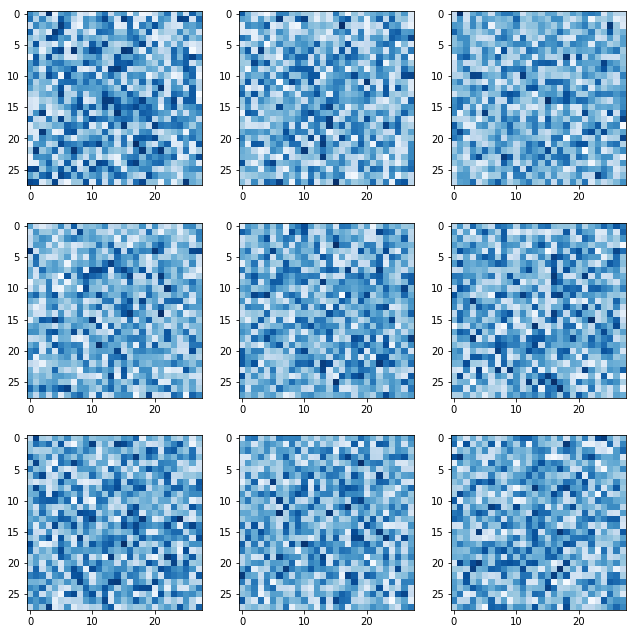

In [26]:
generated_images = modelg.predict(noise)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))        
for i in range(9):
        plt.subplot(3, 3, i+1)
        img = generated_images[i, :]
        img = img.reshape((28, 28))
        plt.tight_layout()
        plt.imshow(img, cmap='Blues')
        plt.axis('on')
   